In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:03, 218.00it/s]
100%|██████████| 700/700 [00:07<00:00, 87.79it/s] 
8280it [00:00, 225756.74it/s]
7920it [00:00, 222164.25it/s]
720it [00:03, 205.29it/s]
100%|██████████| 720/720 [00:08<00:00, 82.85it/s]
8280it [00:00, 225695.12it/s]
720it [00:03, 212.33it/s]
100%|██████████| 720/720 [00:08<00:00, 82.54it/s]
8280it [00:00, 229451.34it/s]
700it [00:00, 701.38it/s]
100%|██████████| 700/700 [00:08<00:00, 98.72it/s]
8280it [00:00, 241719.71it/s]
509it [00:01, 363.05it/s]
100%|██████████| 509/509 [00:02<00:00, 172.91it/s]
3664it [00:00, 231797.31it/s]
700it [00:01, 394.11it/s]
100%|██████████| 700/700 [00:07<00:00, 87.77it/s]
8280it [00:00, 69614.03it/s]
700it [00:01, 694.88it/s]
100%|██████████| 700/700 [00:08<00:00, 87.20it/s]
8280it [00:00, 230288.17it/s]
710it [00:02, 352.23it/s]
100%|██████████| 710/710 [00:08<00:00, 84.99it/s]
8280it [00:00, 215689.65it/s]
710it [00:03, 202.34it/s]
100%|██████████| 710/710 [00:08<00:00, 85.75it/s]
8280it [00:00, 227222.00it/s]
710it [00:00, 7

In [8]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [7]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [8]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [9]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [10]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [ ]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.18232


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.069294
Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.10267


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.064245
Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.099203


100%|██████████| 248/248 [00:20<00:00, 12.31it/s]


Mean val loss: 0.057847


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.09669


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.056145


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.095272


100%|██████████| 248/248 [00:19<00:00, 12.46it/s]


Mean val loss: 0.055424


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.093652


100%|██████████| 248/248 [00:19<00:00, 12.40it/s]


Mean val loss: 0.051705


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.09204


100%|██████████| 248/248 [00:20<00:00, 12.36it/s]


Mean val loss: 0.037316


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.090654


100%|██████████| 248/248 [00:19<00:00, 15.53it/s]


Mean val loss: 0.03346


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.089259


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.032514


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.087976


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.031205


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.087429


100%|██████████| 248/248 [00:19<00:00, 12.43it/s]


Mean val loss: 0.028234


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.086439


100%|██████████| 248/248 [00:19<00:00, 15.28it/s]


Mean val loss: 0.027385


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.086334


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.027206


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.085669


100%|██████████| 248/248 [00:19<00:00, 15.44it/s]


Mean val loss: 0.027094


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.085605


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.030751
EarlyStopping counter: 1 out of 5
Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.087328


100%|██████████| 248/248 [00:19<00:00, 12.42it/s]


Mean val loss: 0.026631


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.08553


100%|██████████| 248/248 [00:19<00:00, 12.42it/s]


Mean val loss: 0.025553


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.084482


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.027673
EarlyStopping counter: 1 out of 5
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.08471


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025745
EarlyStopping counter: 2 out of 5
Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.083654


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.025354


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.084256


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025649
EarlyStopping counter: 1 out of 5
Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.084019


100%|██████████| 248/248 [00:20<00:00, 12.32it/s]


Mean val loss: 0.024298


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.08386
Epoch    22: reducing learning rate of group 0 to 7.5000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024627
EarlyStopping counter: 1 out of 5
Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.083887


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.024048


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.083369


100%|██████████| 248/248 [00:20<00:00, 12.35it/s]


Mean val loss: 0.023902


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.08325


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024311
EarlyStopping counter: 1 out of 5
Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.083362


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023929
EarlyStopping counter: 2 out of 5
Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082489


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.02445
EarlyStopping counter: 3 out of 5
Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.083163


100%|██████████| 248/248 [00:19<00:00, 12.42it/s]


Mean val loss: 0.023873


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082463


100%|██████████| 248/248 [00:20<00:00, 12.34it/s]


Mean val loss: 0.023746


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082405


100%|██████████| 248/248 [00:20<00:00, 12.37it/s]


Mean val loss: 0.023514


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082789


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024458
EarlyStopping counter: 1 out of 5
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082601


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.023416


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082349


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.023318


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 34...


 30%|███       | 78/259 [00:17<00:36,  4.95it/s]

## Dump experiment results

In [ ]:
import pickle
import json

In [ ]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [16]:
model_conf

{'device': 'cpu', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [11]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [28]:
from itertools import chain

In [29]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [30]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

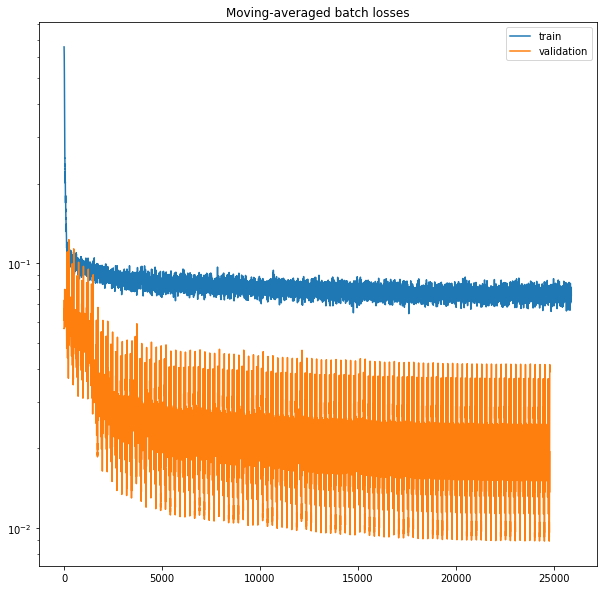

In [31]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [32]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

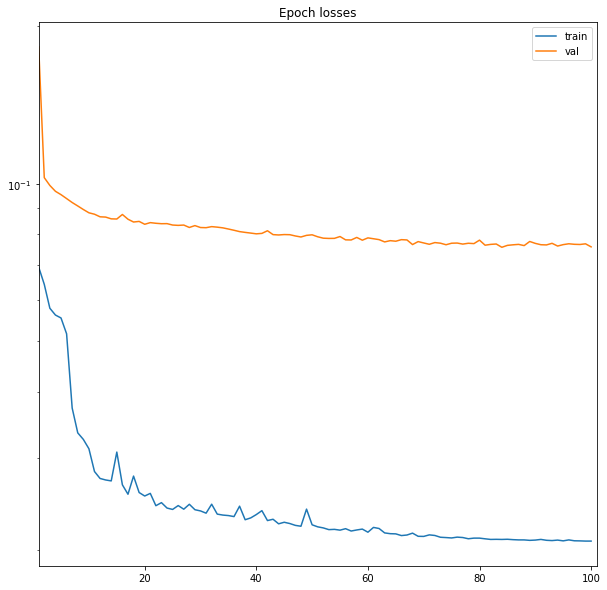

In [33]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [34]:
import os

In [35]:
import torch

In [36]:
from visualization_utils import output_to_binary, plot_sample

In [37]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

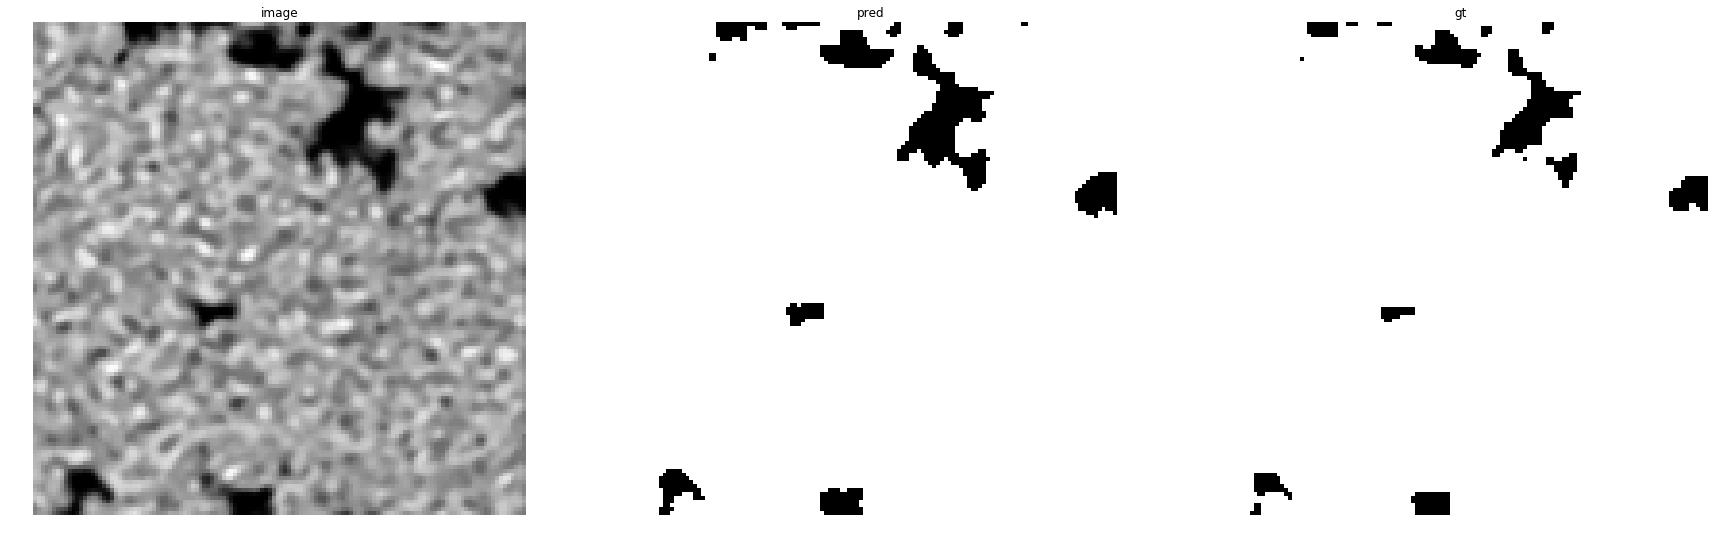

accuracy    : 0.9852294921875
precision   : 1.0
recall      : 0.9846475924633635
f1          : 0.9922644163150492
pr_auc      : 0.9999856786525378
iou         : 0.9846475924633635


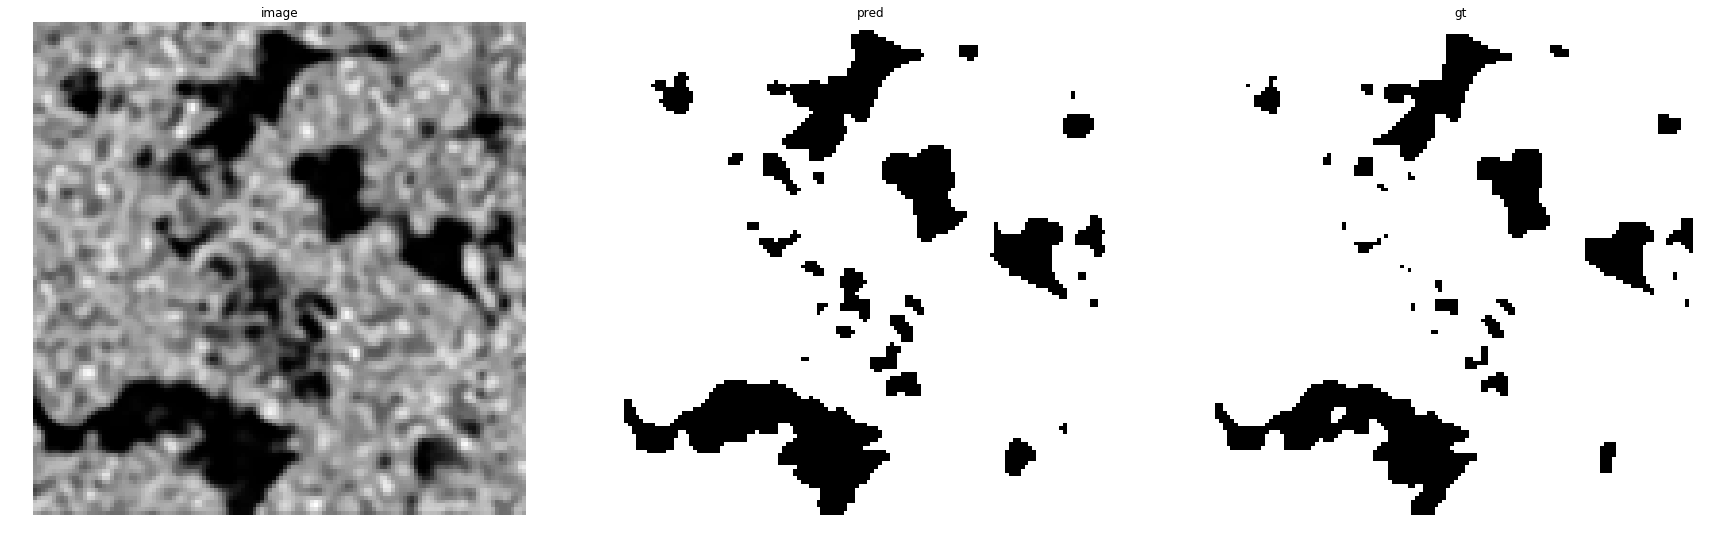

accuracy    : 0.96478271484375
precision   : 1.0
recall      : 0.9597685120624738
f1          : 0.979471306080336
pr_auc      : 0.9999281887296081
iou         : 0.9597685120624738


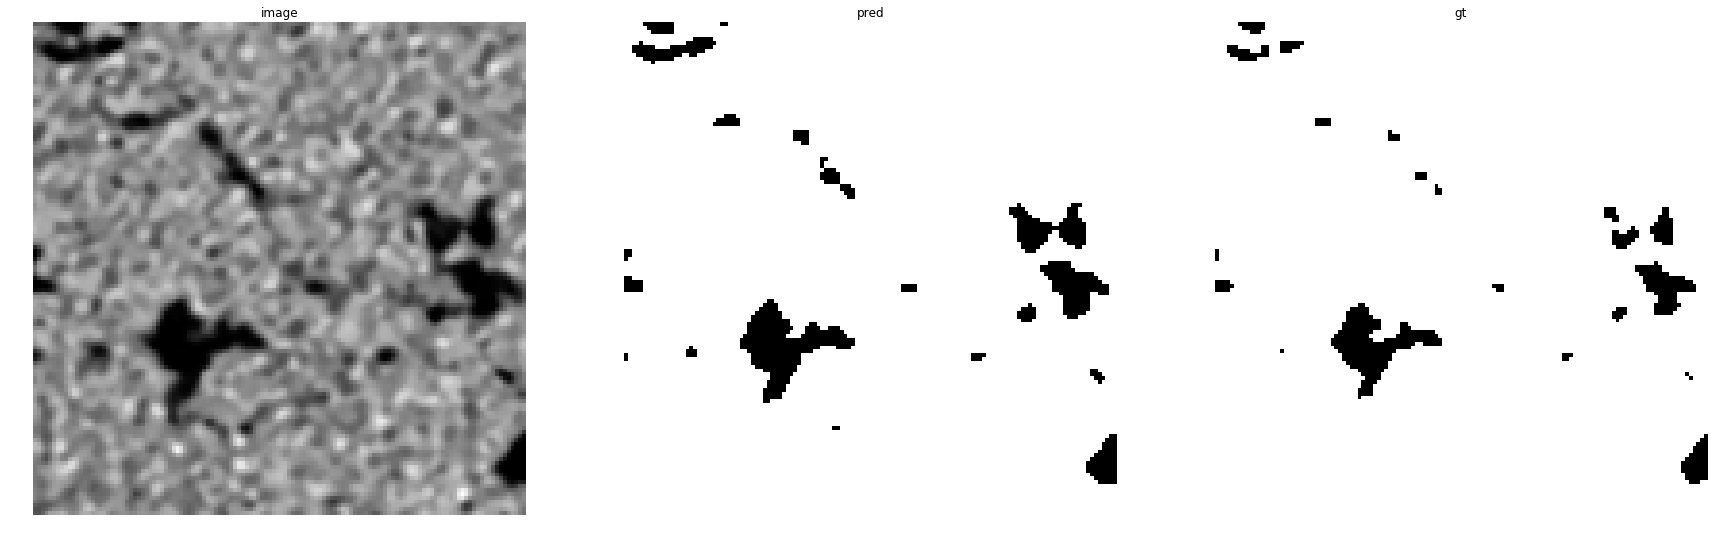

accuracy    : 0.98370361328125
precision   : 1.0
recall      : 0.9830508474576272
f1          : 0.9914529914529915
pr_auc      : 0.9999804579823155
iou         : 0.9830508474576272


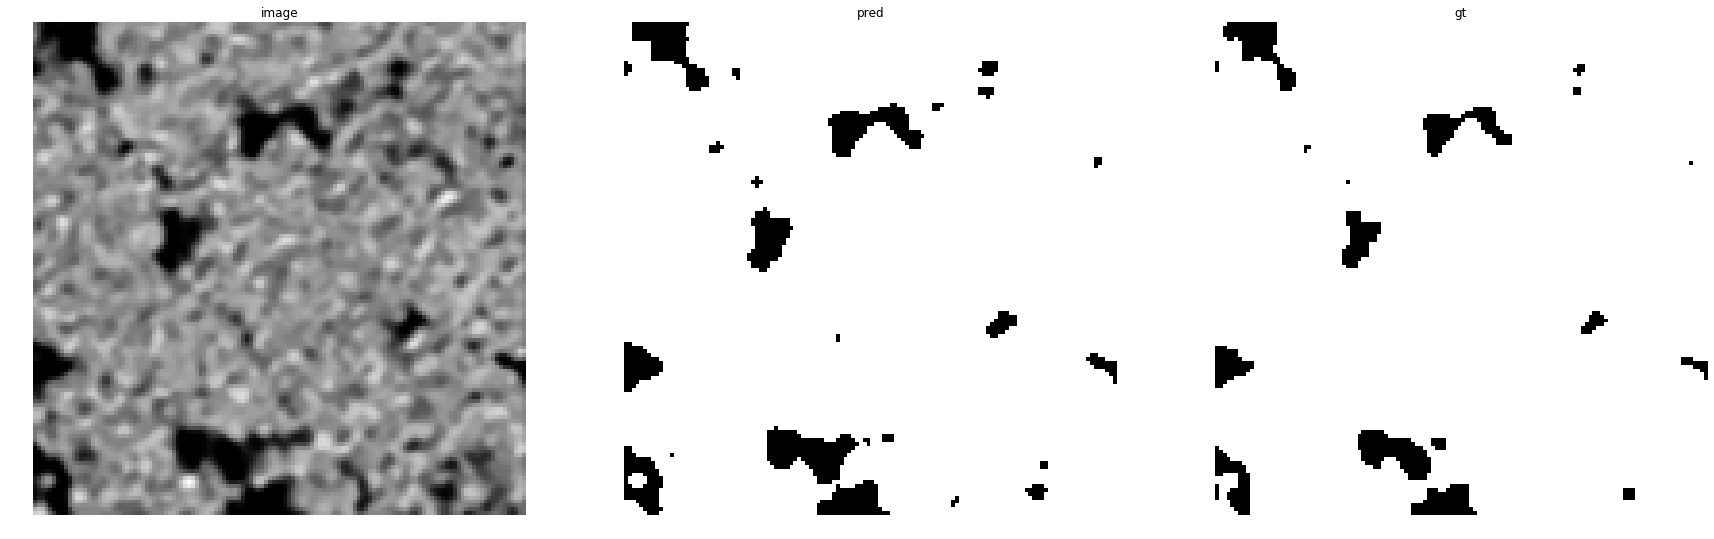

accuracy    : 0.98321533203125
precision   : 1.0
recall      : 0.9823219336590383
f1          : 0.9910821415831631
pr_auc      : 0.9999867726277308
iou         : 0.9823219336590383


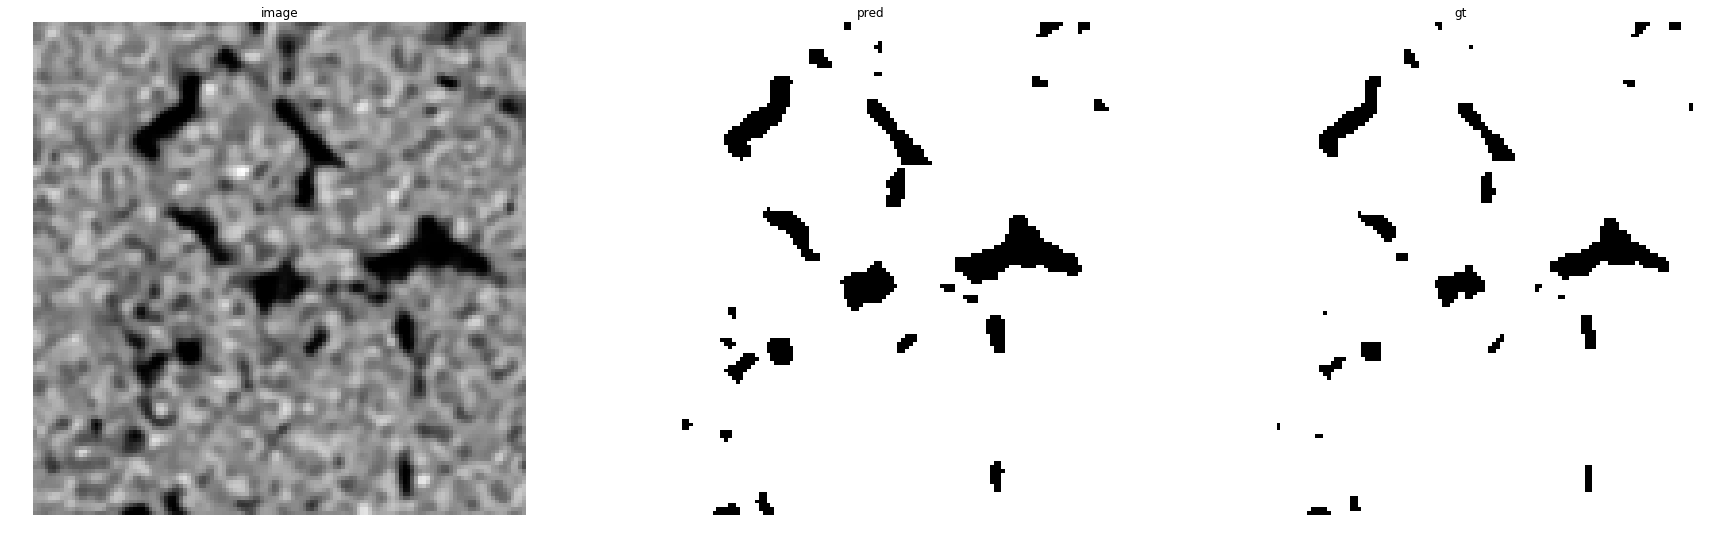

accuracy    : 0.97955322265625
precision   : 1.0
recall      : 0.9786420146636914
f1          : 0.9892057354599645
pr_auc      : 0.9999801867555075
iou         : 0.9786420146636914


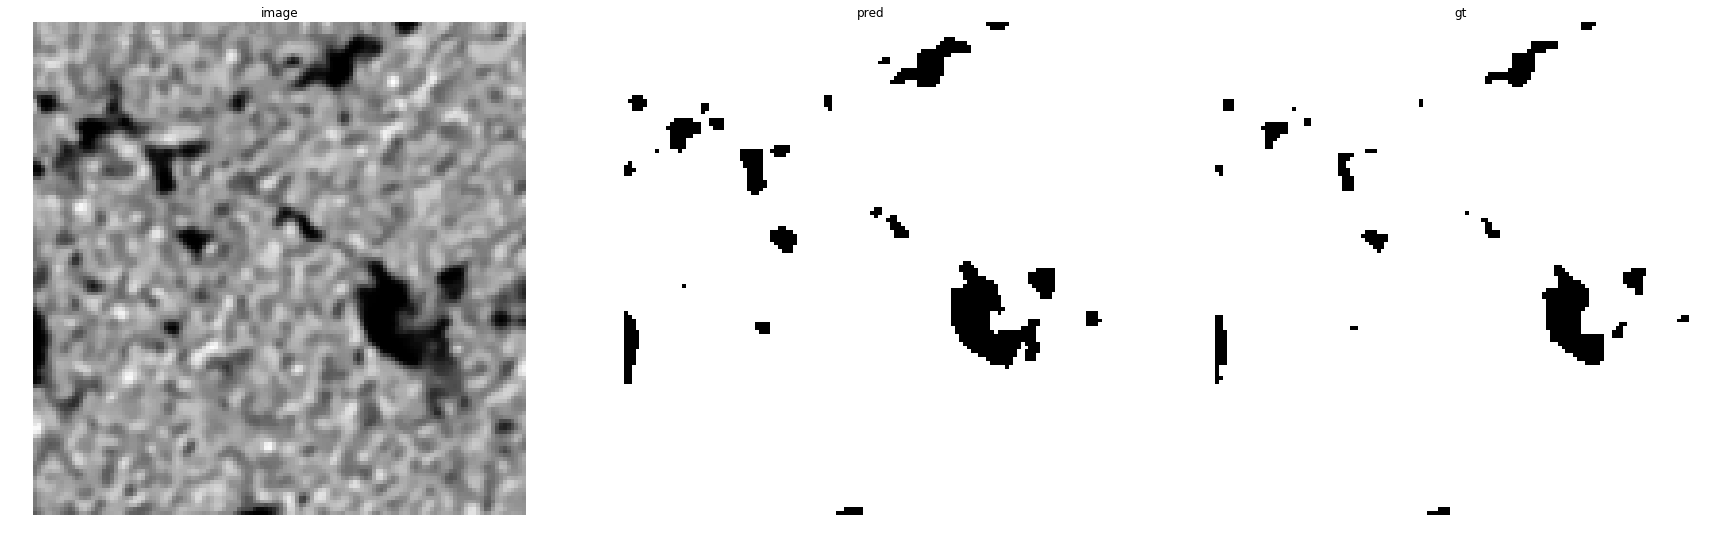

accuracy    : 0.9835205078125
precision   : 1.0
recall      : 0.9829674489023467
f1          : 0.9914105745371253
pr_auc      : 0.9999858919639882
iou         : 0.9829674489023467


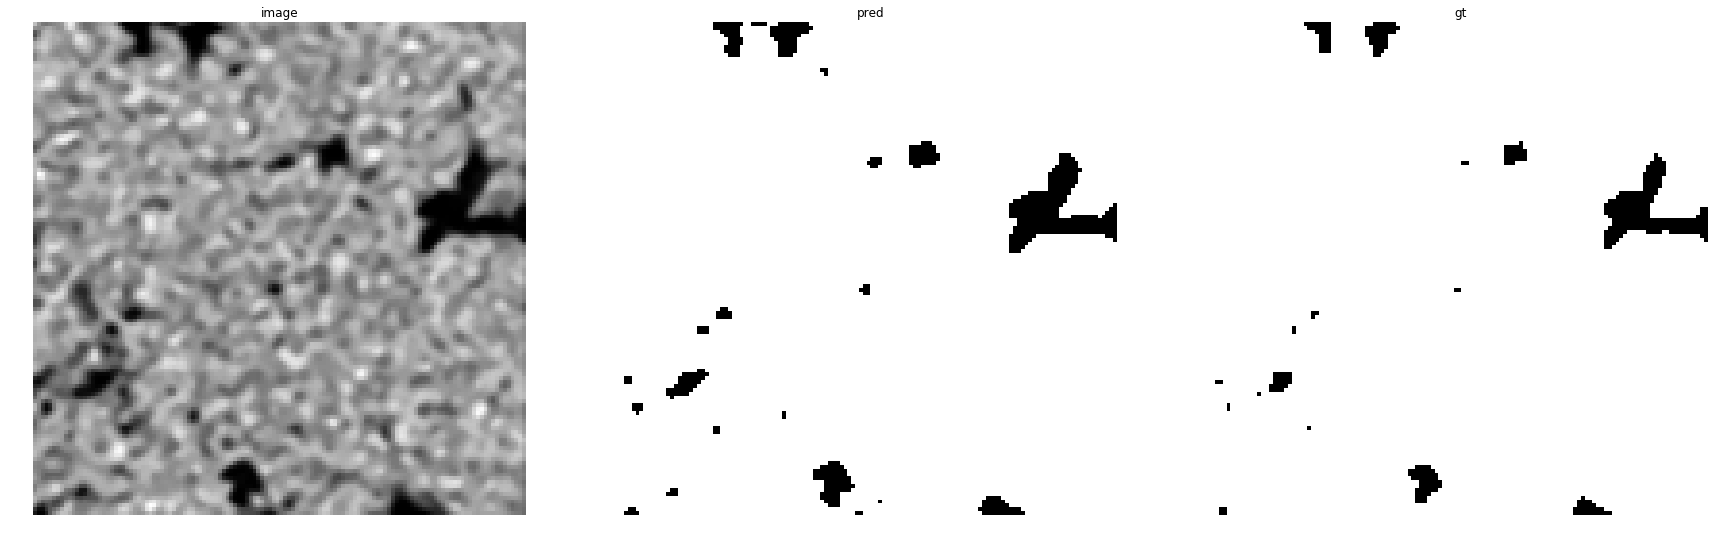

accuracy    : 0.9874267578125
precision   : 1.0
recall      : 0.987052982213563
f1          : 0.9934843117408907
pr_auc      : 0.9999955666472267
iou         : 0.987052982213563


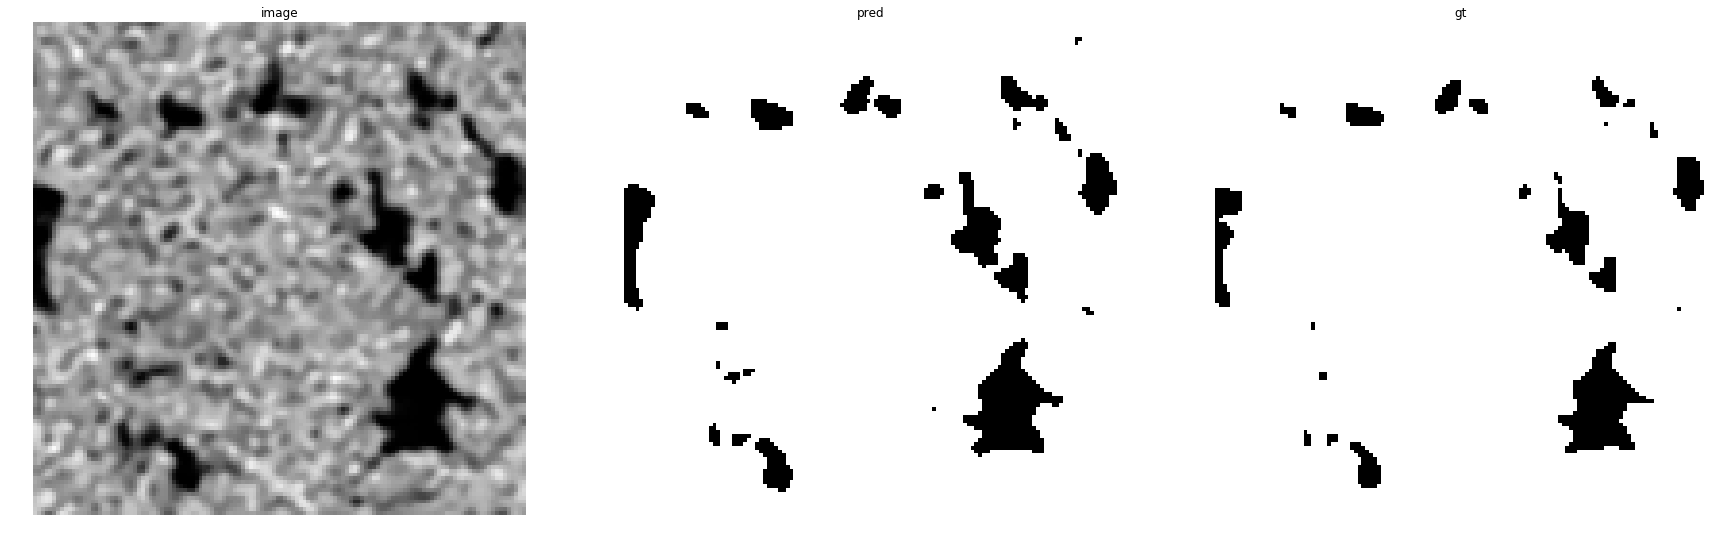

accuracy    : 0.9801025390625
precision   : 1.0
recall      : 0.9788928455810942
f1          : 0.989333856825023
pr_auc      : 0.9999841528239855
iou         : 0.9788928455810942


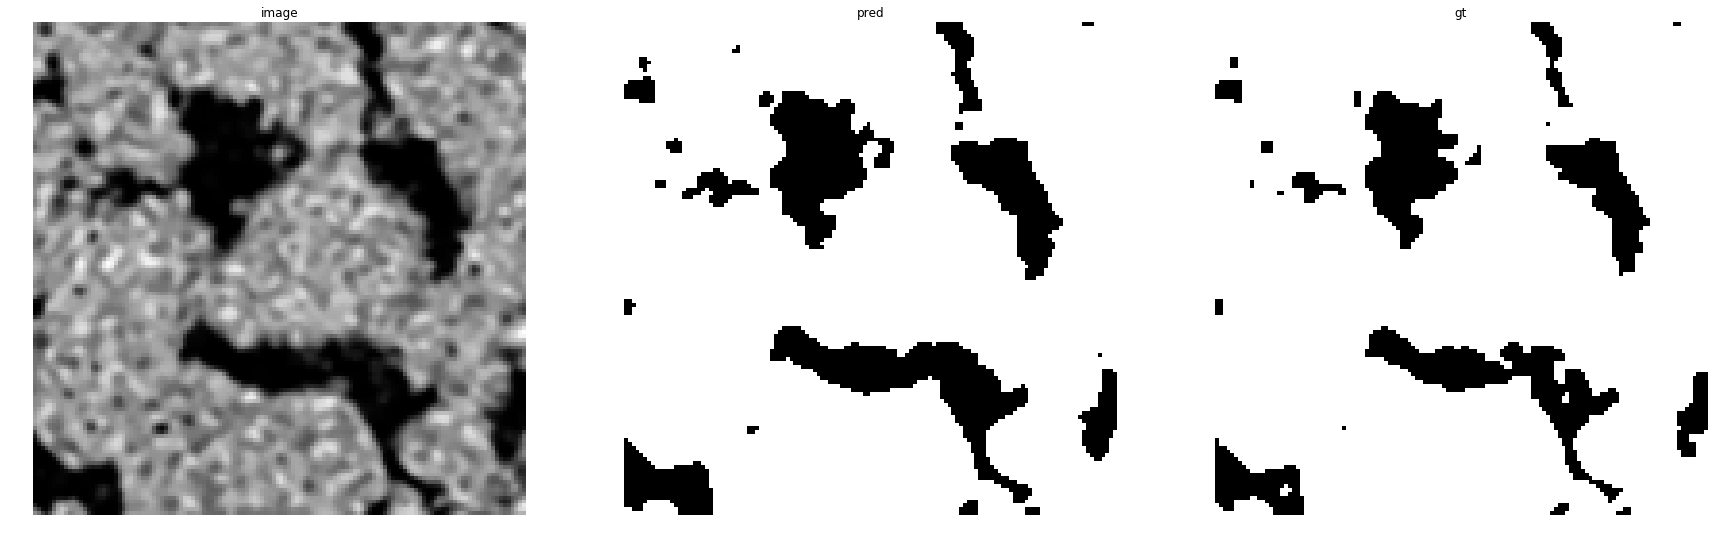

accuracy    : 0.96917724609375
precision   : 1.0
recall      : 0.9641869370966598
f1          : 0.981766978373109
pr_auc      : 0.9998809097654897
iou         : 0.9641869370966598


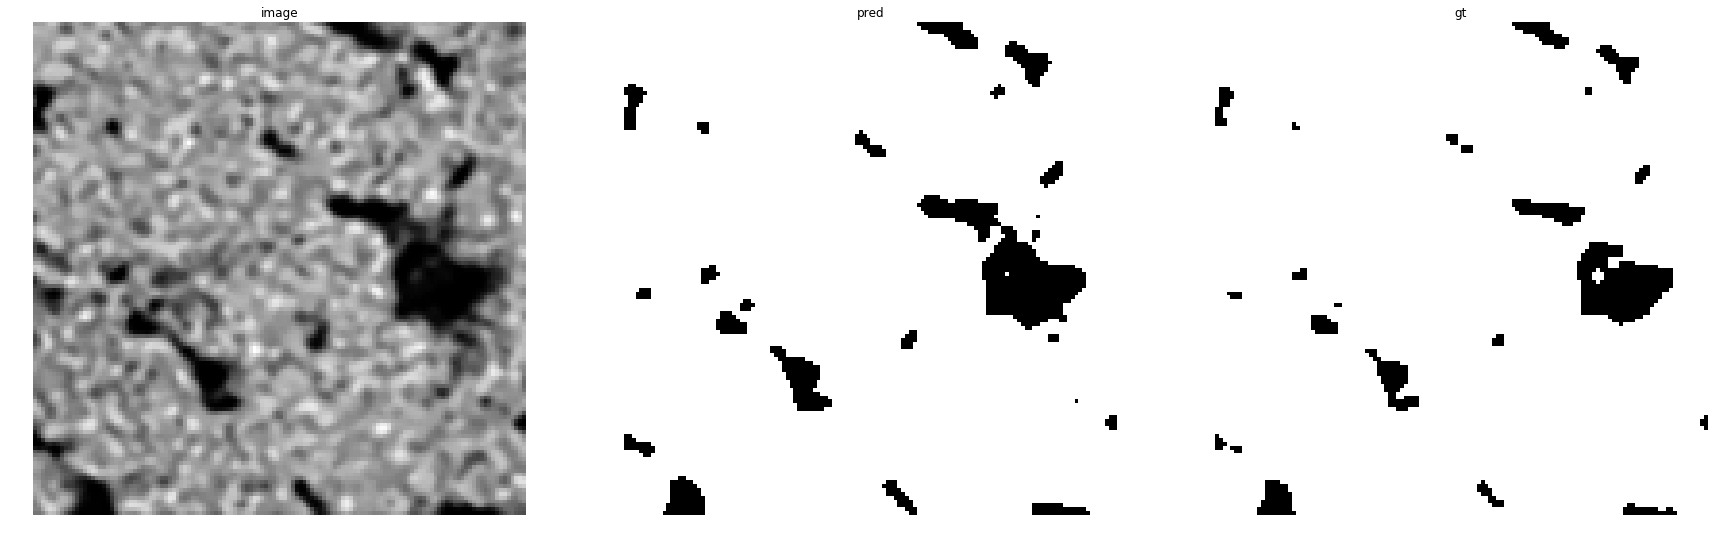

accuracy    : 0.97882080078125
precision   : 1.0
recall      : 0.9776518322921363
f1          : 0.9886996450320773
pr_auc      : 0.9999798041501854
iou         : 0.9776518322921363


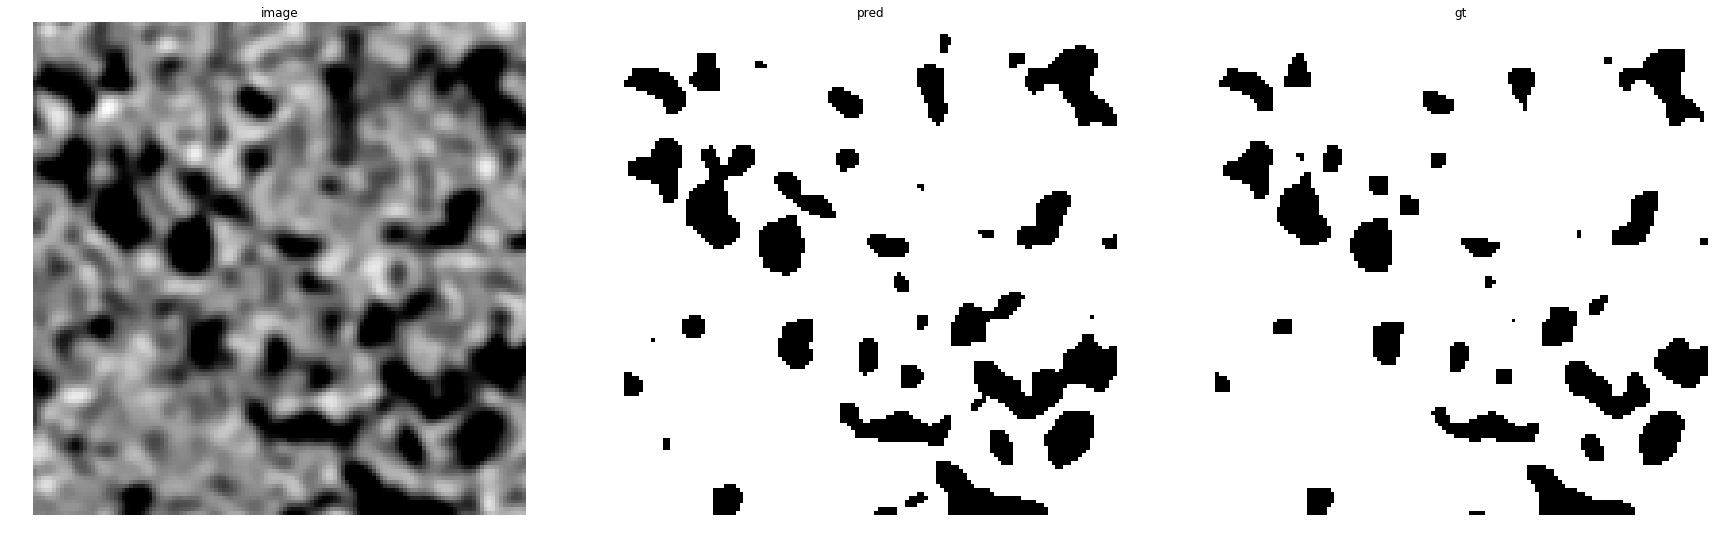

accuracy    : 0.9598388671875
precision   : 1.0
recall      : 0.9538213207944417
f1          : 0.9763649425287356
pr_auc      : 0.9997799976149695
iou         : 0.9538213207944417


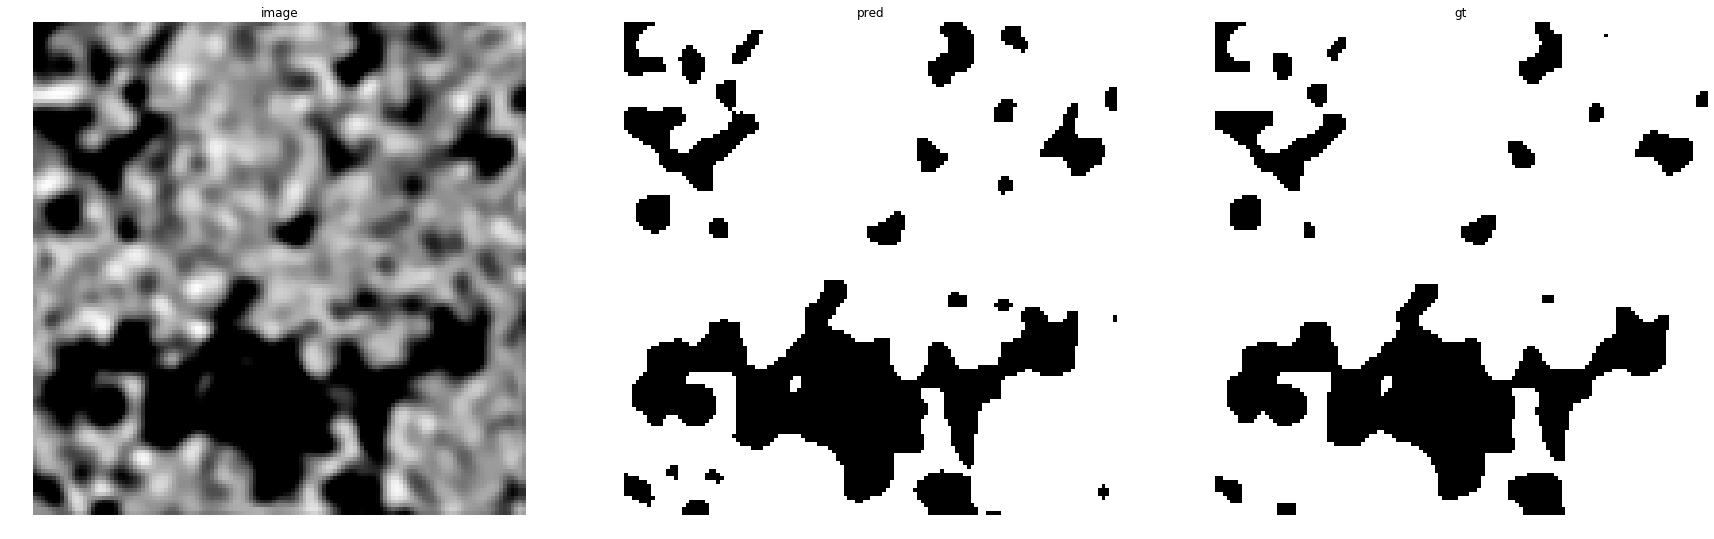

accuracy    : 0.969970703125
precision   : 0.999839871897518
recall      : 0.9622437971952535
f1          : 0.9806816397047274
pr_auc      : 0.9997139981858758
iou         : 0.962095531587057


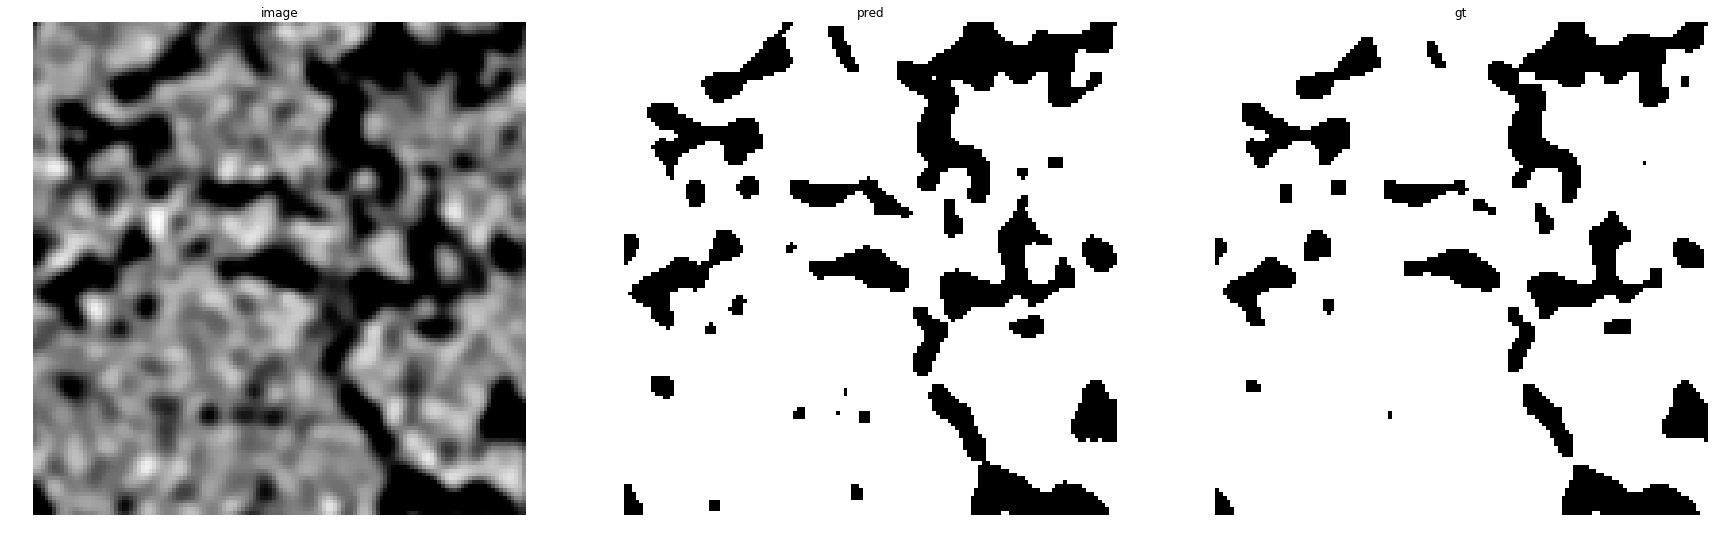

accuracy    : 0.96307373046875
precision   : 0.9996139592340951
recall      : 0.9557097512364361
f1          : 0.9771689497716894
pr_auc      : 0.9997043297415973
iou         : 0.9553571428571429


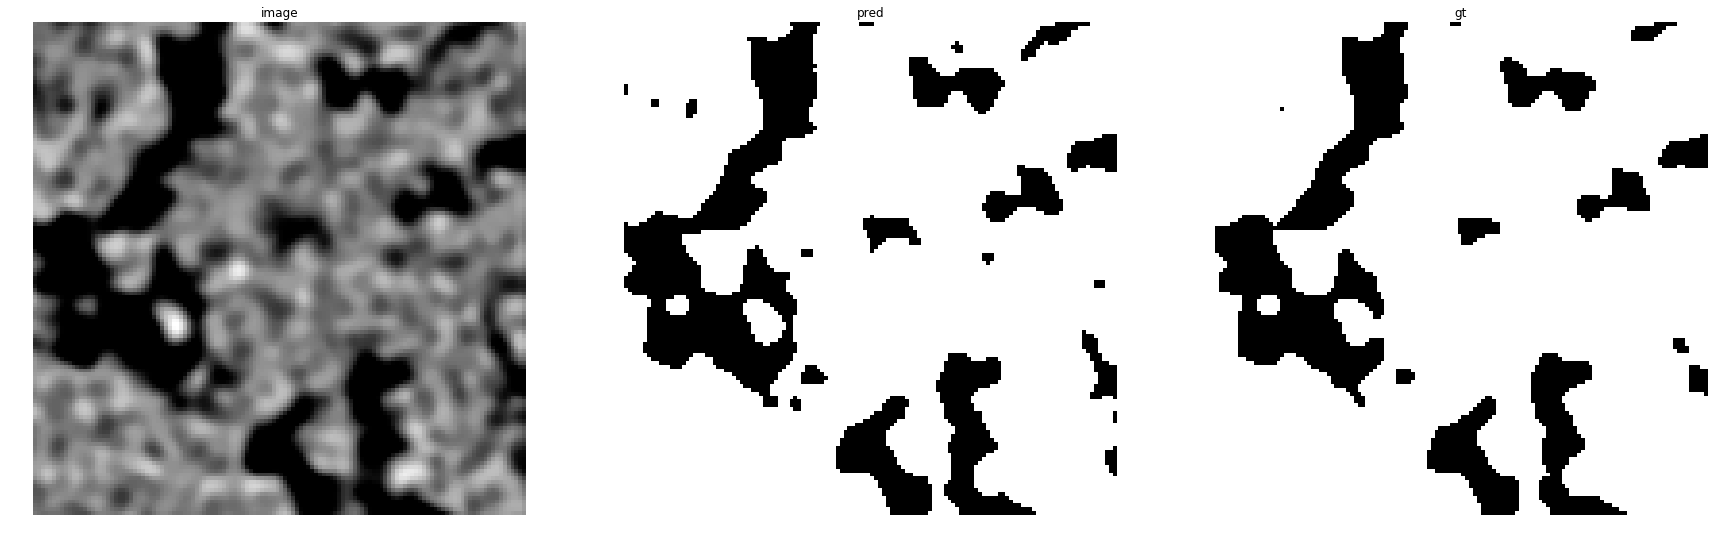

accuracy    : 0.9737548828125
precision   : 0.9999226604795051
recall      : 0.9678844138344064
f1          : 0.9836427267194157
pr_auc      : 0.9998732133426549
iou         : 0.9678119619732016


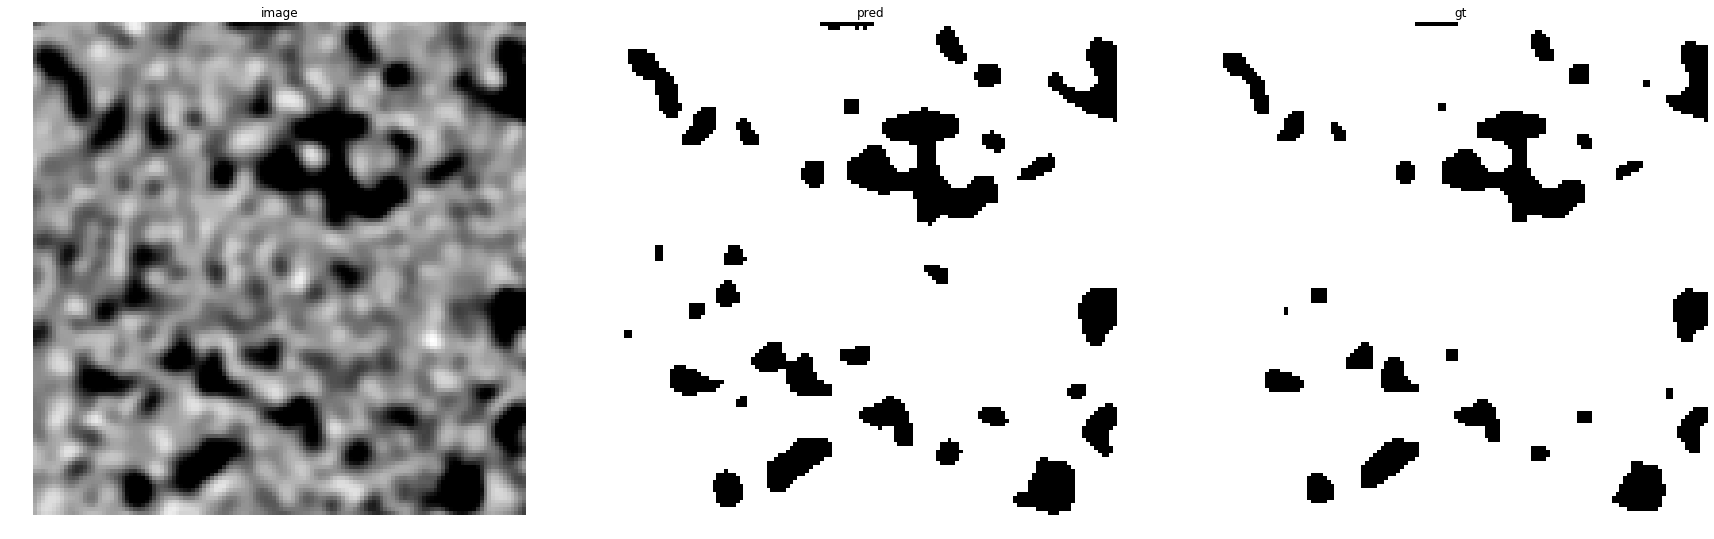

accuracy    : 0.9619140625
precision   : 1.0
recall      : 0.9577836411609498
f1          : 0.9784366576819408
pr_auc      : 0.9998751740894347
iou         : 0.9577836411609498


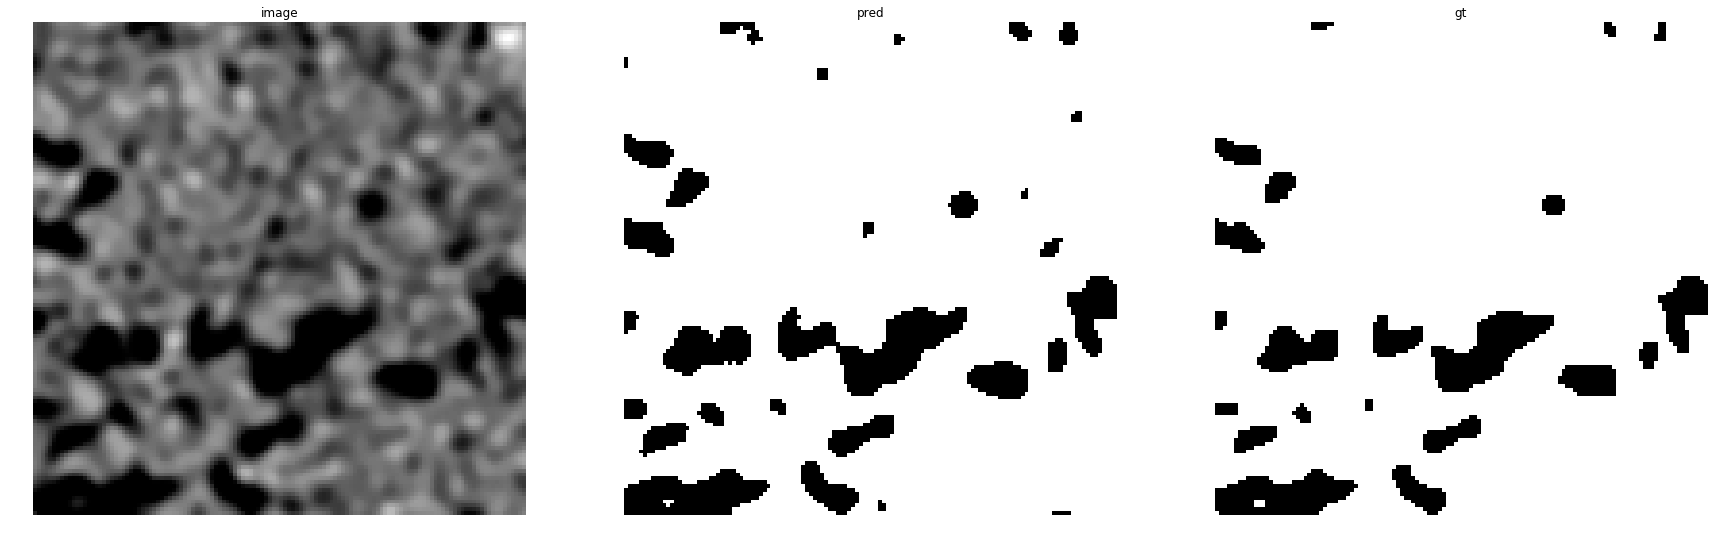

accuracy    : 0.9720458984375
precision   : 1.0
recall      : 0.9688308152987614
f1          : 0.9841686830279985
pr_auc      : 0.9999256183191945
iou         : 0.9688308152987614


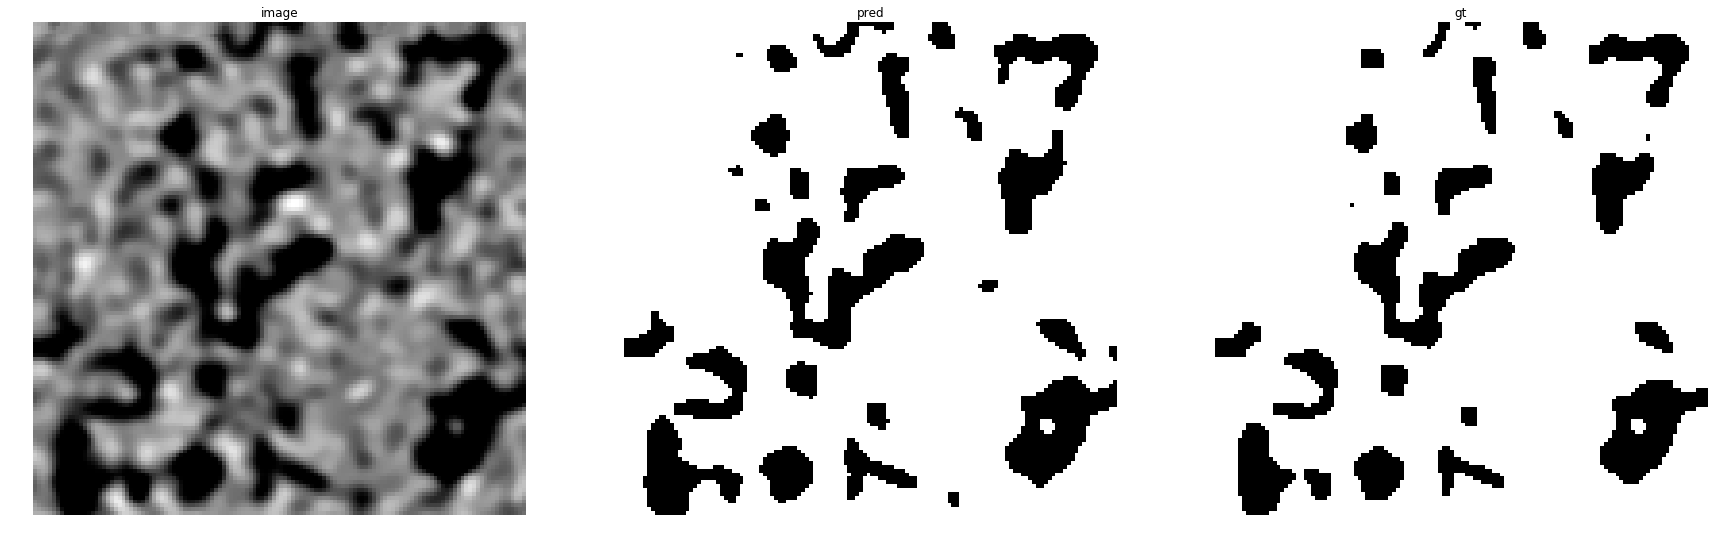

accuracy    : 0.96661376953125
precision   : 1.0
recall      : 0.9604397193896
f1          : 0.9798207105175786
pr_auc      : 0.9997771983072004
iou         : 0.9604397193896


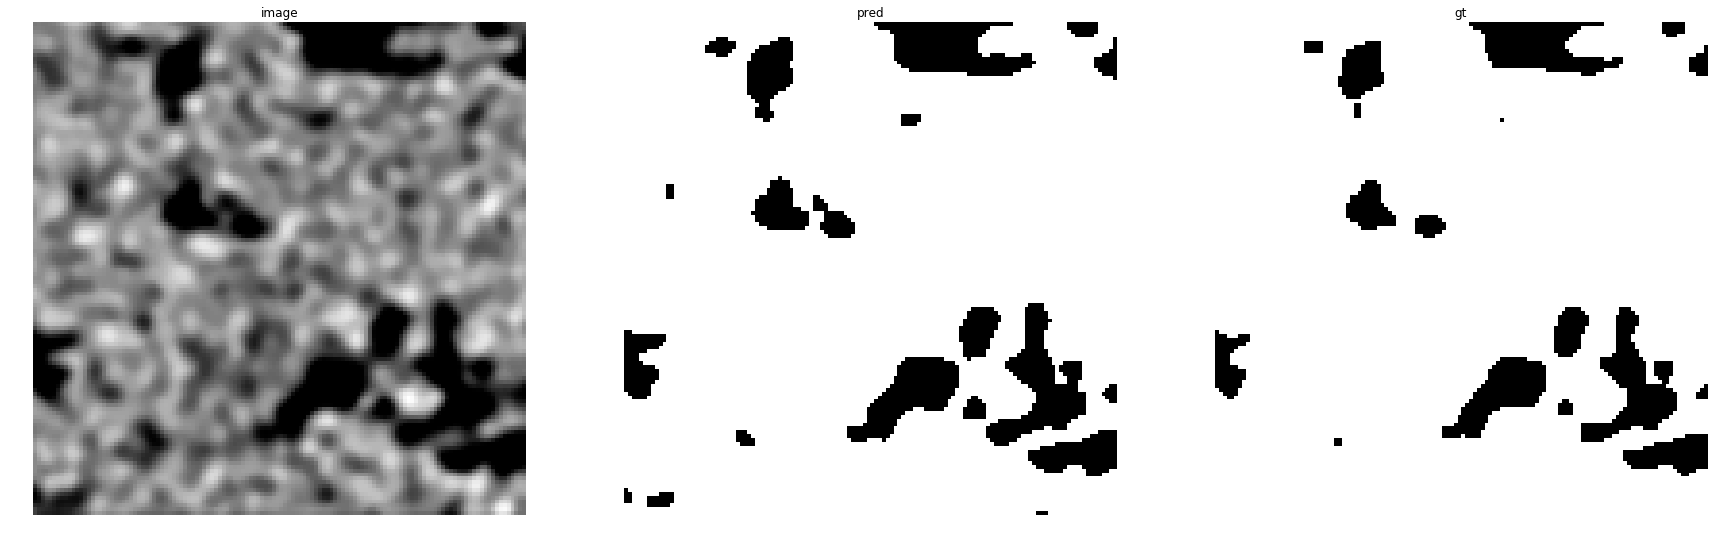

accuracy    : 0.9757080078125
precision   : 0.9998601398601399
recall      : 0.9730502245814618
f1          : 0.9862730220045527
pr_auc      : 0.9999411343156872
iou         : 0.9729178007621121


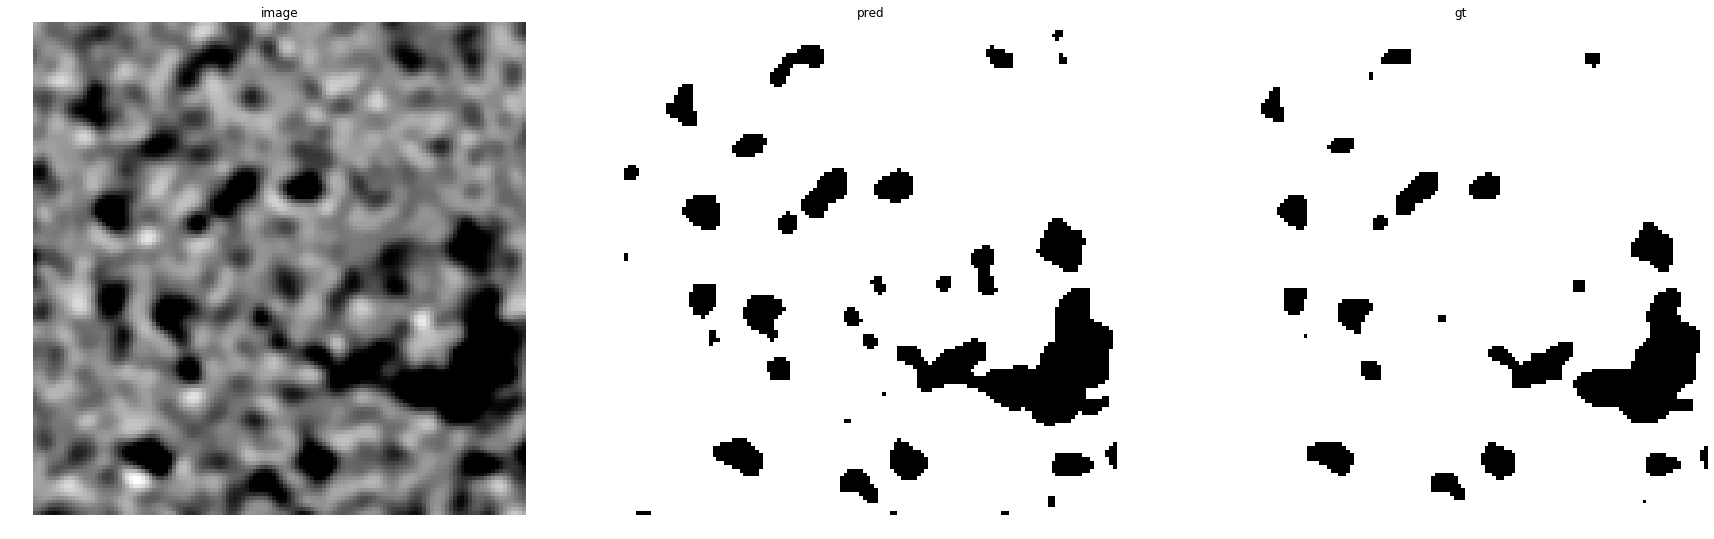

accuracy    : 0.96673583984375
precision   : 0.9999304734756309
recall      : 0.9635535307517085
f1          : 0.9814050291719266
pr_auc      : 0.9998968814708549
iou         : 0.9634889797012126


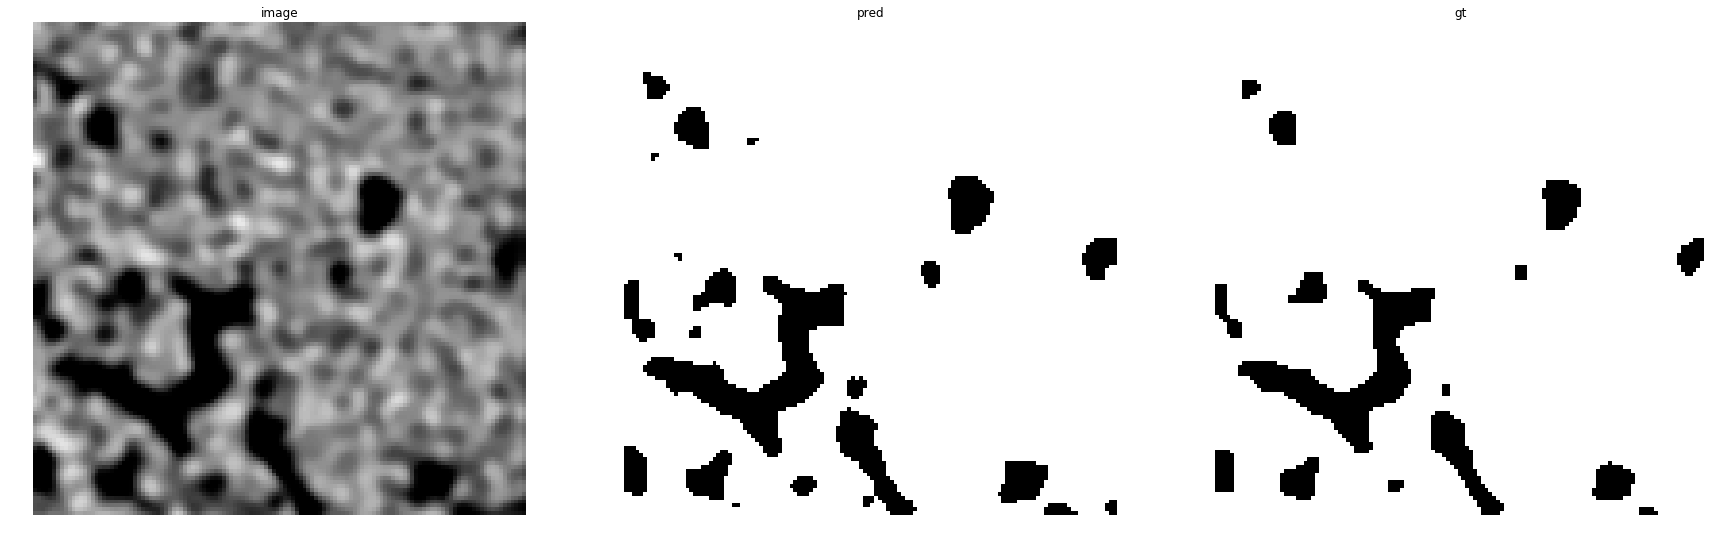

accuracy    : 0.97515869140625
precision   : 0.9998626750892612
recall      : 0.9729404690318701
f1          : 0.9862178727438962
pr_auc      : 0.999936068543026
iou         : 0.9728104749816286


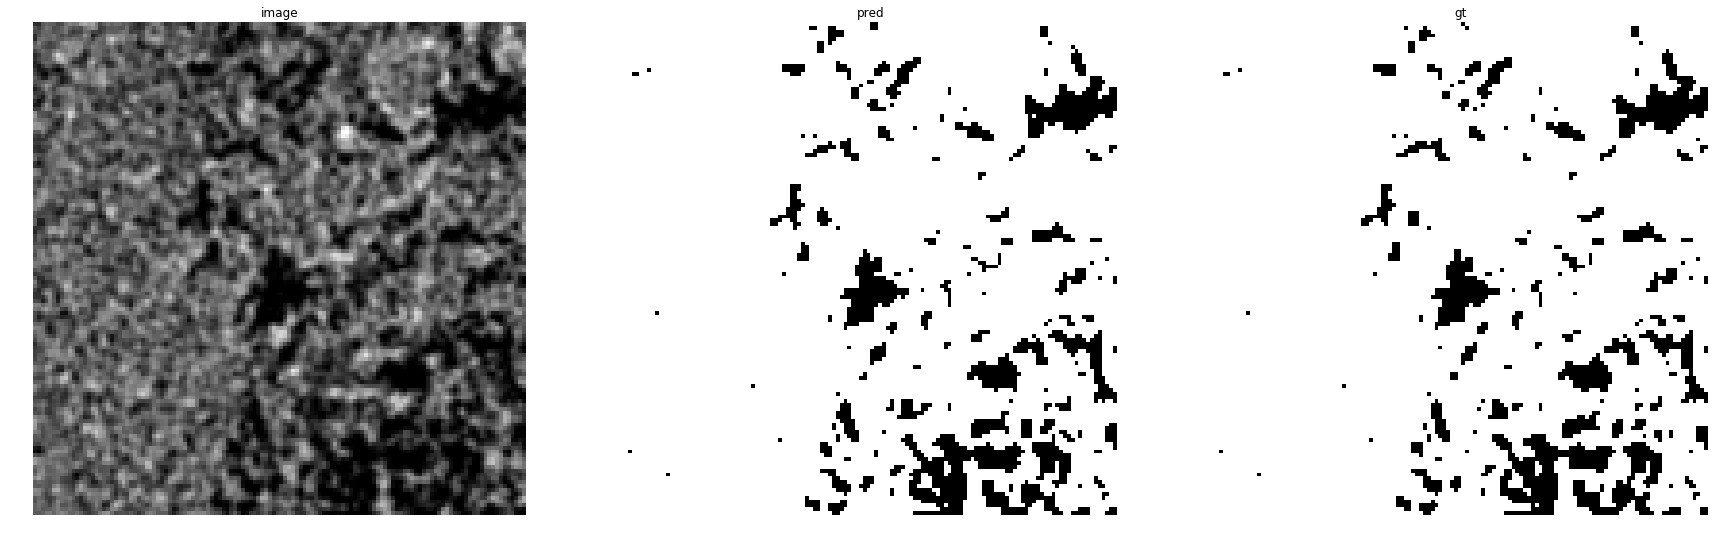

accuracy    : 0.99053955078125
precision   : 0.9949927978599356
recall      : 0.9943789415958322
f1          : 0.9946857750197141
pr_auc      : 0.9999127706038768
iou         : 0.9894277334424664


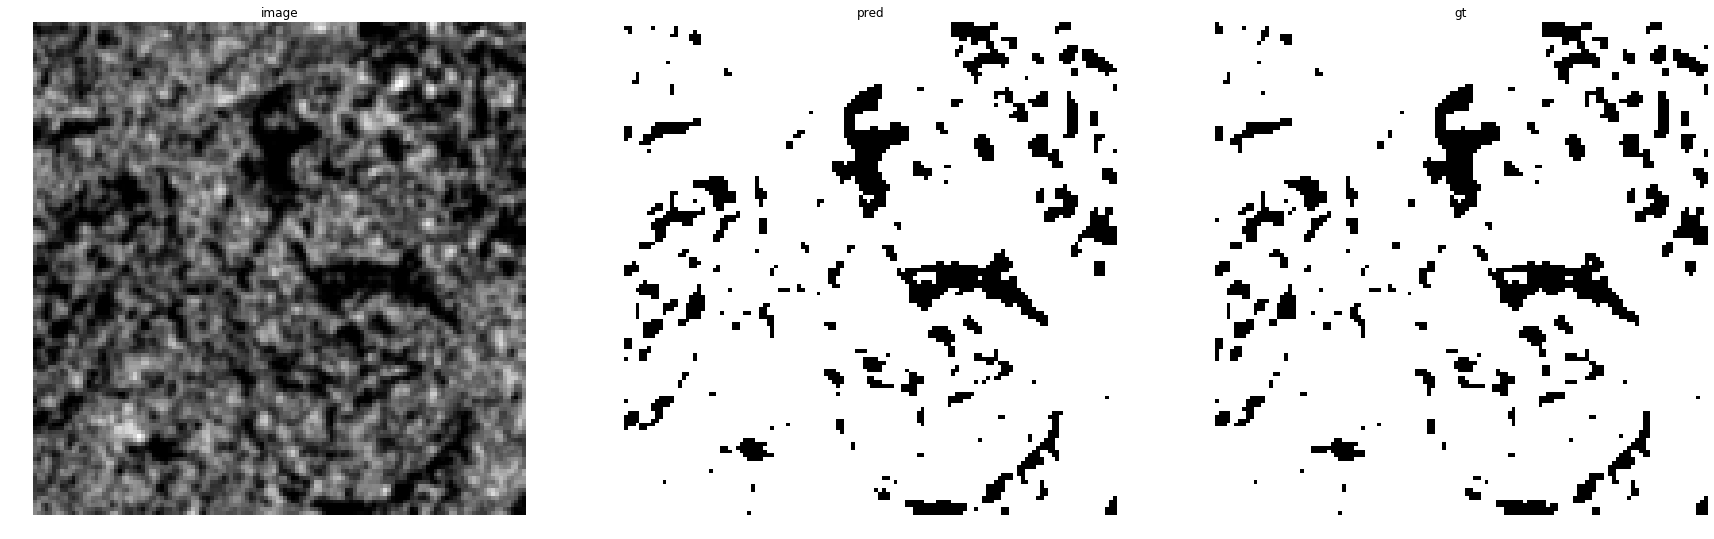

accuracy    : 0.988037109375
precision   : 0.9922782608695652
recall      : 0.9940762422468464
f1          : 0.9931764378220304
pr_auc      : 0.9998752712565605
iou         : 0.9864453665283541


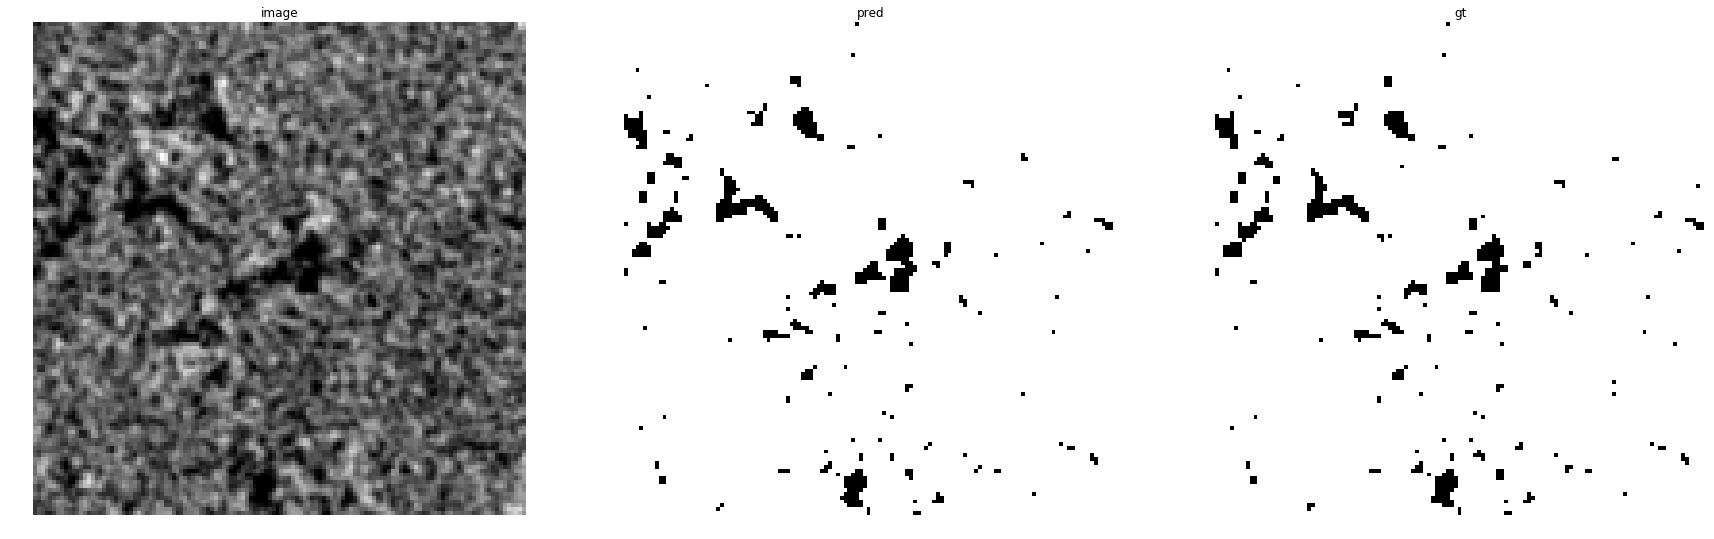

accuracy    : 0.9962158203125
precision   : 0.9978470111448835
recall      : 0.9982262764474851
f1          : 0.9980366077648996
pr_auc      : 0.9999881289512095
iou         : 0.9960809102402023


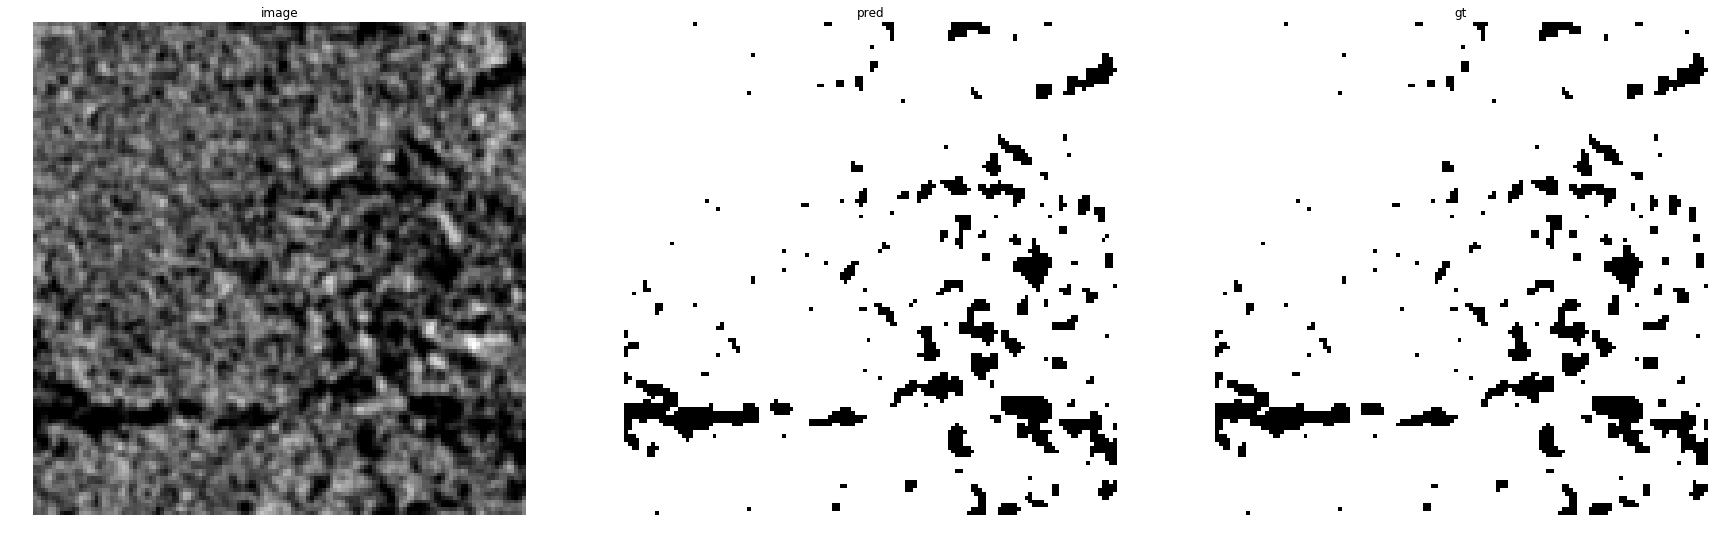

accuracy    : 0.9923095703125
precision   : 0.995635533472101
recall      : 0.995903015649137
f1          : 0.995769256597945
pr_auc      : 0.9999469136184707
iou         : 0.991574160759663


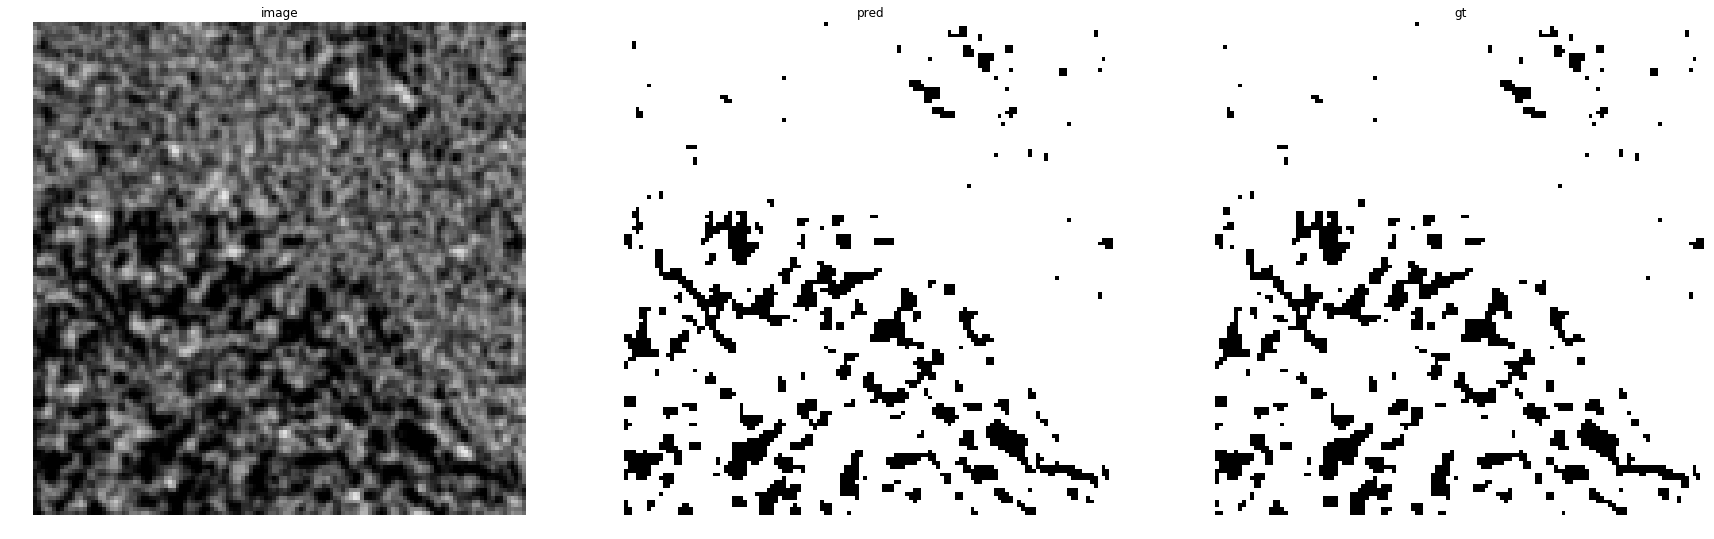

accuracy    : 0.98828125
precision   : 0.9941524490919097
recall      : 0.9926500892979805
f1          : 0.9934007011755001
pr_auc      : 0.9998807204484067
iou         : 0.9868879328006556


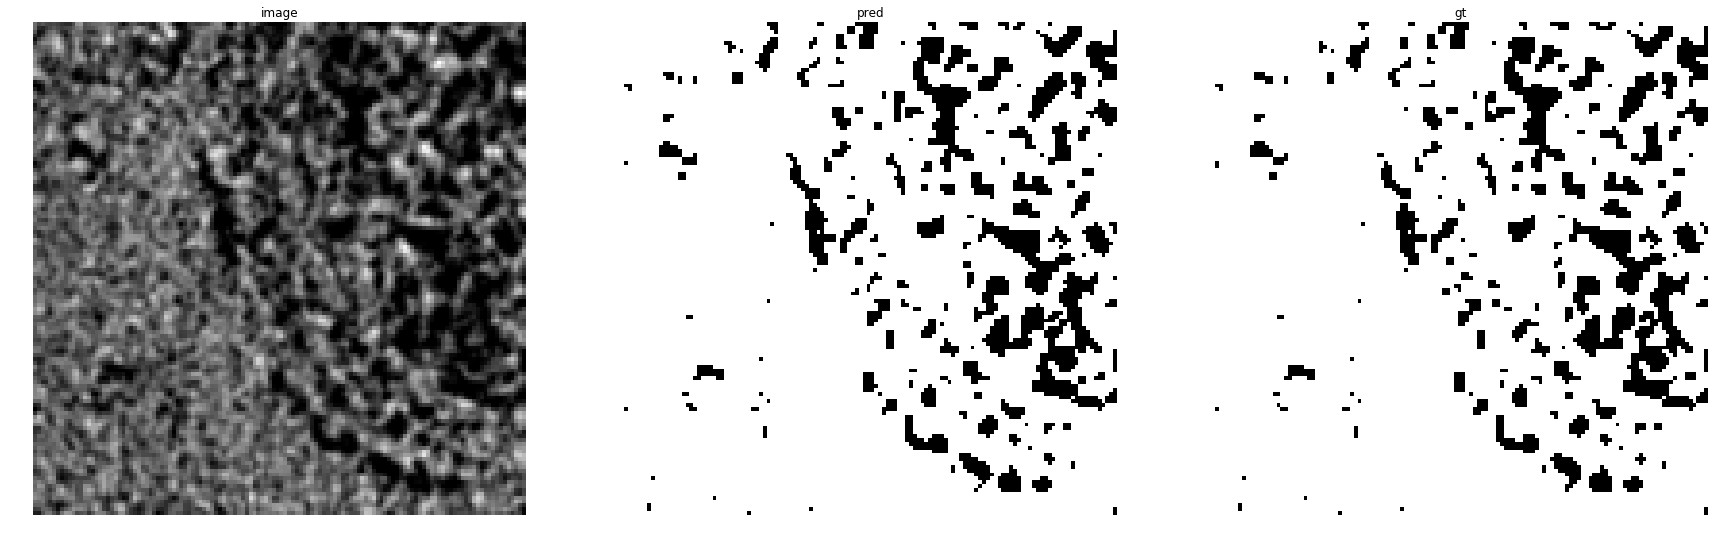

accuracy    : 0.9896240234375
precision   : 0.9934821112291888
recall      : 0.9944684774129494
f1          : 0.9939750496172385
pr_auc      : 0.9998652457611419
iou         : 0.9880222644965828


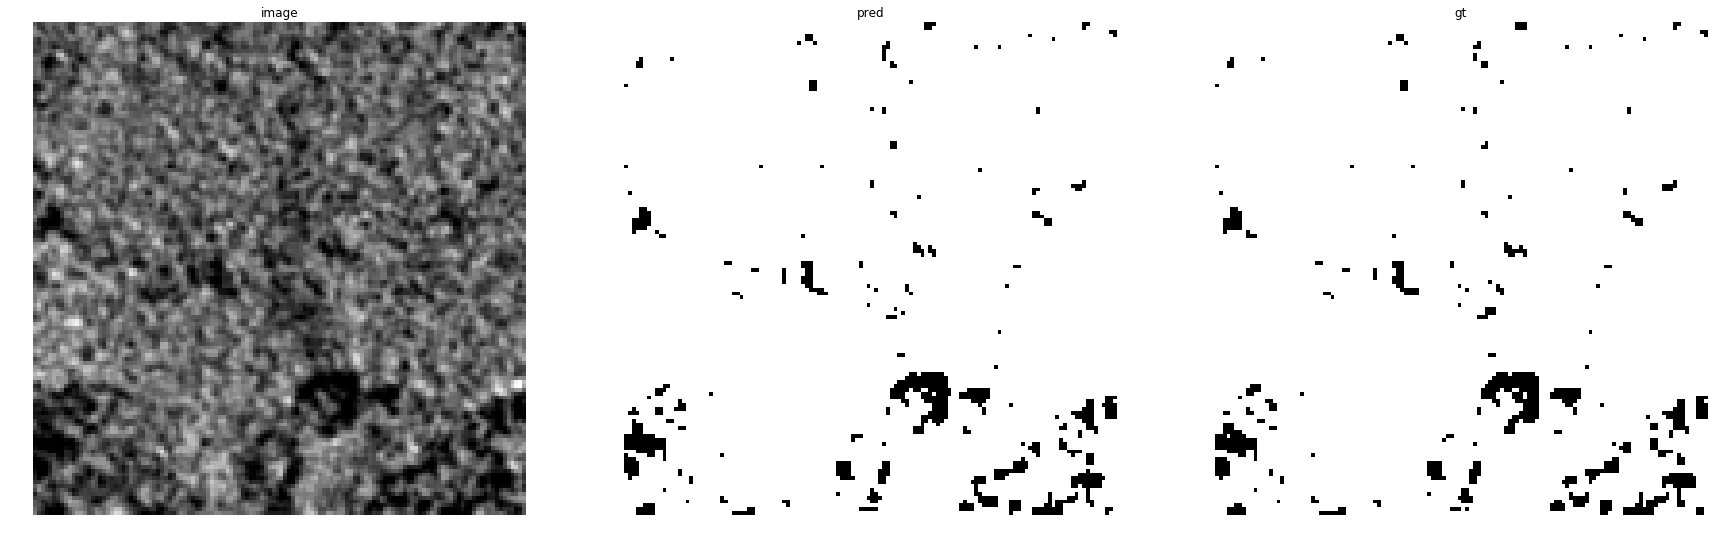

accuracy    : 0.99530029296875
precision   : 0.9969303574854512
recall      : 0.9981431681393265
f1          : 0.9975363941769317
pr_auc      : 0.9999829012732872
iou         : 0.9950848972296693


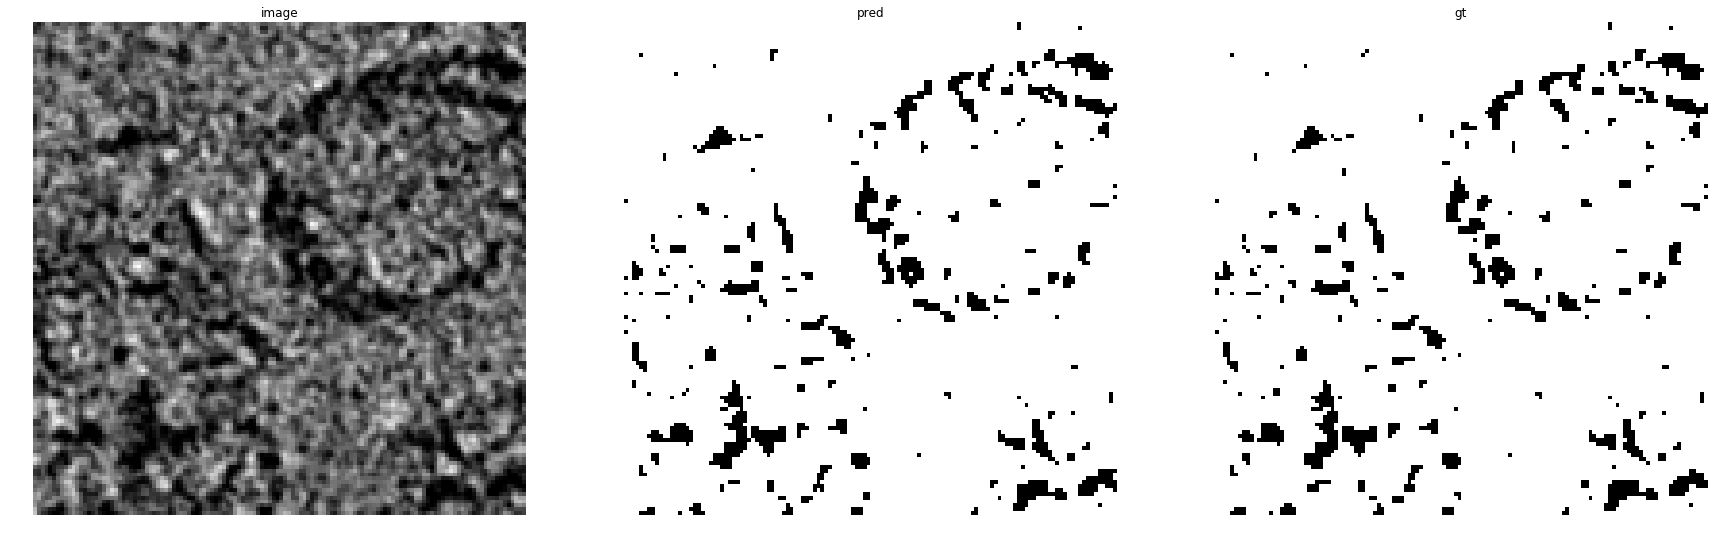

accuracy    : 0.99310302734375
precision   : 0.9962874569079819
recall      : 0.9962214119986742
f1          : 0.9962544333587458
pr_auc      : 0.9999378991964067
iou         : 0.9925368205534641


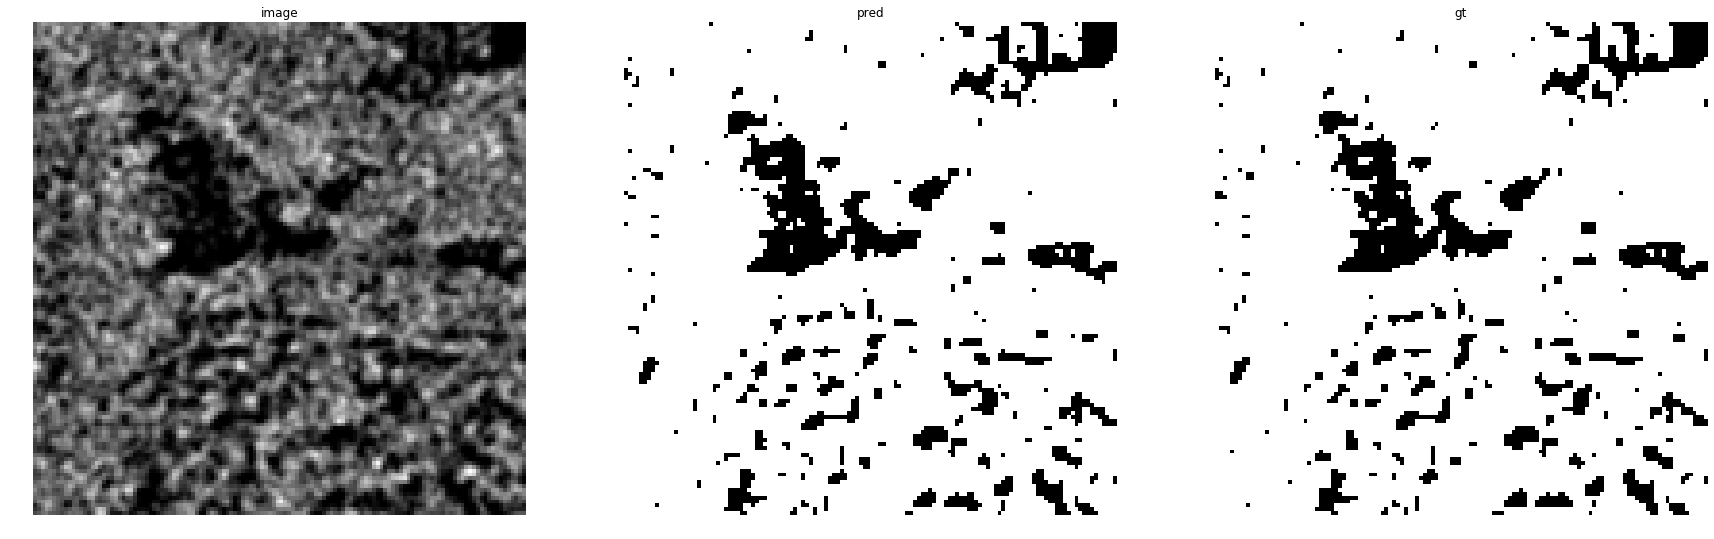

accuracy    : 0.9901123046875
precision   : 0.994294569275199
recall      : 0.994294569275199
f1          : 0.994294569275199
pr_auc      : 0.9998948036723979
iou         : 0.9886538730914693


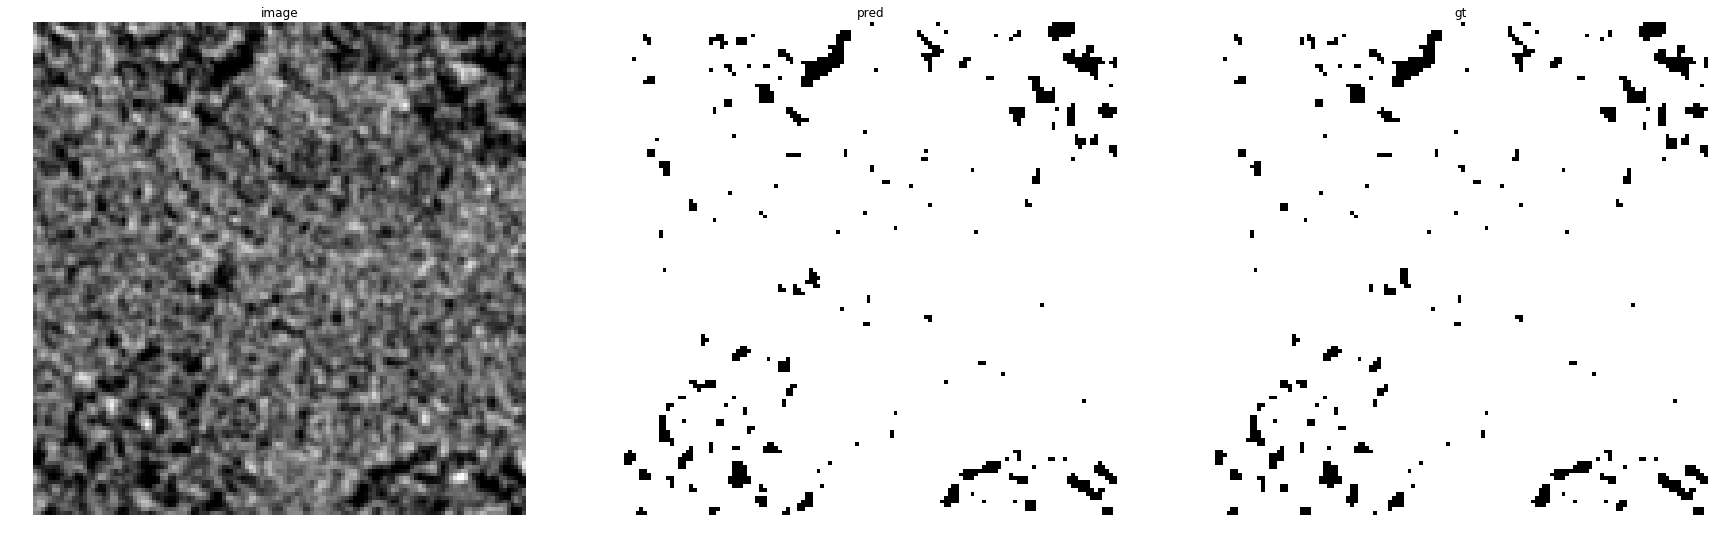

accuracy    : 0.9951171875
precision   : 0.9978195344064644
recall      : 0.9970522268503684
f1          : 0.9974357330598115
pr_auc      : 0.9999784939259562
iou         : 0.9948845834132617


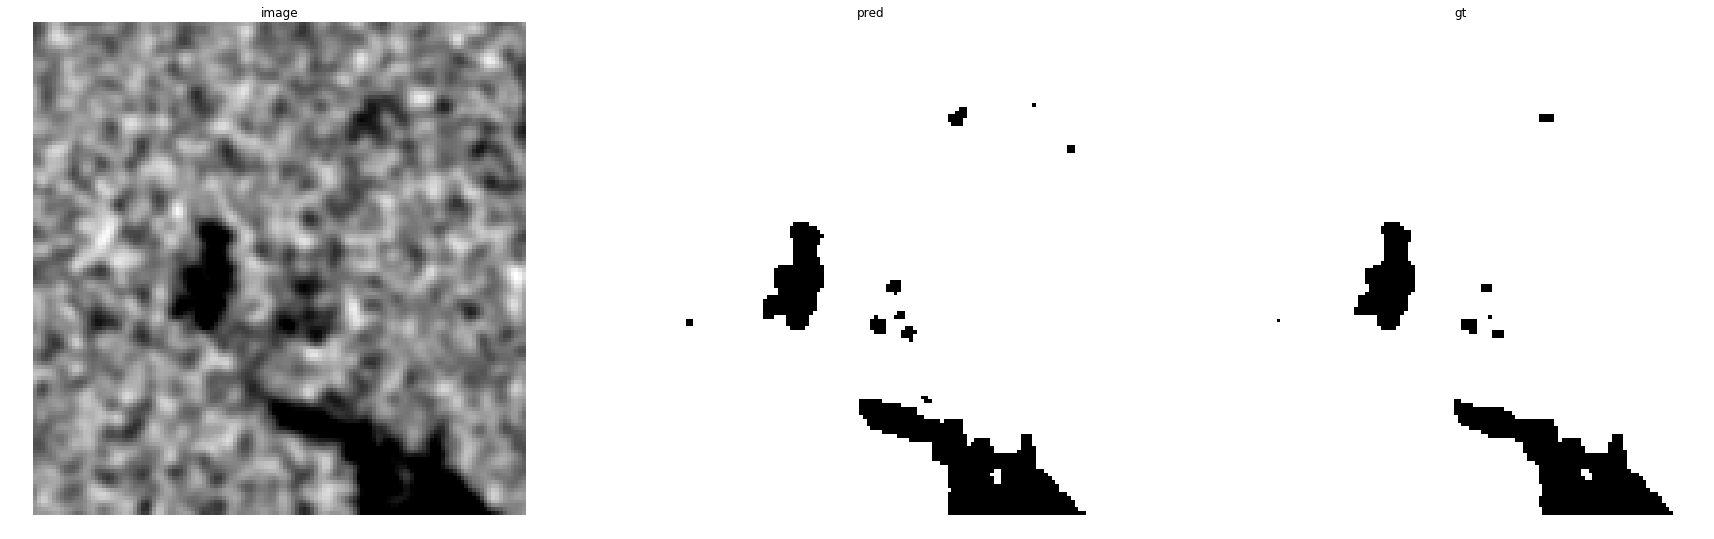

accuracy    : 0.993896484375
precision   : 0.9990217178634319
recall      : 0.994481594494579
f1          : 0.9967464862051015
pr_auc      : 0.9999858506744234
iou         : 0.9935140744584252


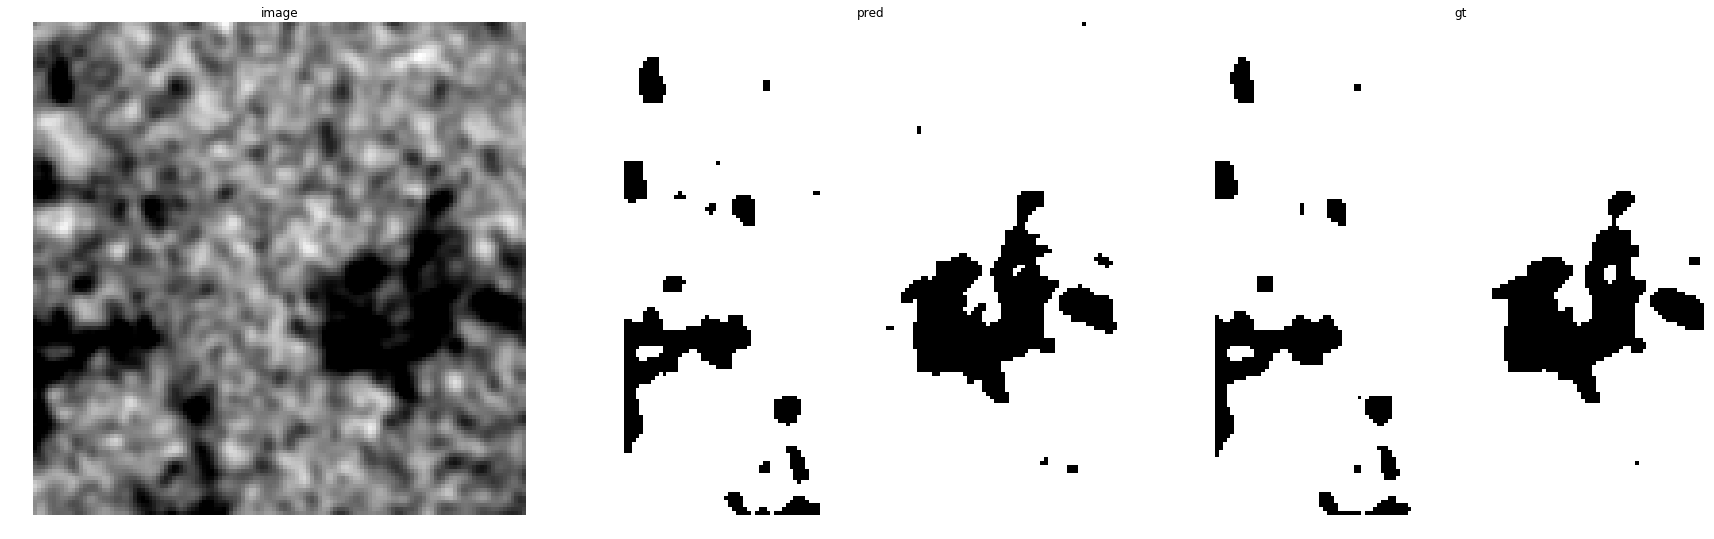

accuracy    : 0.9879150390625
precision   : 0.997572142064373
recall      : 0.9887926292629263
f1          : 0.9931629834254143
pr_auc      : 0.9999101880638879
iou         : 0.9864188215927018


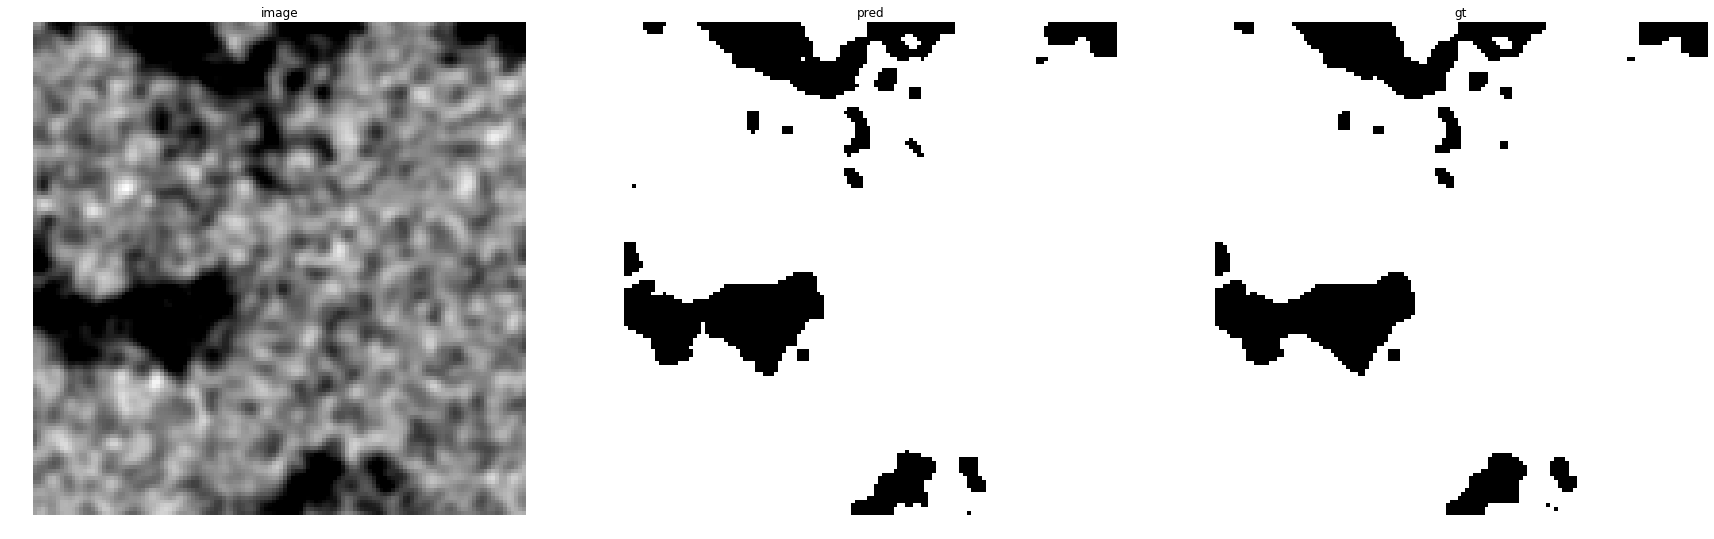

accuracy    : 0.9923095703125
precision   : 0.9978416765299728
recall      : 0.9934151244194912
f1          : 0.9956234803751303
pr_auc      : 0.9999498276463619
iou         : 0.9912851016738138


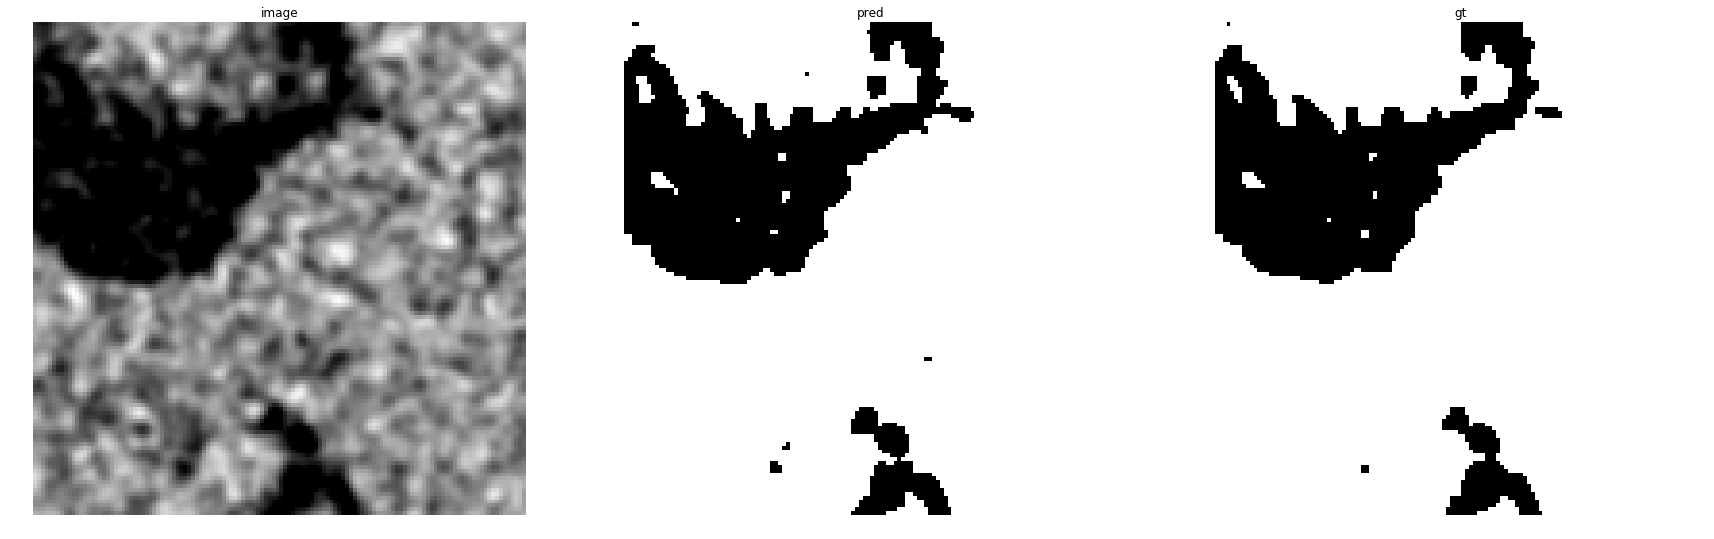

accuracy    : 0.99066162109375
precision   : 0.9971111448988901
recall      : 0.991308291134457
f1          : 0.9942012507106309
pr_auc      : 0.9999140328422573
iou         : 0.9884693646846032


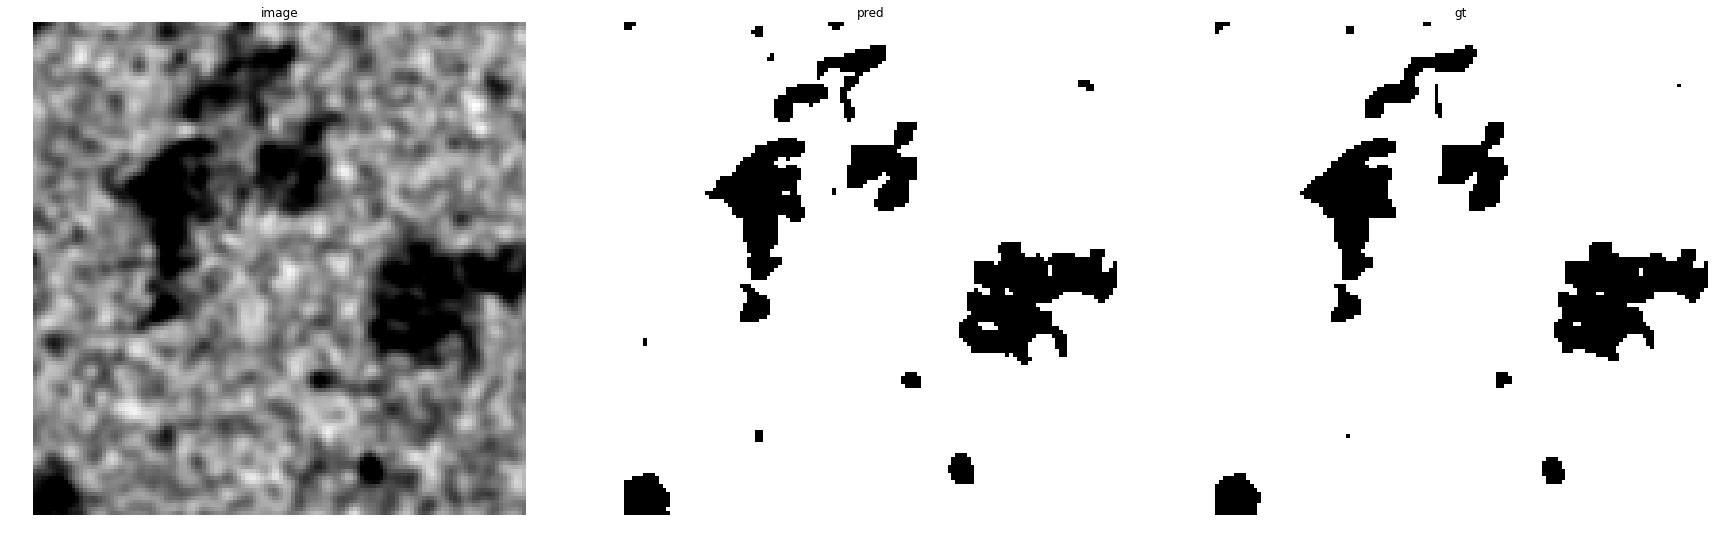

accuracy    : 0.9869384765625
precision   : 0.9963468431210367
recall      : 0.9889846743295019
f1          : 0.992652108226892
pr_auc      : 0.9998679496142155
iou         : 0.9854114118208467


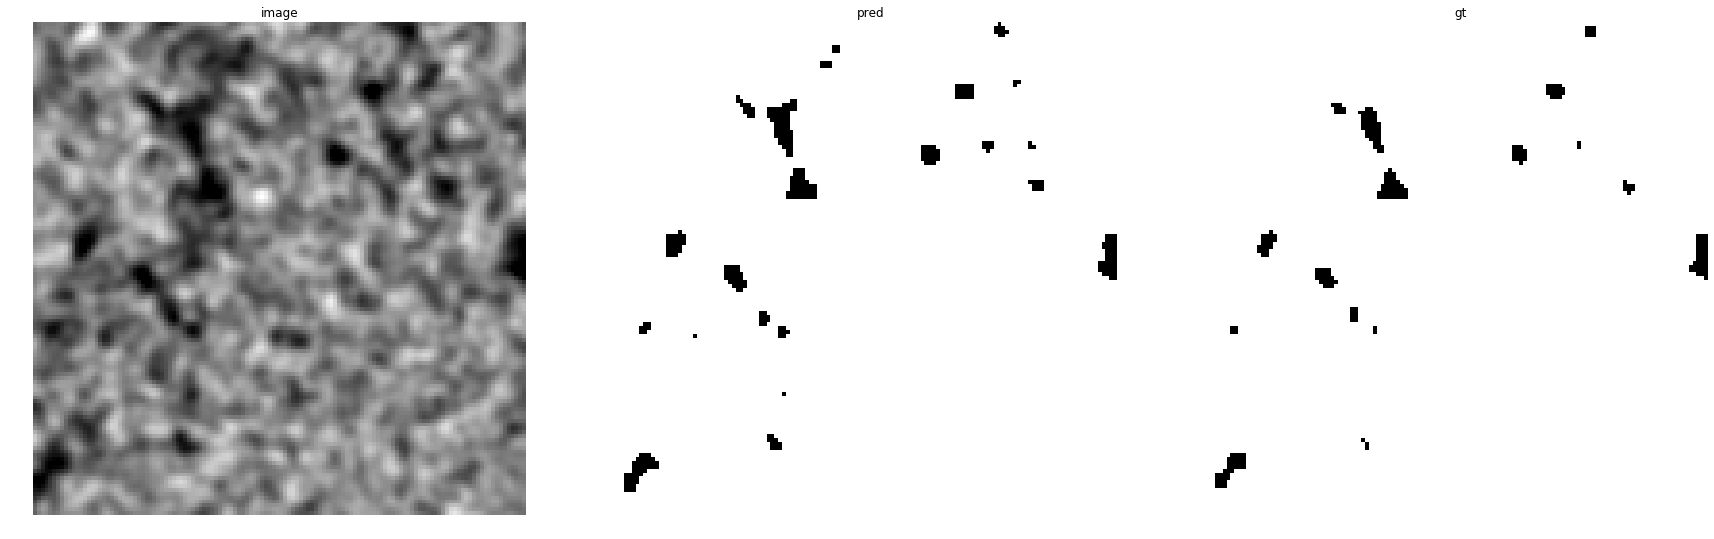

accuracy    : 0.9923095703125
precision   : 0.9995623358759534
recall      : 0.9926114491493854
f1          : 0.9960747663551403
pr_auc      : 0.9999877801228706
iou         : 0.9921802271457829


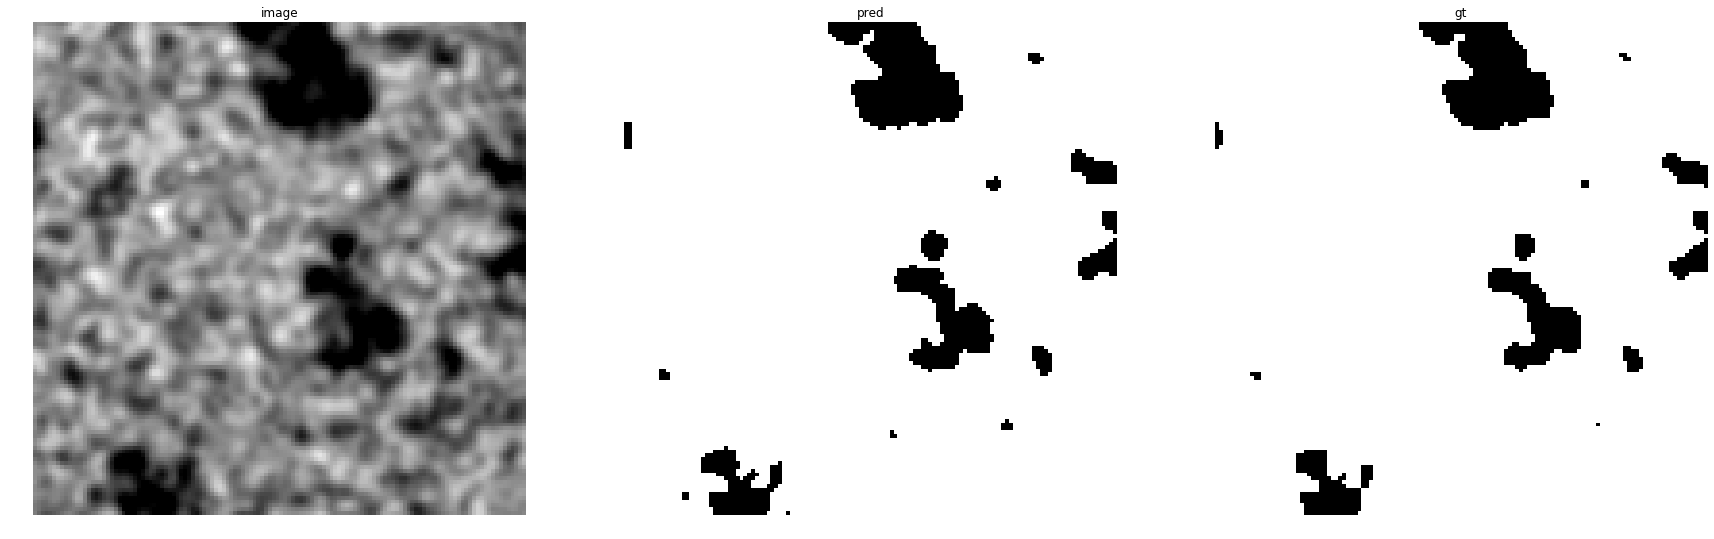

accuracy    : 0.9912109375
precision   : 0.9989305527705368
recall      : 0.9915079944271213
f1          : 0.9952054338416462
pr_auc      : 0.9999631977510285
iou         : 0.9904566240307509


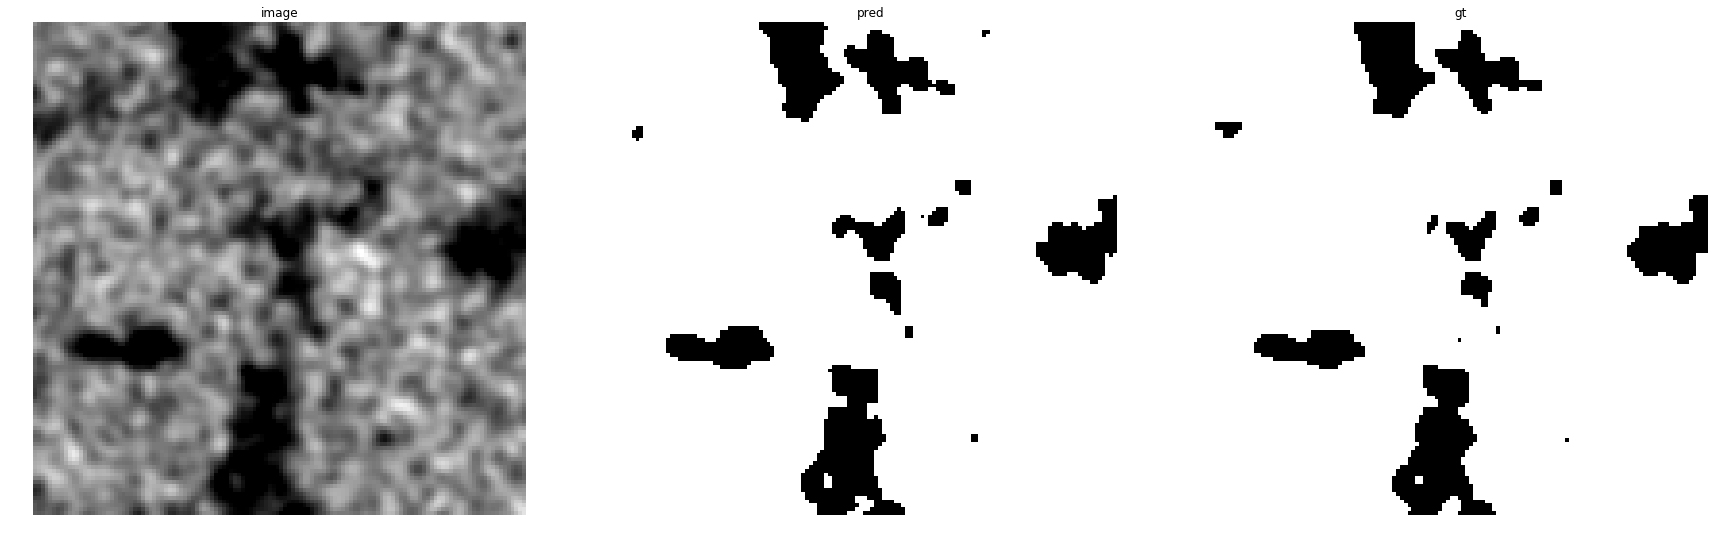

accuracy    : 0.98858642578125
precision   : 0.9966199903428296
recall      : 0.9905388728918141
f1          : 0.993570126878245
pr_auc      : 0.9998889718260765
iou         : 0.9872224120259652


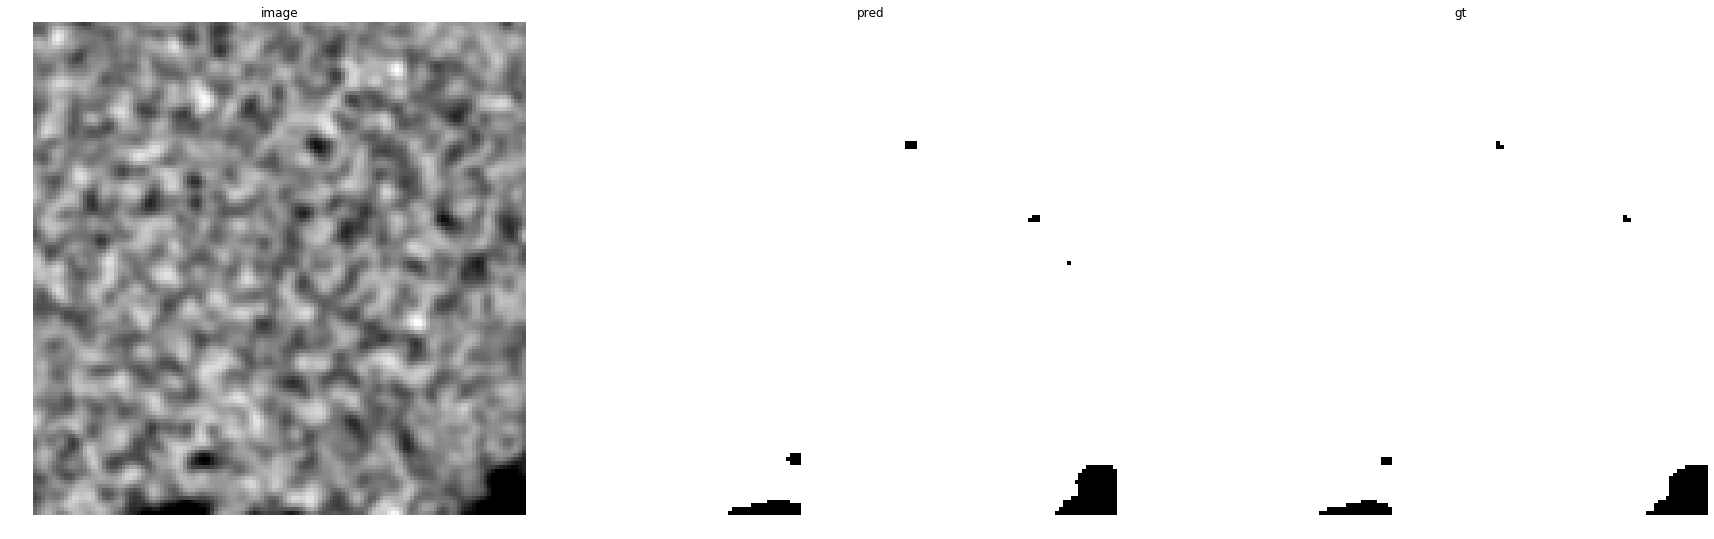

accuracy    : 0.99853515625
precision   : 0.9999381111523703
recall      : 0.9985784919653894
f1          : 0.9992578390747726
pr_auc      : 0.9999994769536188
iou         : 0.998516778938261


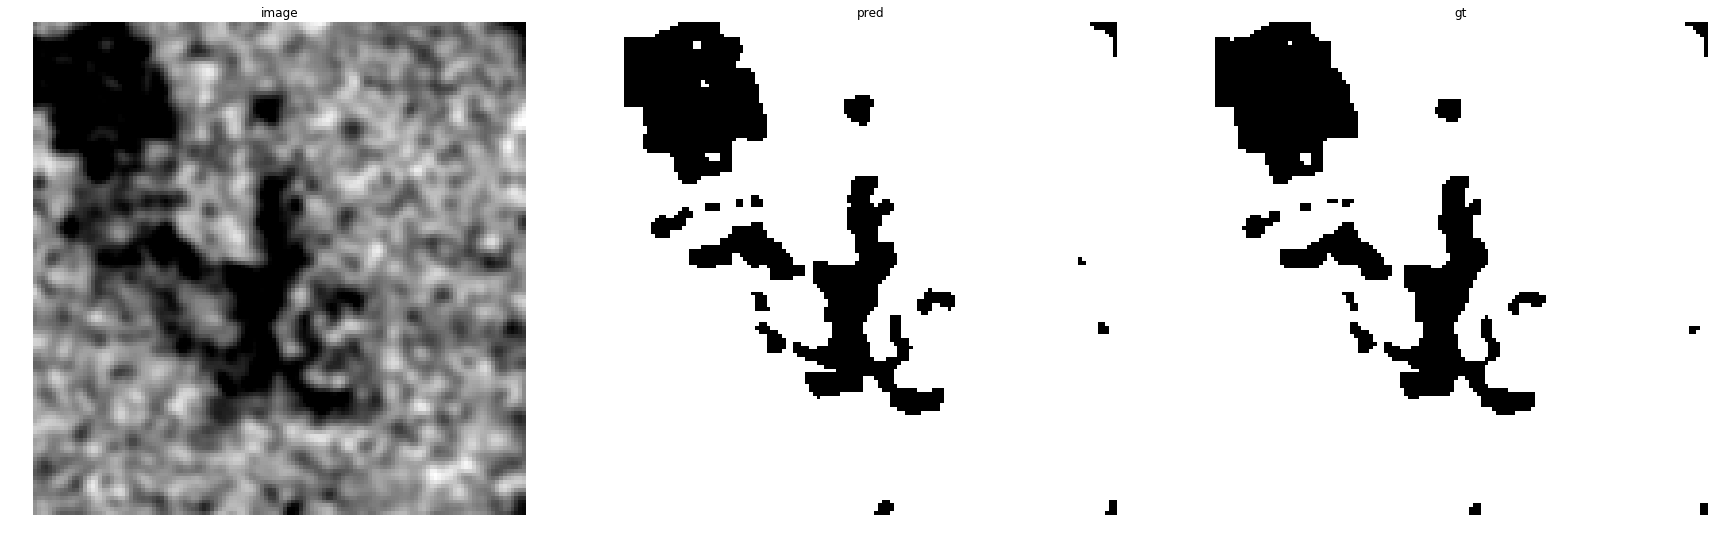

accuracy    : 0.987548828125
precision   : 0.9962819962819963
recall      : 0.989209143830754
f1          : 0.9927329723567968
pr_auc      : 0.9998767983135783
iou         : 0.9855708020936483


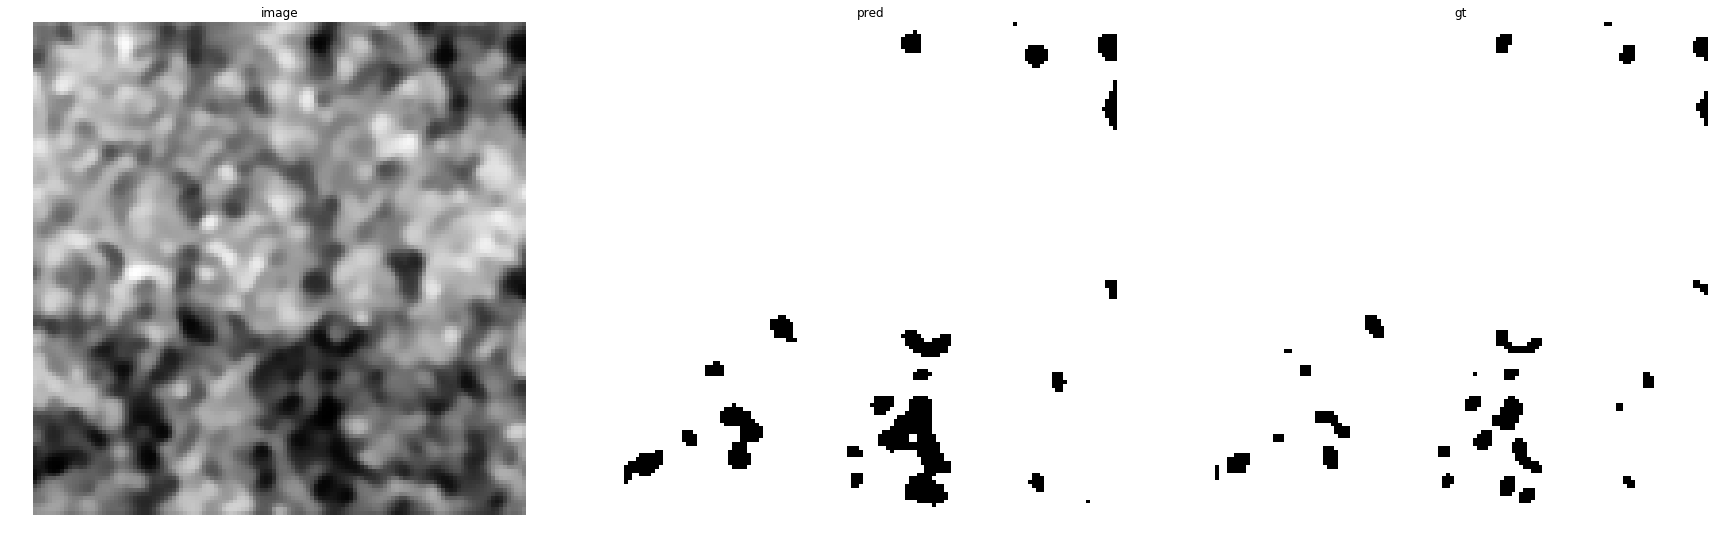

accuracy    : 0.98089599609375
precision   : 0.999233618597522
recall      : 0.9811249764846053
f1          : 0.9900965037177661
pr_auc      : 0.9999158922932614
iou         : 0.9803872423084153


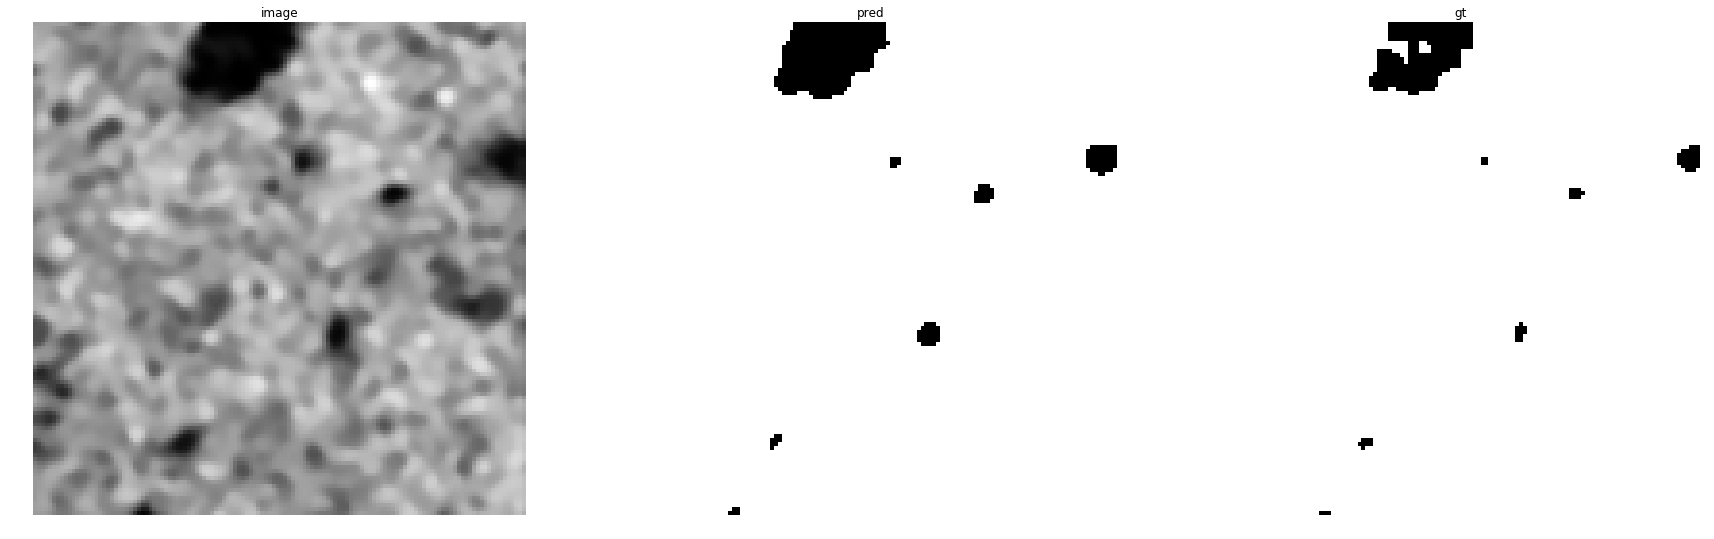

accuracy    : 0.99066162109375
precision   : 0.9998735697578861
recall      : 0.9905435871743486
f1          : 0.9951867115487464
pr_auc      : 0.9999777041112285
iou         : 0.9904195366311834


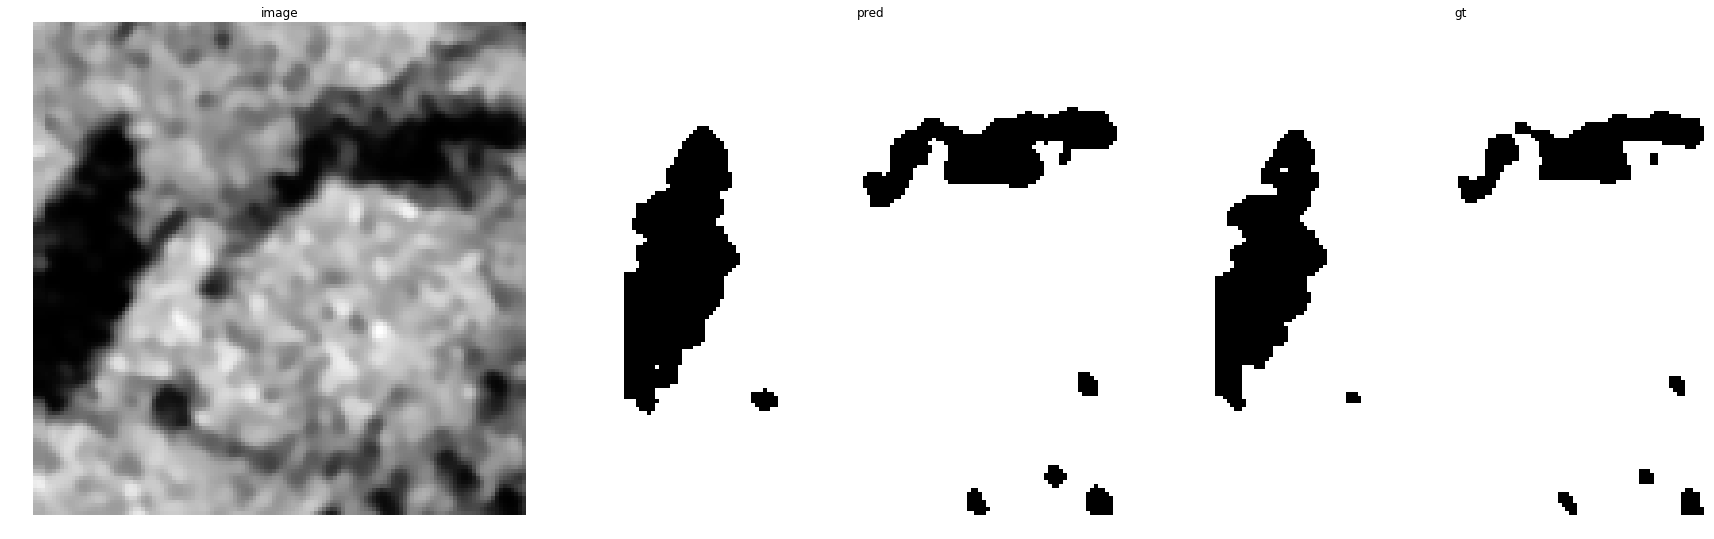

accuracy    : 0.97454833984375
precision   : 1.0
recall      : 0.9712592184161555
f1          : 0.9854200902066361
pr_auc      : 0.999912228227951
iou         : 0.9712592184161555


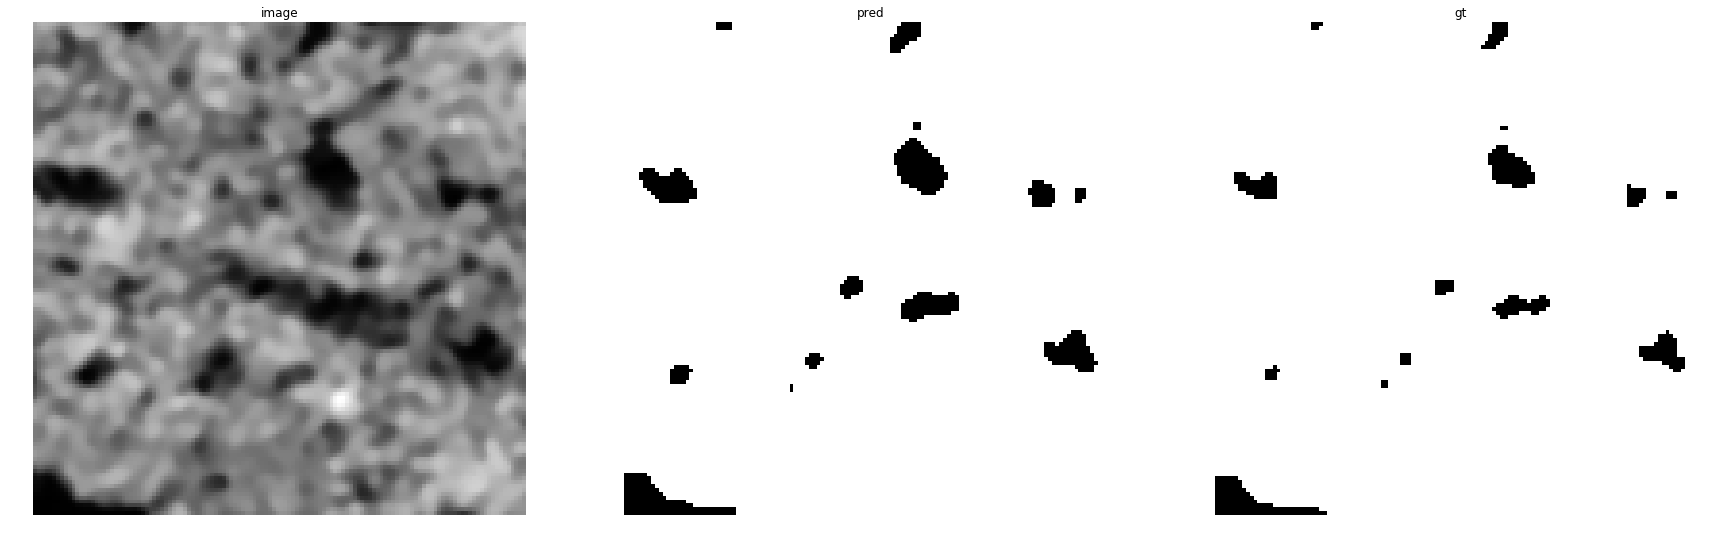

accuracy    : 0.98590087890625
precision   : 0.9997444905780901
recall      : 0.9857034891044212
f1          : 0.9926743411663971
pr_auc      : 0.9999772224645711
iou         : 0.9854552323384964


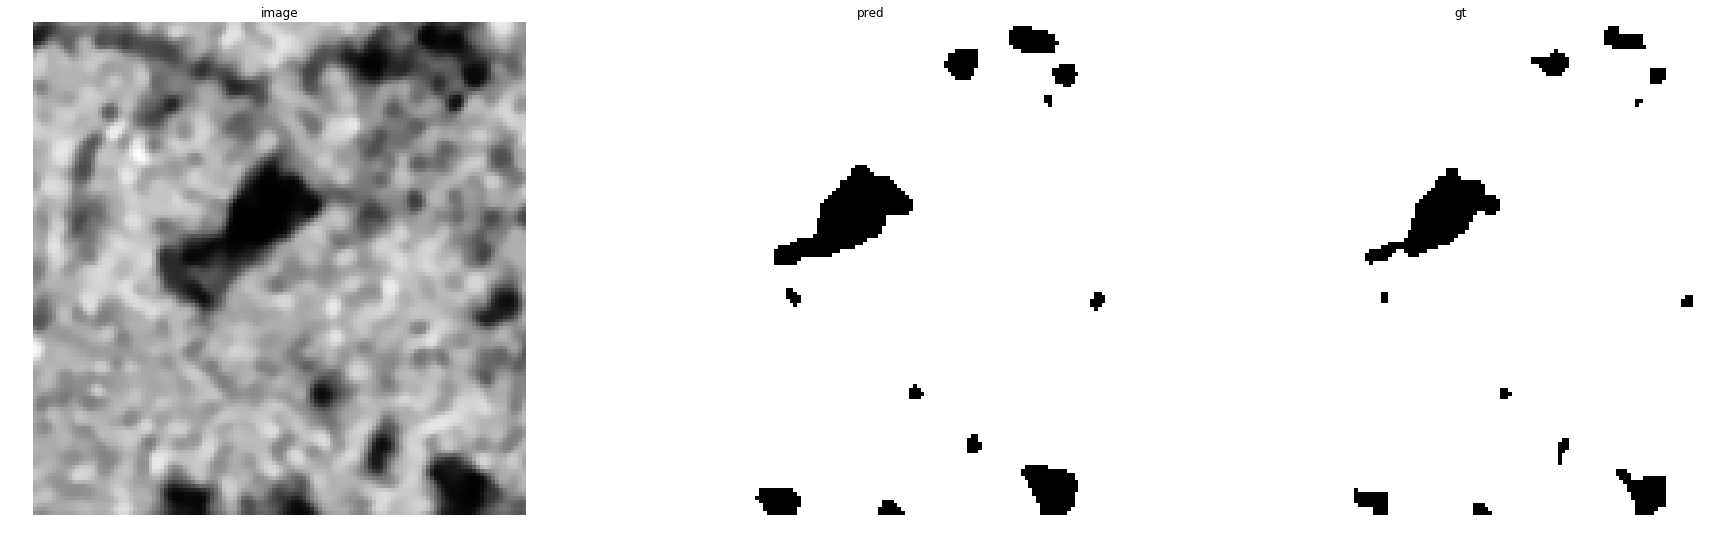

accuracy    : 0.98492431640625
precision   : 0.9995492594977463
recall      : 0.9847744718644929
f1          : 0.99210686095932
pr_auc      : 0.9999593479532525
iou         : 0.9843373493975903


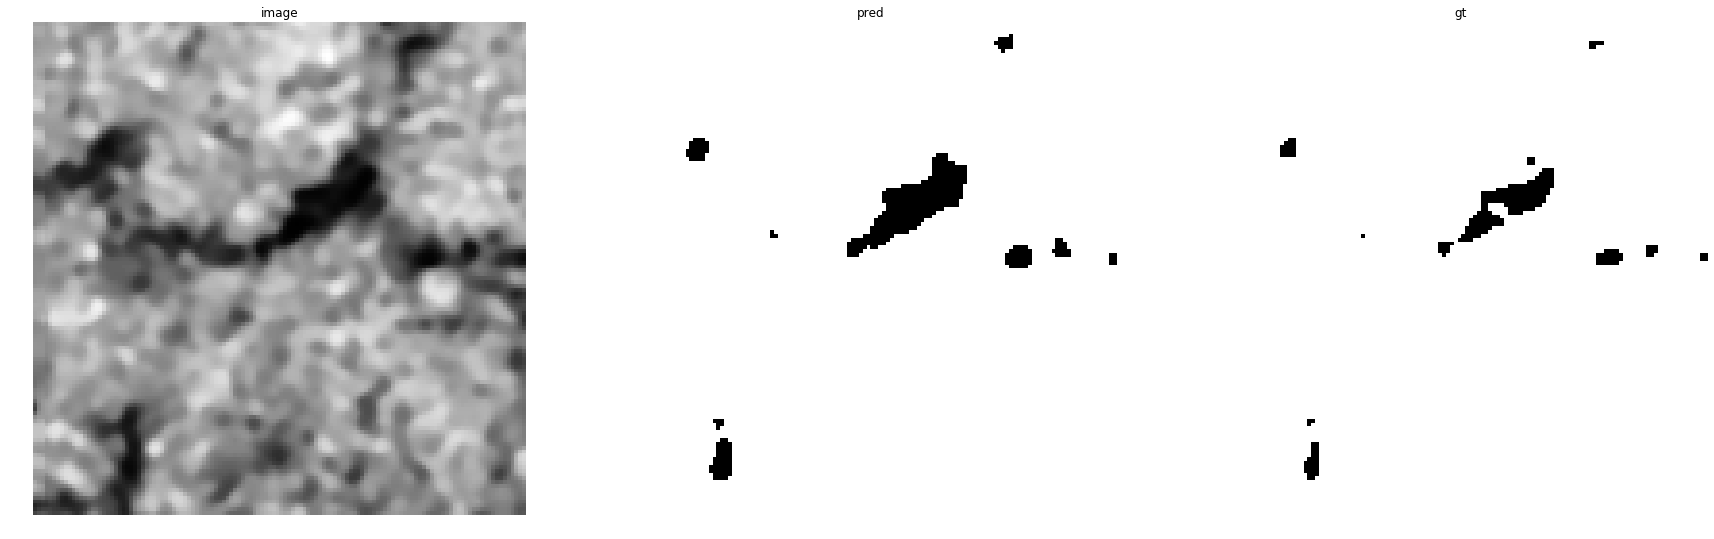

accuracy    : 0.98828125
precision   : 1.0
recall      : 0.988078236572493
f1          : 0.9940033731026299
pr_auc      : 0.9999757299475008
iou         : 0.988078236572493


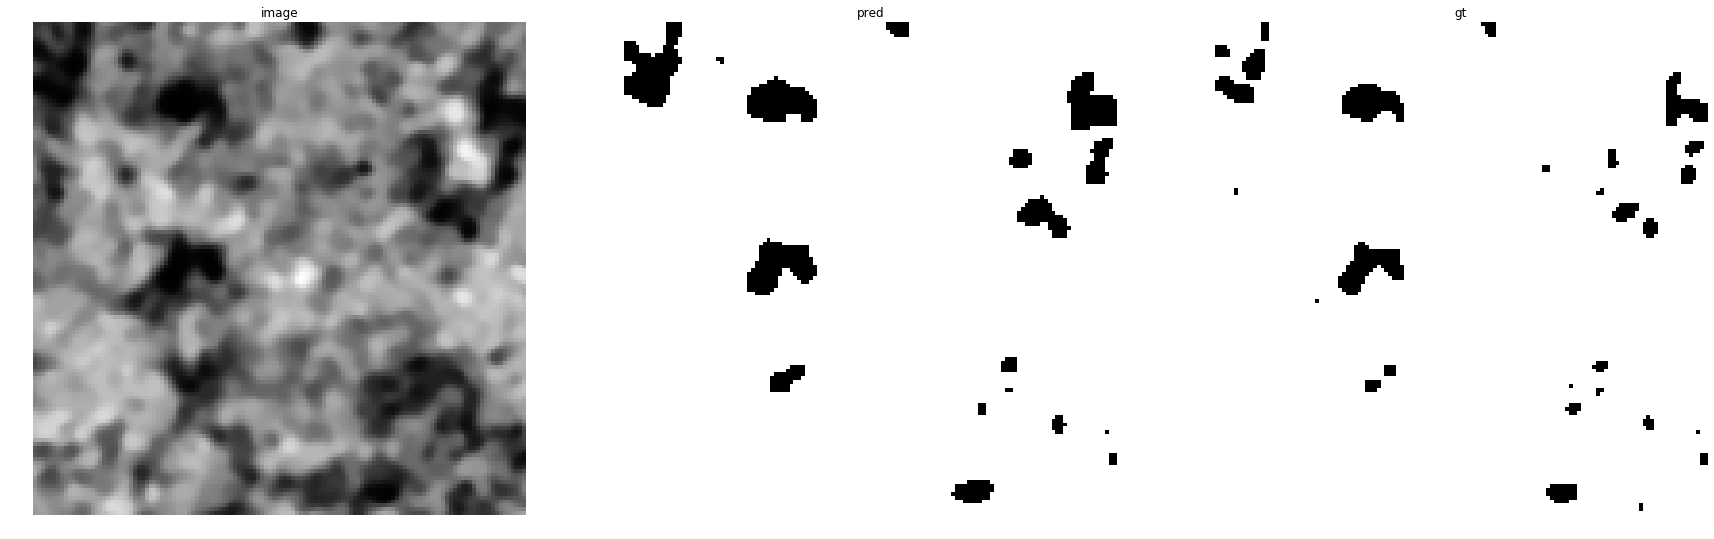

accuracy    : 0.9775390625
precision   : 0.9988977501134669
recall      : 0.9777241860760297
f1          : 0.9881975625400898
pr_auc      : 0.9998822794717589
iou         : 0.9766704703943198


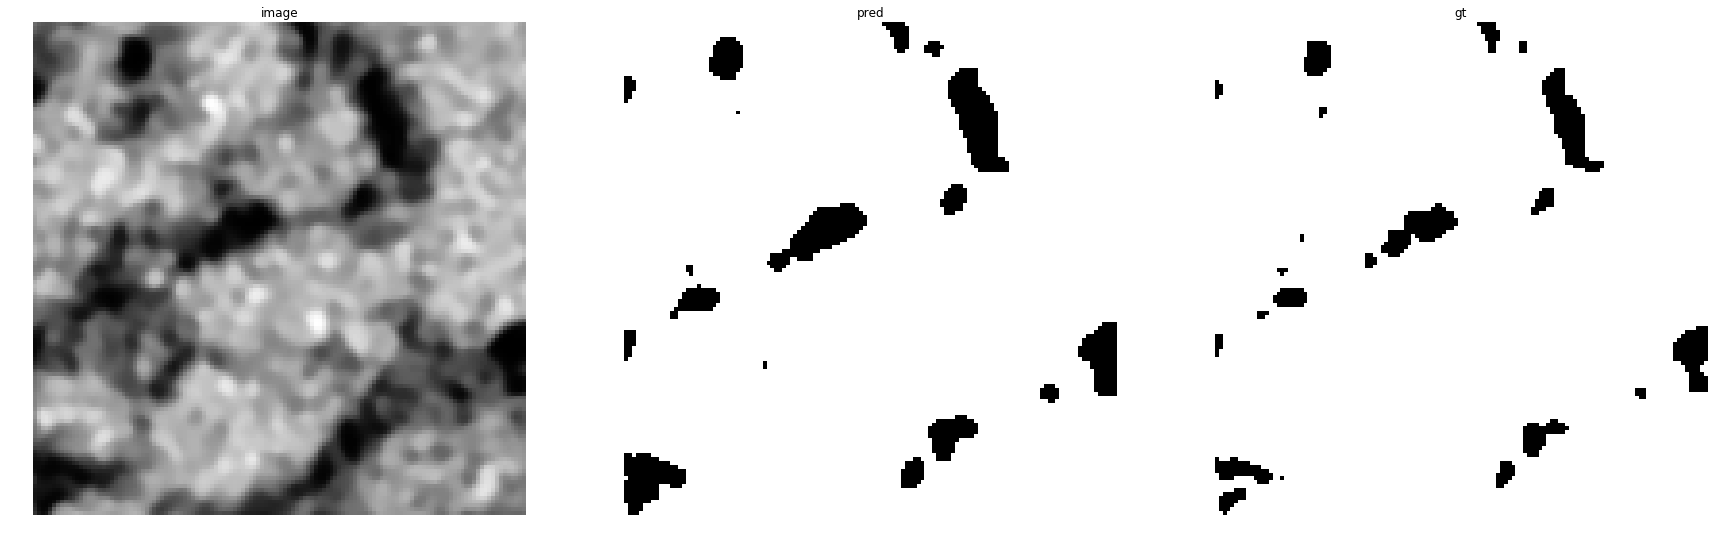

accuracy    : 0.9759521484375
precision   : 0.9990140659918496
recall      : 0.9756708178200025
f1          : 0.9872044686931671
pr_auc      : 0.9998870918925779
iou         : 0.974732251651382


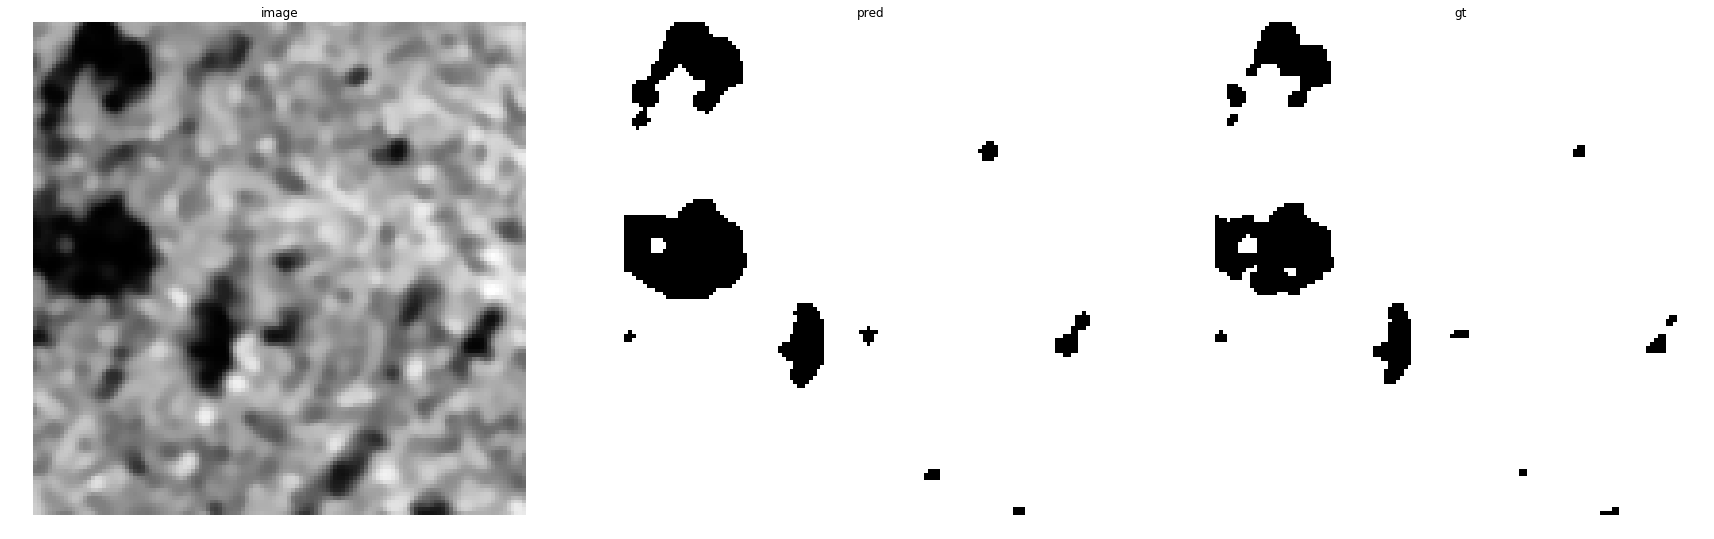

accuracy    : 0.9813232421875
precision   : 0.9996032270863643
recall      : 0.9805396990140114
f1          : 0.9899796974261575
pr_auc      : 0.9999436254541195
iou         : 0.9801582155362469


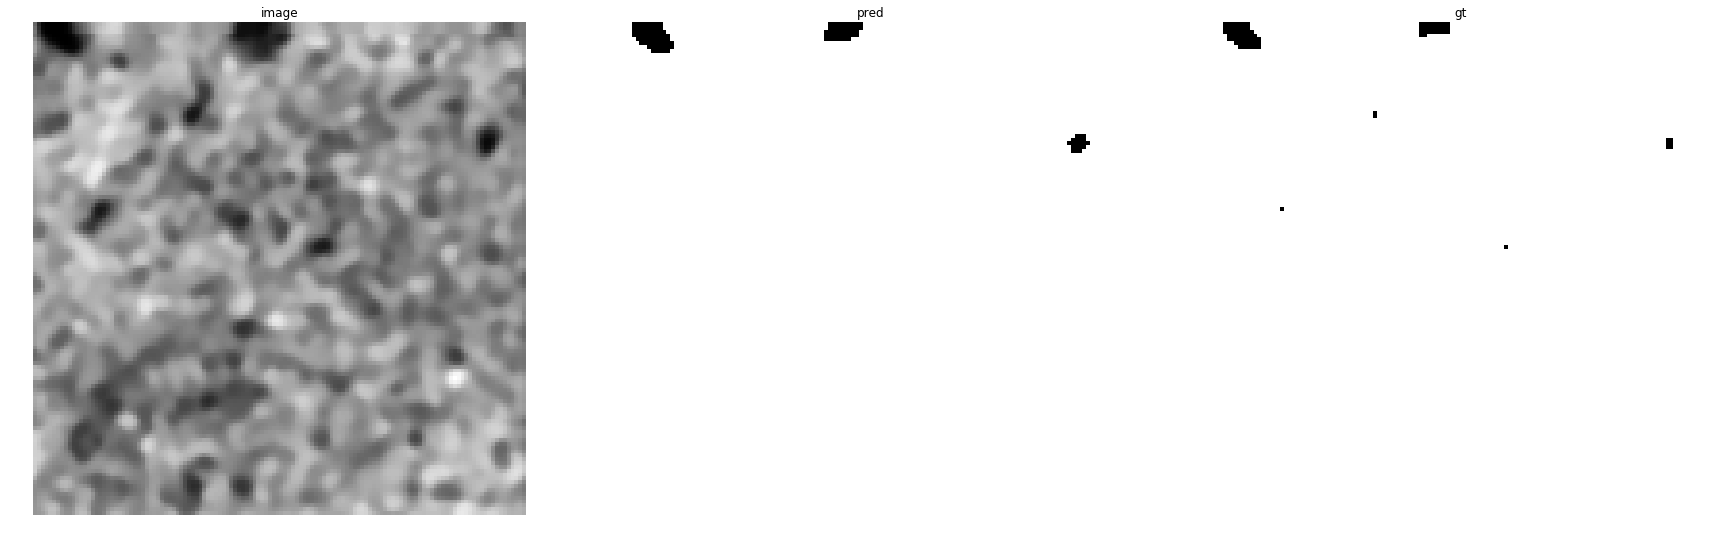

accuracy    : 0.9970703125
precision   : 0.999753937007874
recall      : 0.9972999509081983
f1          : 0.9985254362251167
pr_auc      : 0.9999978670417056
iou         : 0.9970552147239263


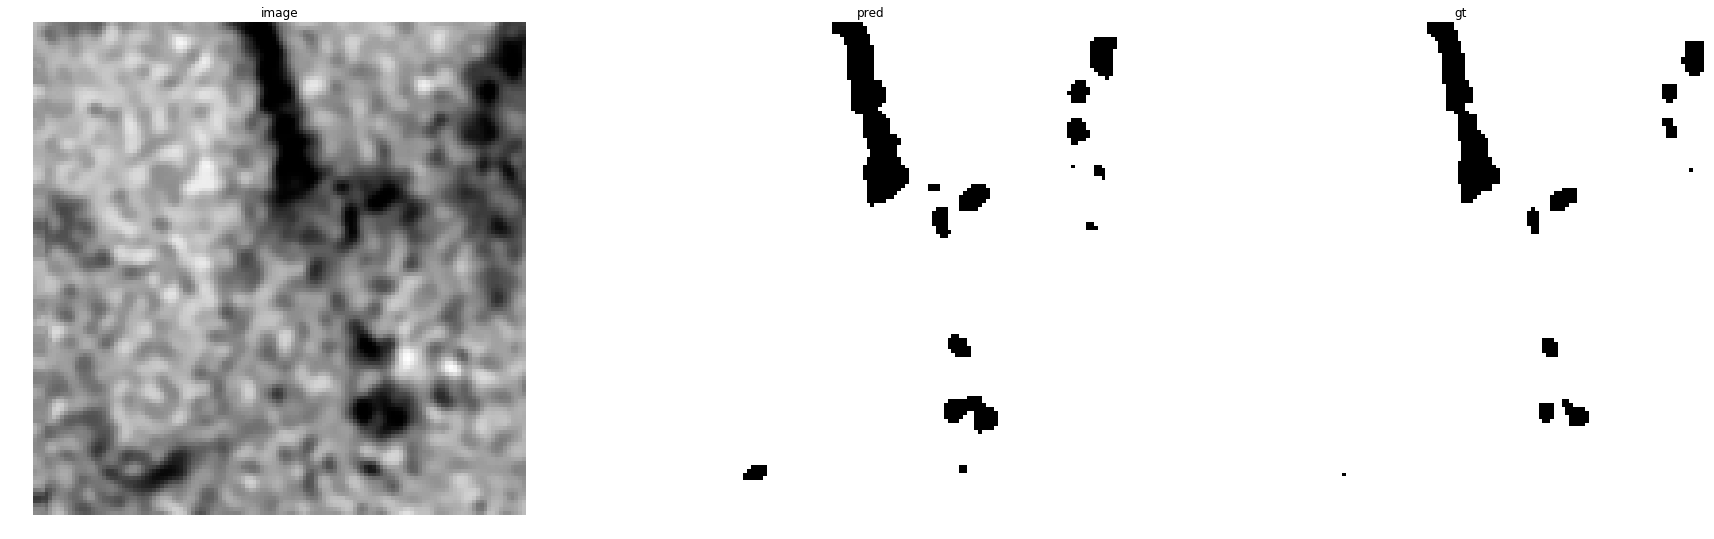

accuracy    : 0.98712158203125
precision   : 1.0
recall      : 0.9867044738500315
f1          : 0.9933077484220876
pr_auc      : 0.9999908601035348
iou         : 0.9867044738500315


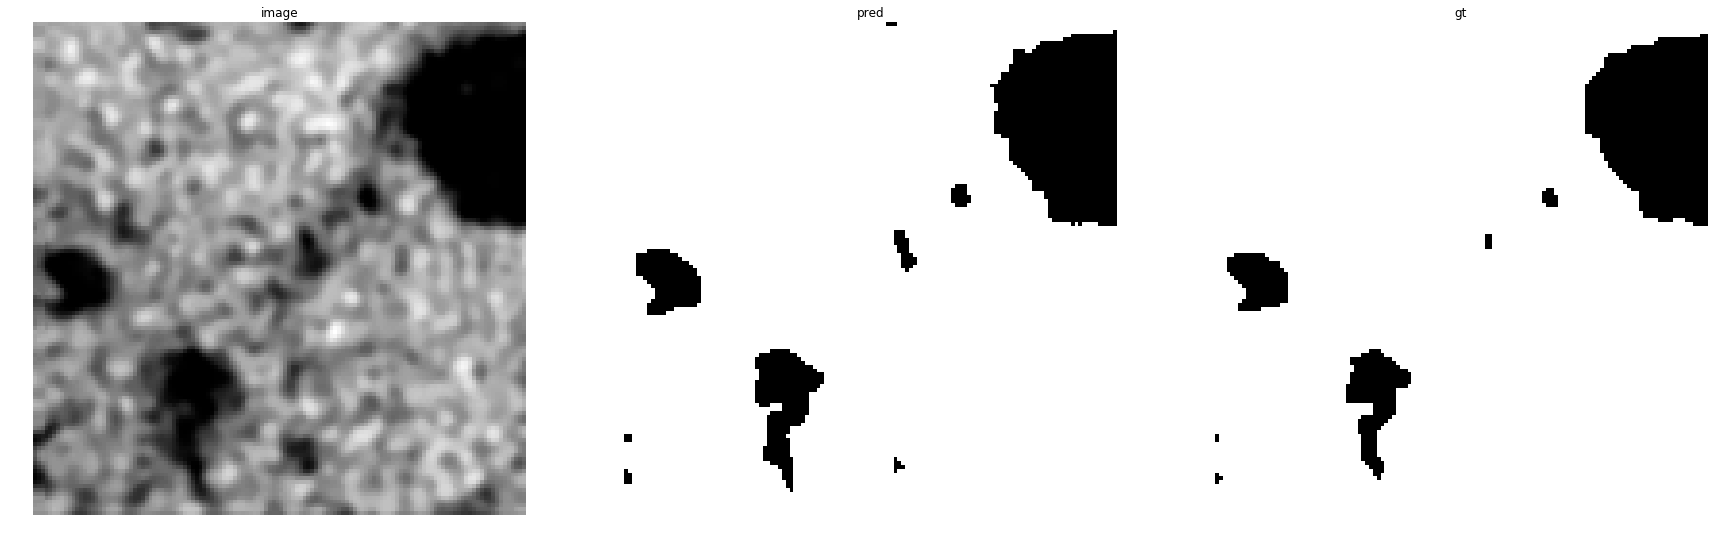

accuracy    : 0.9881591796875
precision   : 0.9997929034930277
recall      : 0.9869837808368543
f1          : 0.9933470507544582
pr_auc      : 0.9999838056472216
iou         : 0.9867820399264154


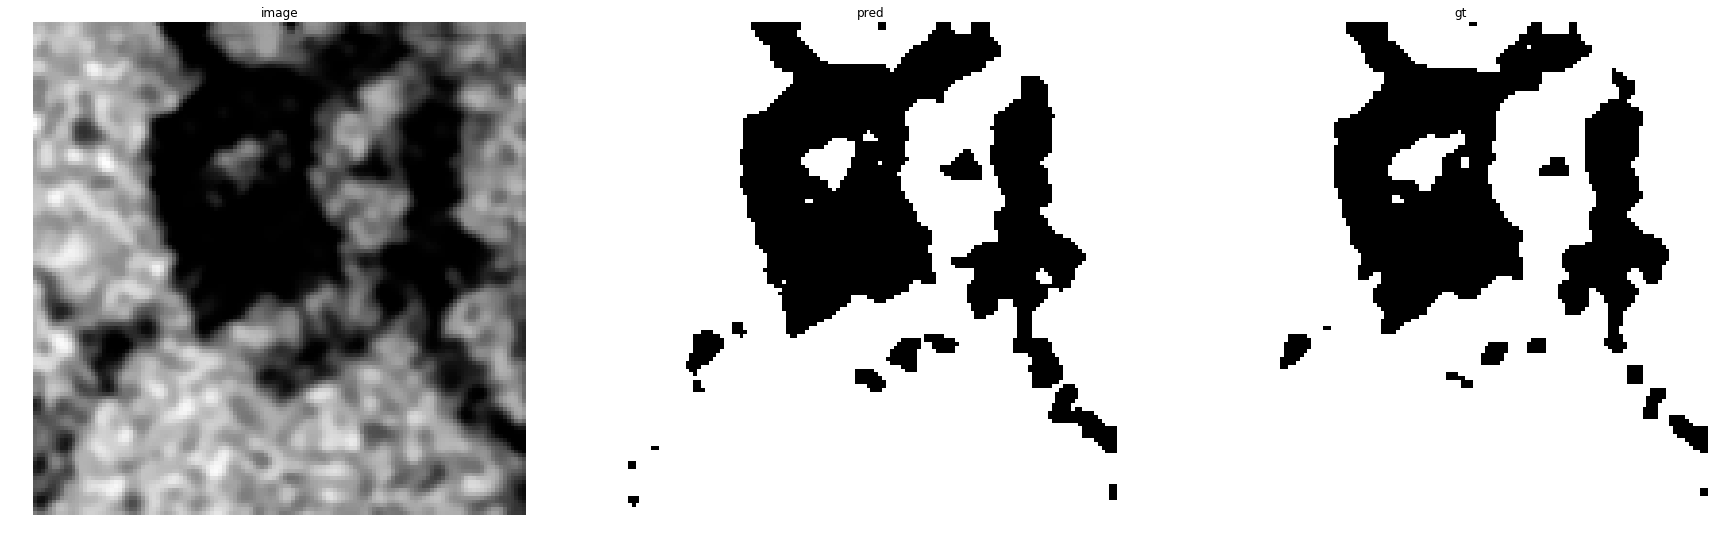

accuracy    : 0.9609375
precision   : 0.9994982018901062
recall      : 0.9496225665474771
f1          : 0.9739222557248798
pr_auc      : 0.9996751890812396
iou         : 0.9491700420935589


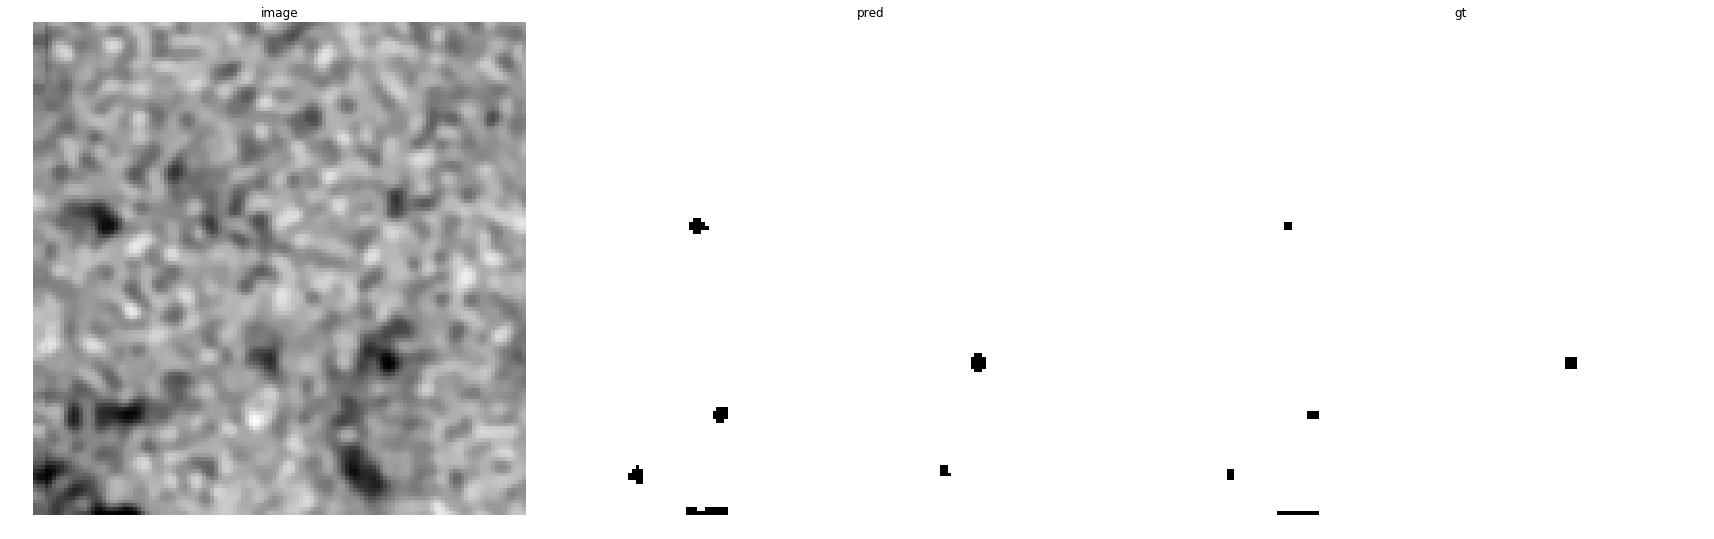

accuracy    : 0.99713134765625
precision   : 1.0
recall      : 0.997125030584781
f1          : 0.9985604459554657
pr_auc      : 0.9999996519677133
iou         : 0.997125030584781


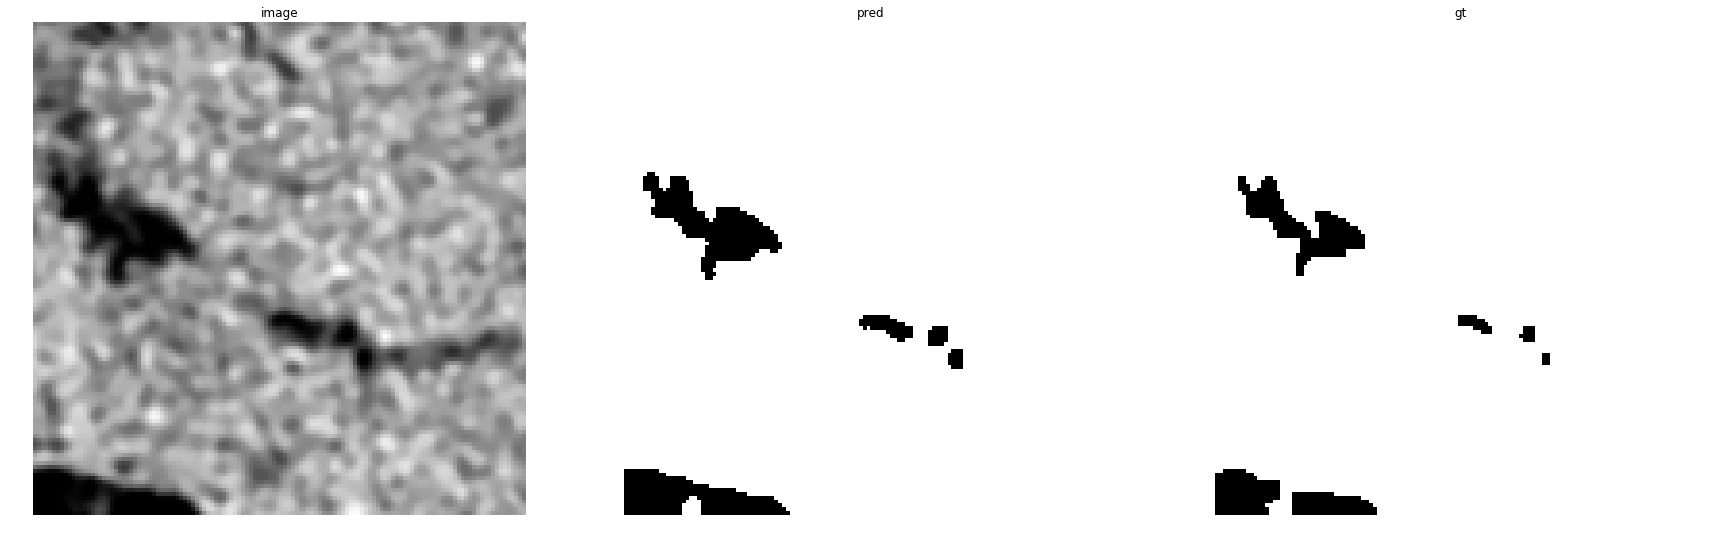

accuracy    : 0.98919677734375
precision   : 1.0
recall      : 0.9887754454943243
f1          : 0.9943560473199197
pr_auc      : 0.9999875229175581
iou         : 0.9887754454943243


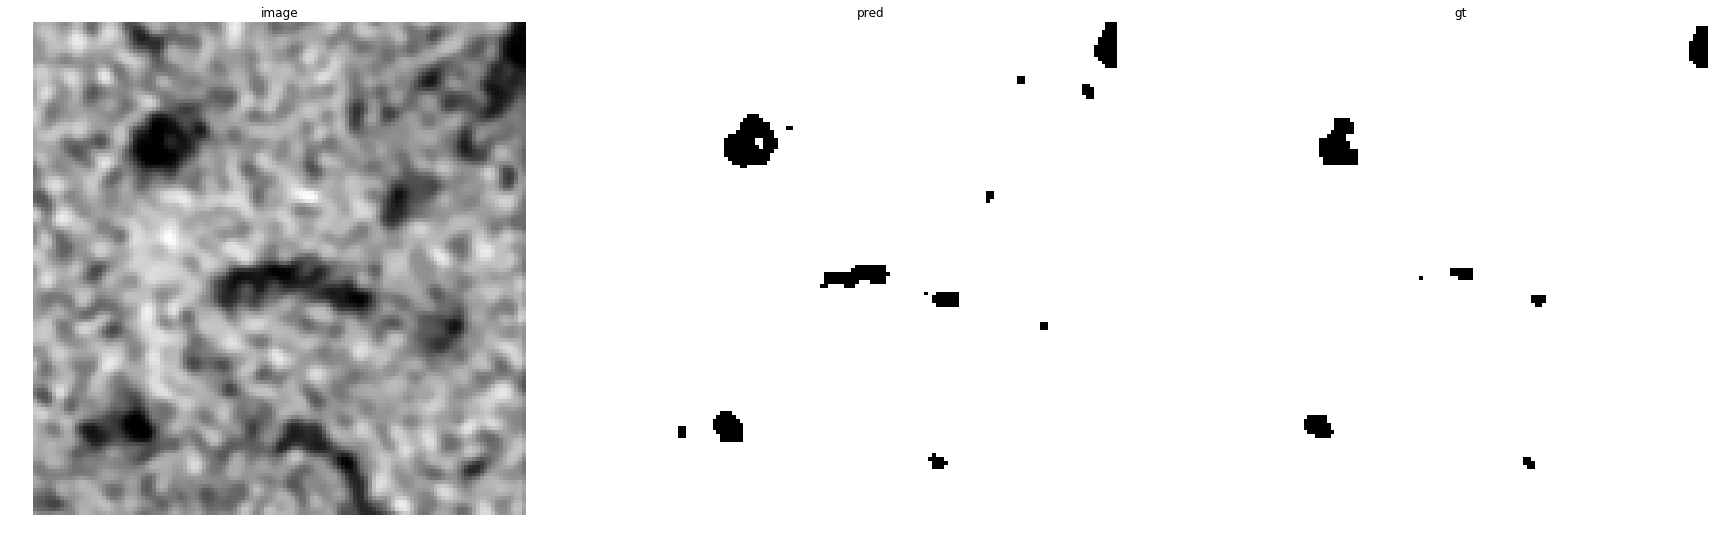

accuracy    : 0.989501953125
precision   : 0.9999375468398701
recall      : 0.9894327030033371
f1          : 0.9946573895756974
pr_auc      : 0.9999925157249775
iou         : 0.989371562751035


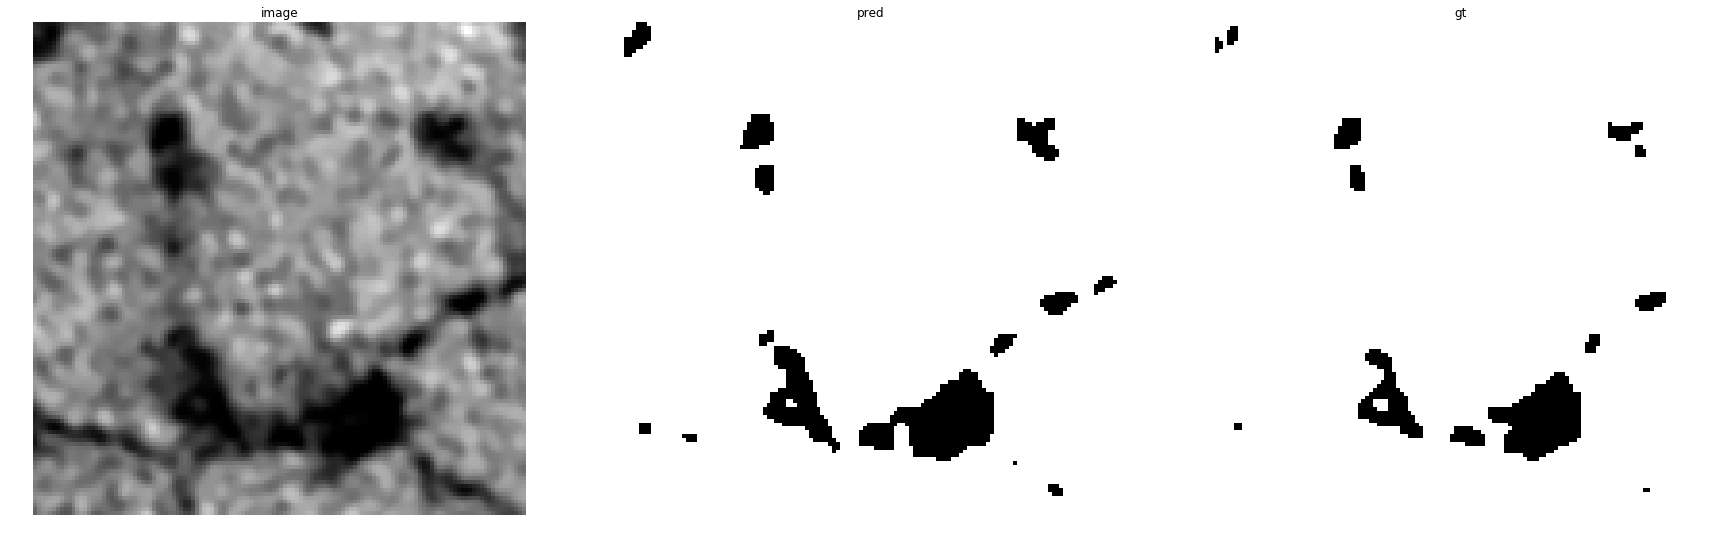

accuracy    : 0.98260498046875
precision   : 1.0
recall      : 0.9818054136874361
f1          : 0.9908191862899849
pr_auc      : 0.999973443854339
iou         : 0.9818054136874361


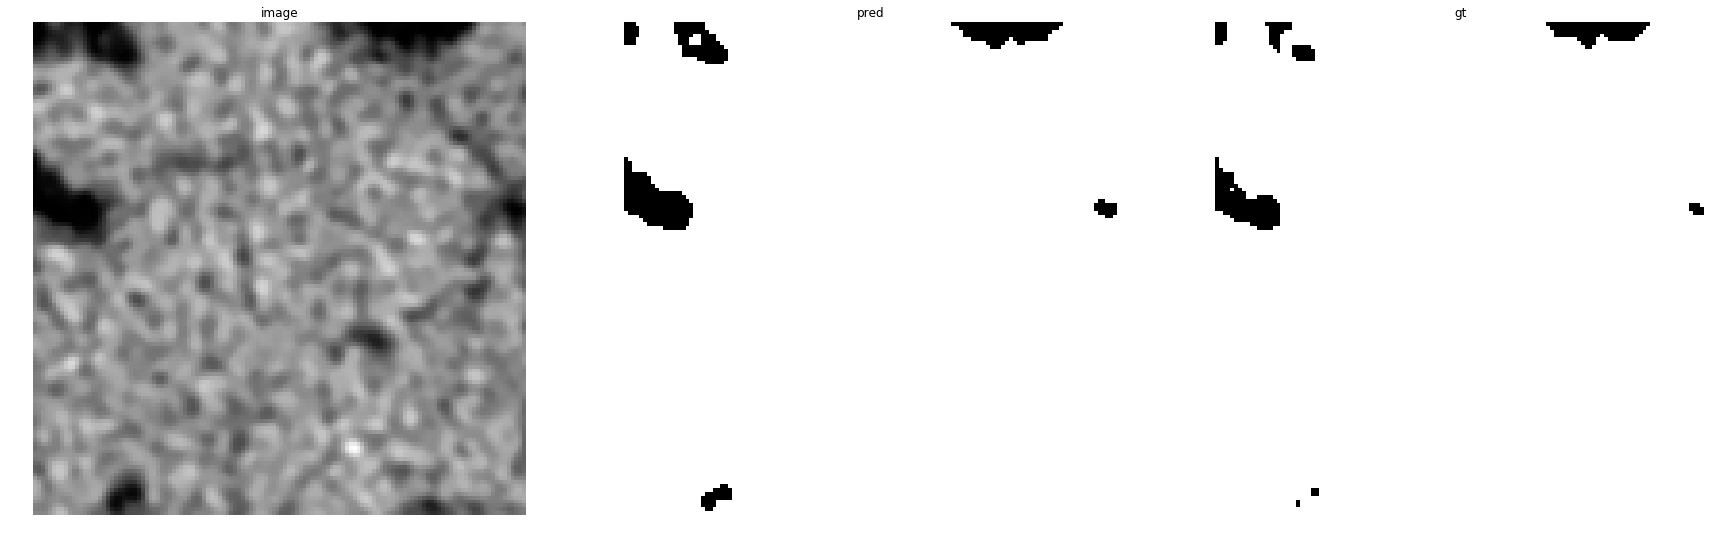

accuracy    : 0.99176025390625
precision   : 1.0
recall      : 0.9915793413173652
f1          : 0.9957718688339754
pr_auc      : 0.9999961279449322
iou         : 0.9915793413173652


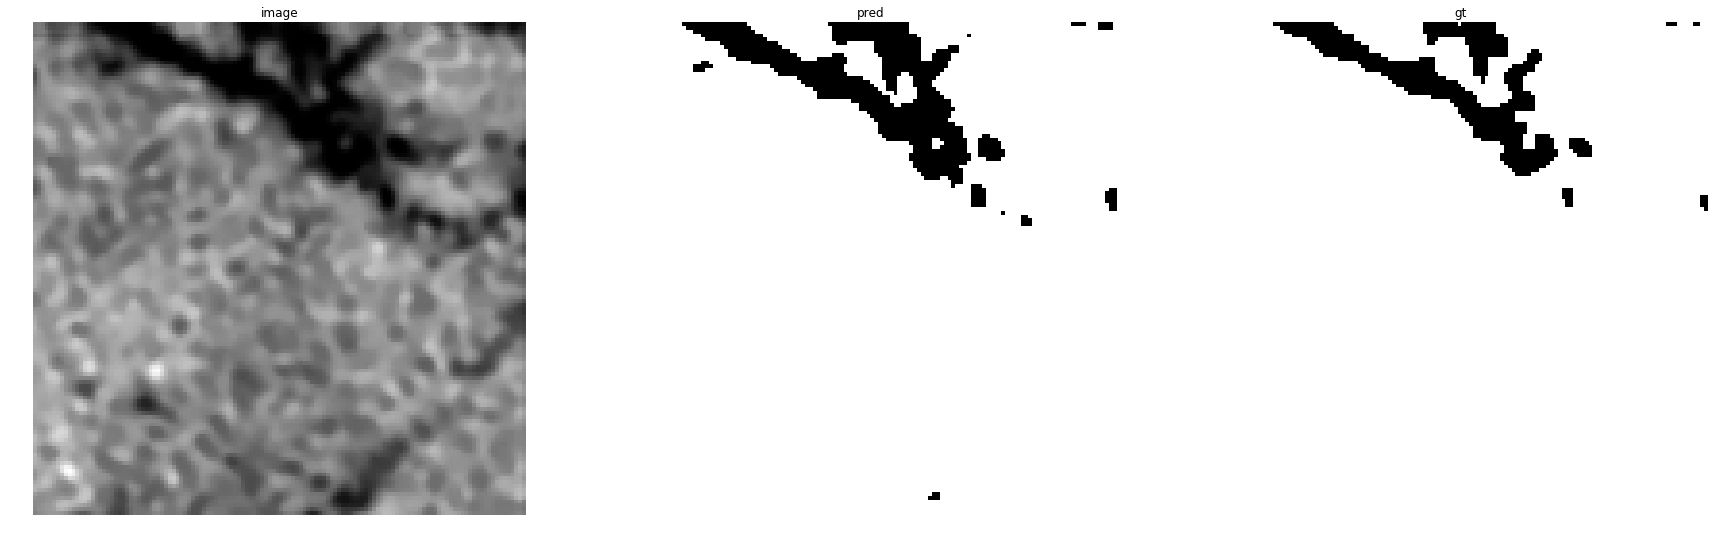

accuracy    : 0.98236083984375
precision   : 1.0
recall      : 0.9814040280548227
f1          : 0.9906147501055435
pr_auc      : 0.999963437682386
iou         : 0.9814040280548227


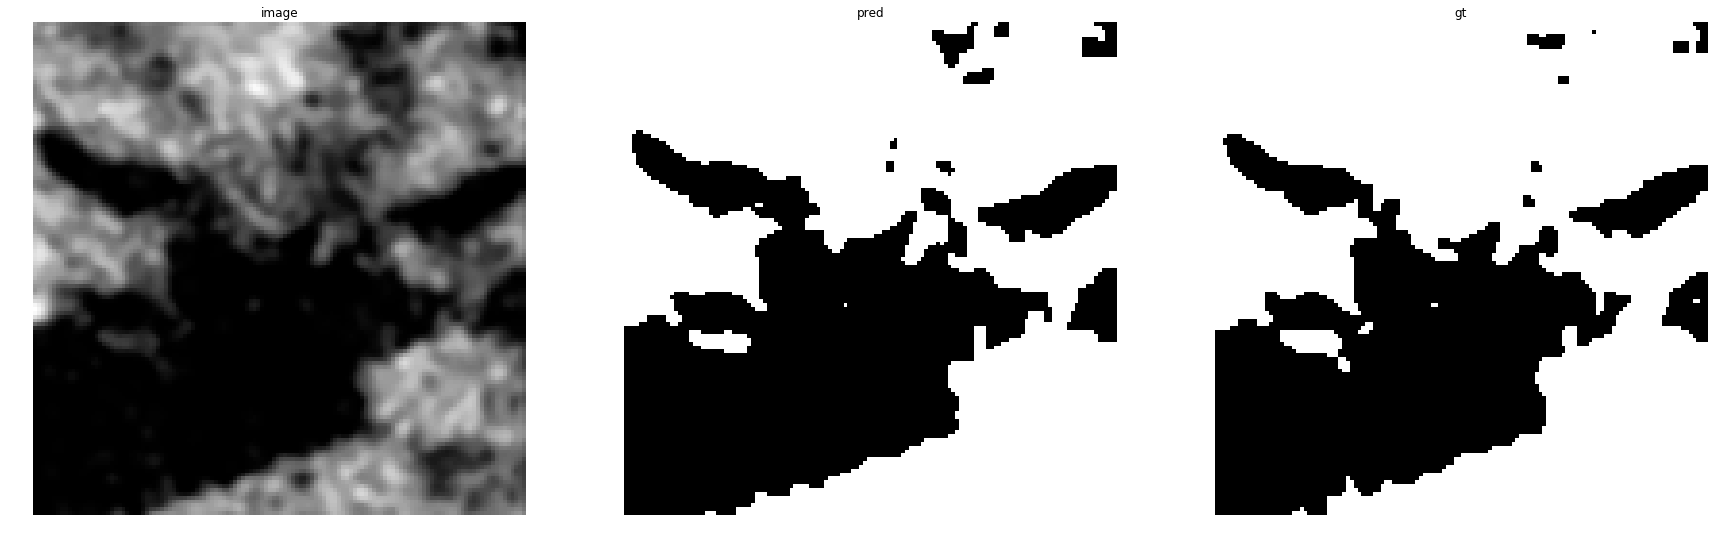

accuracy    : 0.96258544921875
precision   : 1.0
recall      : 0.9414013956600708
f1          : 0.9698163375843222
pr_auc      : 0.9995618867574684
iou         : 0.9414013956600708


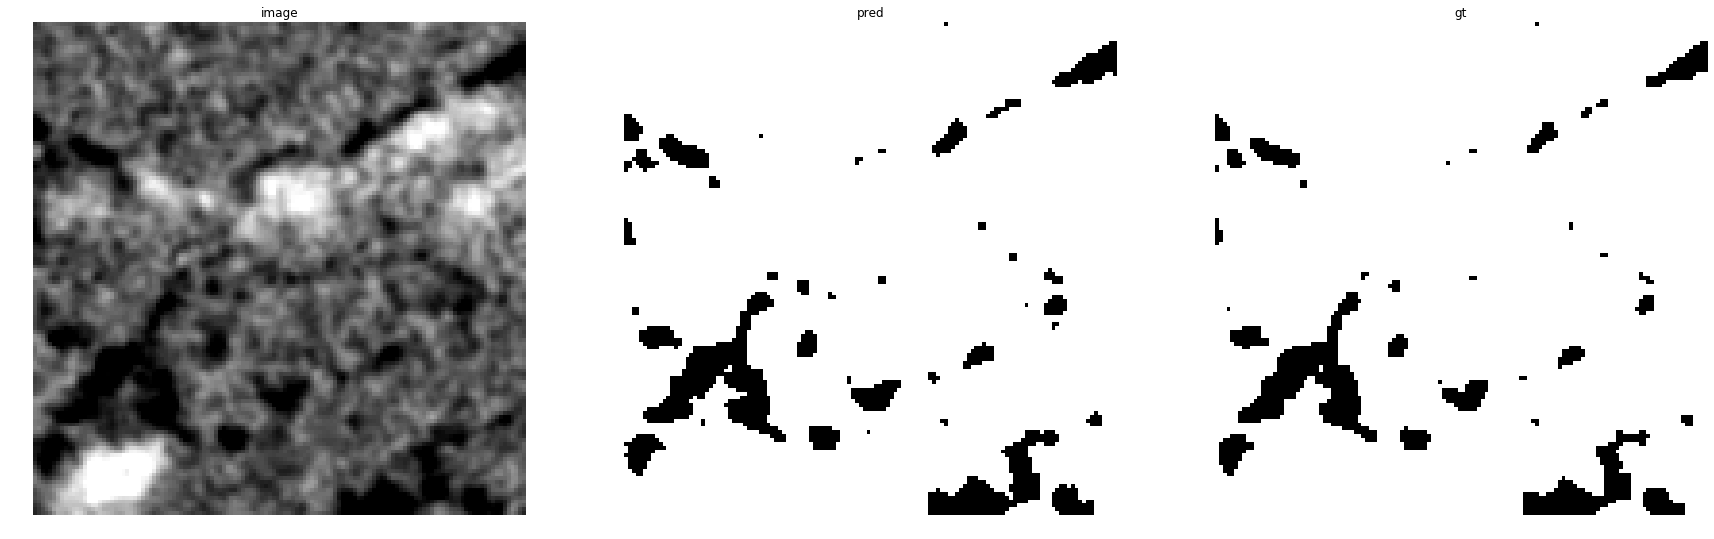

accuracy    : 0.9862060546875
precision   : 0.9991930603187412
recall      : 0.9858024281828435
f1          : 0.9924525781458723
pr_auc      : 0.999944610001261
iou         : 0.9850182300298309


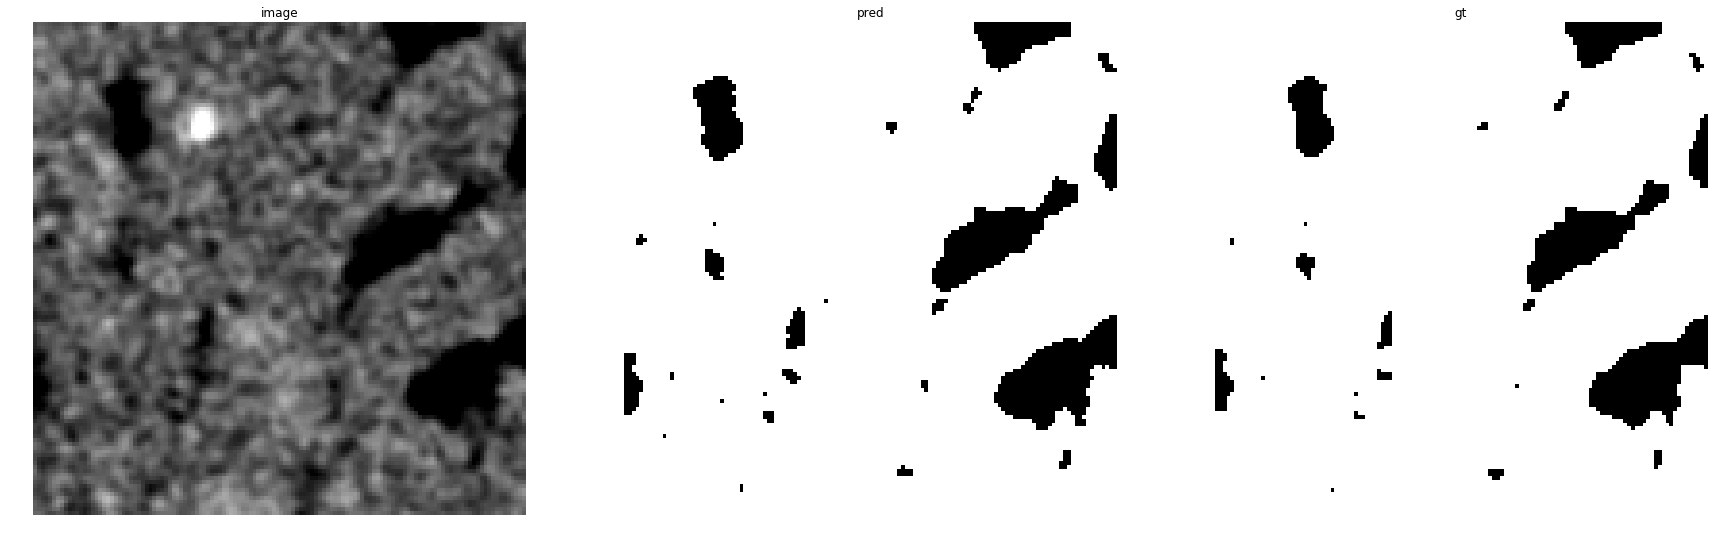

accuracy    : 0.98785400390625
precision   : 0.9992547425474255
recall      : 0.9874138046461807
f1          : 0.9932989864296057
pr_auc      : 0.9999686312083116
iou         : 0.9866871822317367


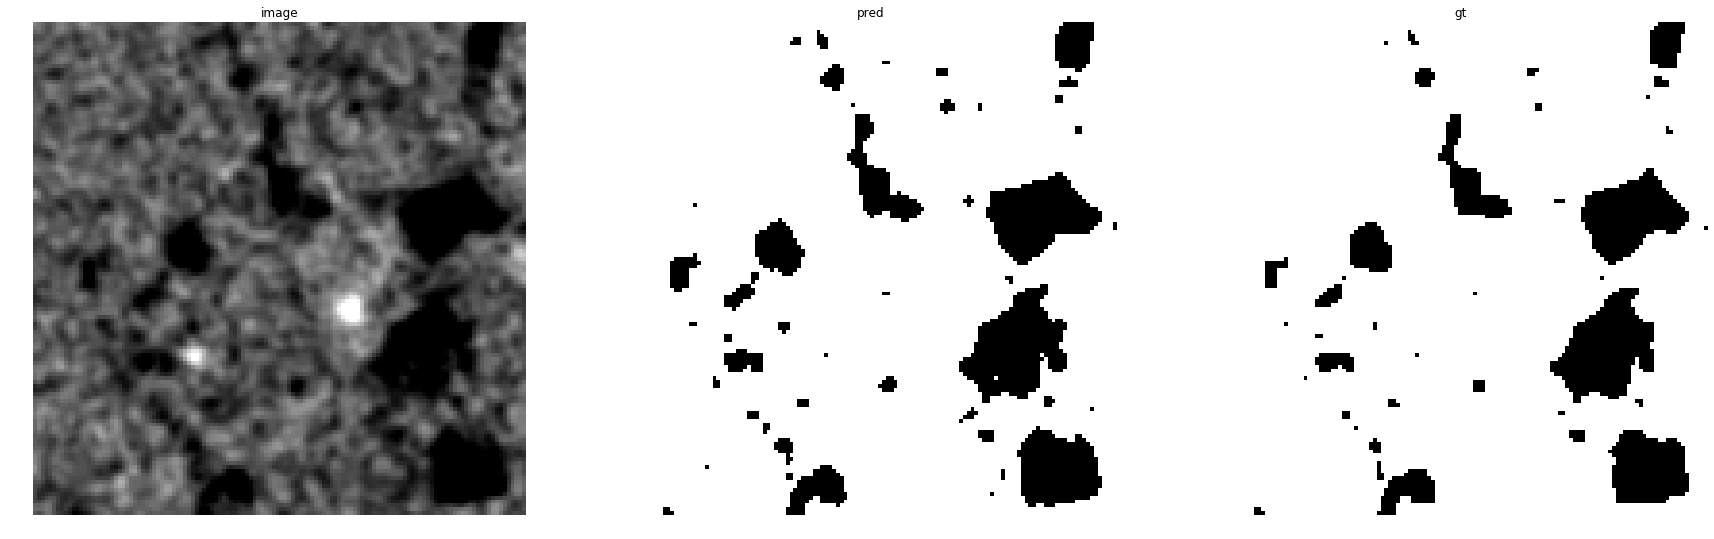

accuracy    : 0.98193359375
precision   : 0.9988050889154425
recall      : 0.9807440126992891
f1          : 0.9896921576821284
pr_auc      : 0.9999099033998516
iou         : 0.9795946504894526


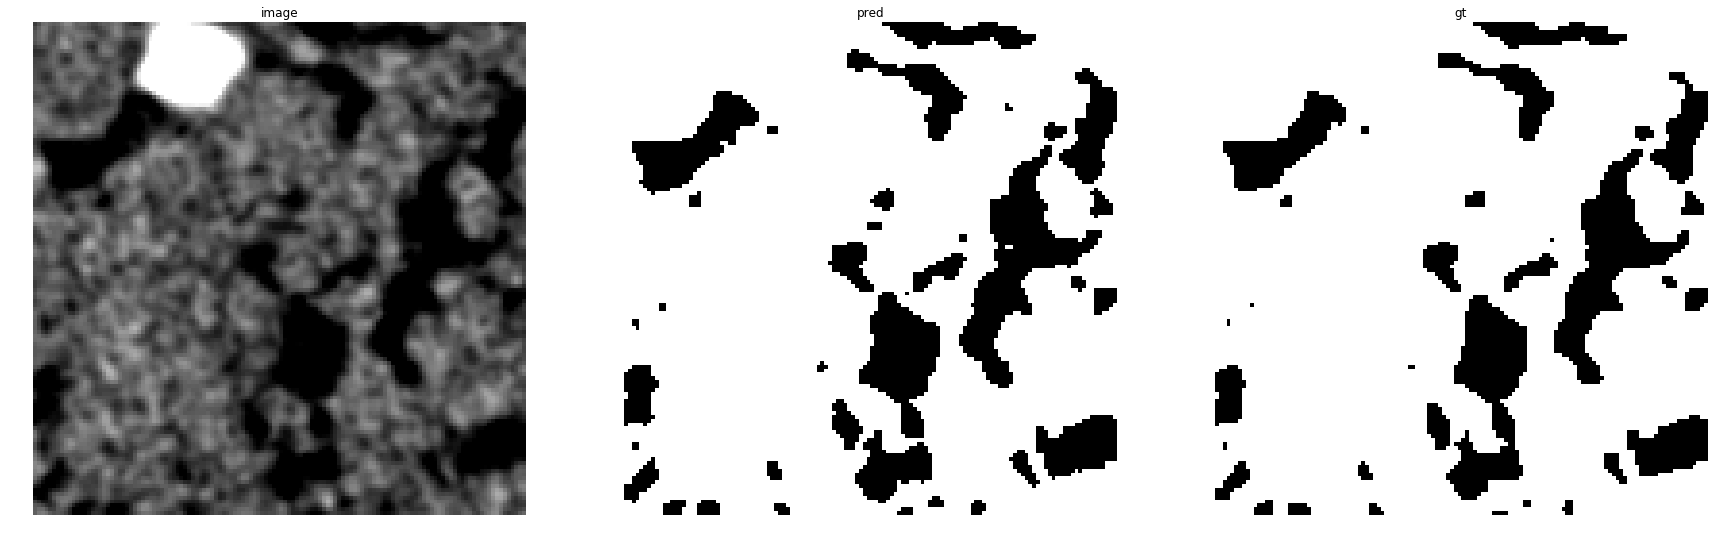

accuracy    : 0.97906494140625
precision   : 0.9984711817764867
recall      : 0.9758685095255883
f1          : 0.9870404654853213
pr_auc      : 0.9998513814025748
iou         : 0.9744125326370757


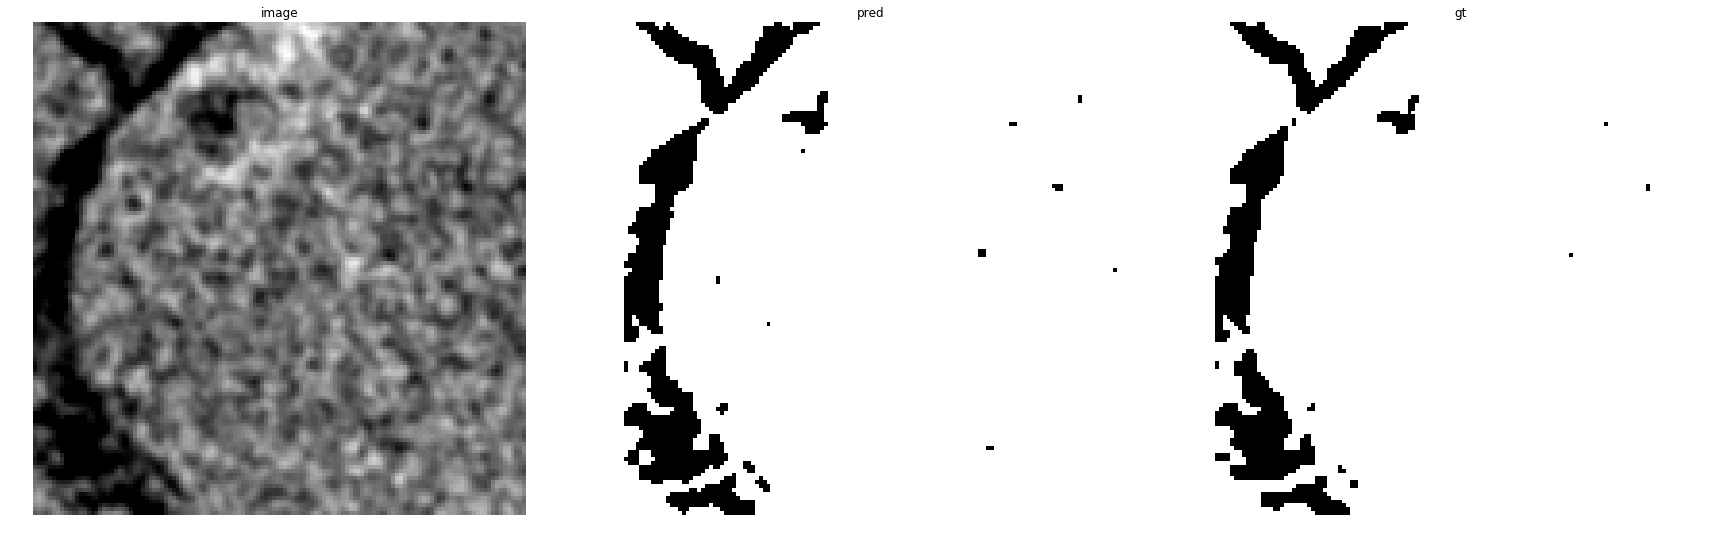

accuracy    : 0.989013671875
precision   : 0.9991916470191984
recall      : 0.9888007466168922
f1          : 0.9939690410775314
pr_auc      : 0.9999642843130035
iou         : 0.9880103909944714


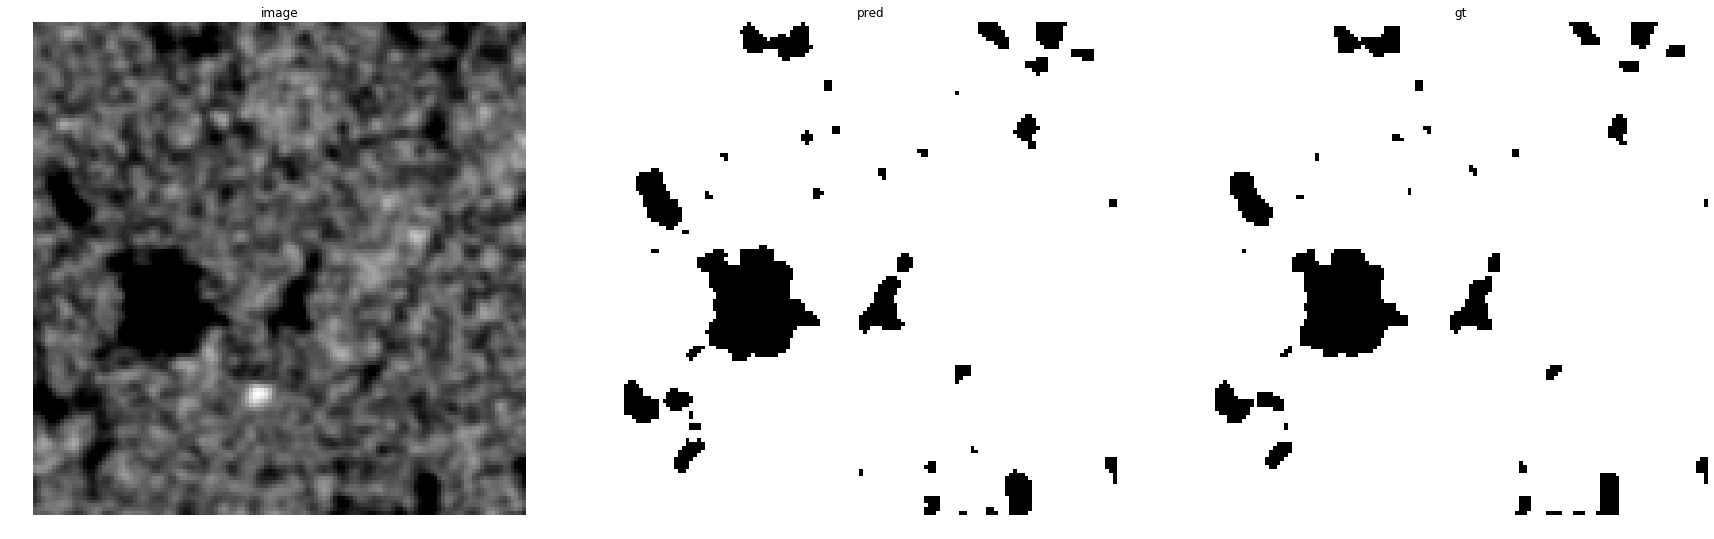

accuracy    : 0.98651123046875
precision   : 0.9987300314150124
recall      : 0.9866613840464871
f1          : 0.9926590267397443
pr_auc      : 0.999959843837914
iou         : 0.9854250478137572


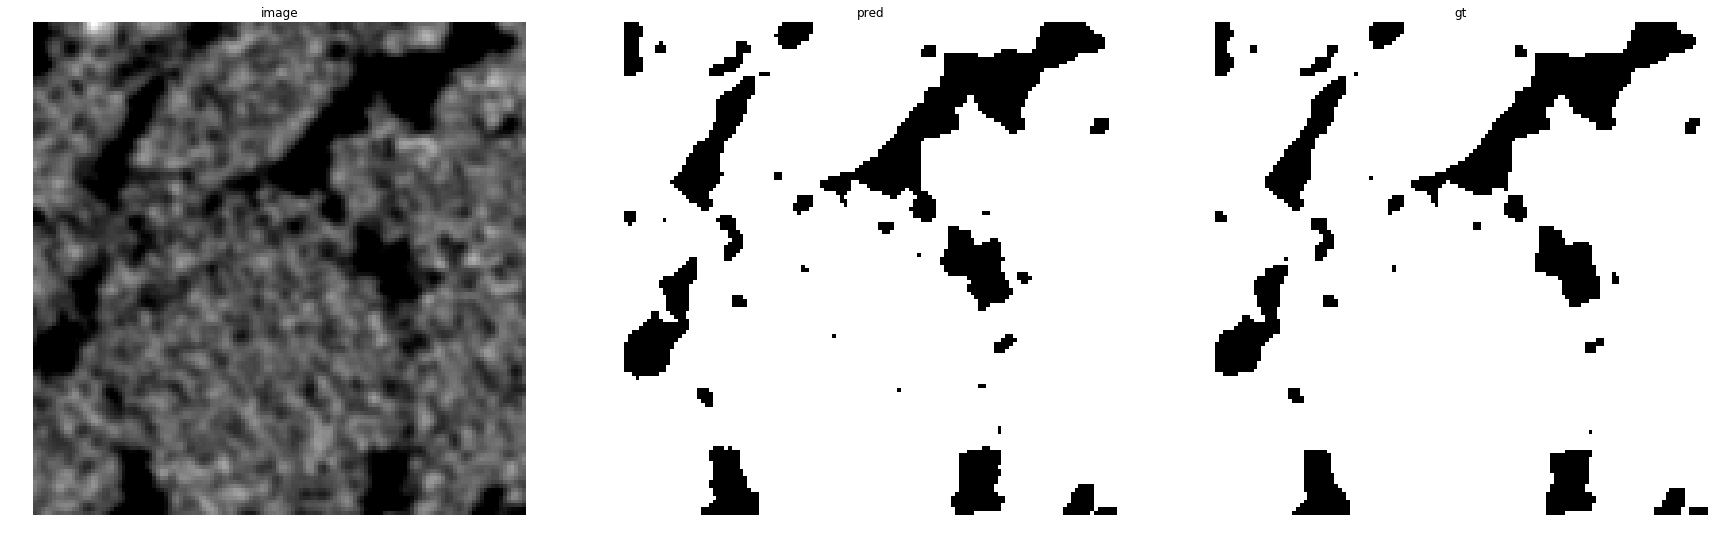

accuracy    : 0.98541259765625
precision   : 0.9992808342322905
recall      : 0.9837864627584254
f1          : 0.9914731171286882
pr_auc      : 0.9999297623519988
iou         : 0.9830904202631952


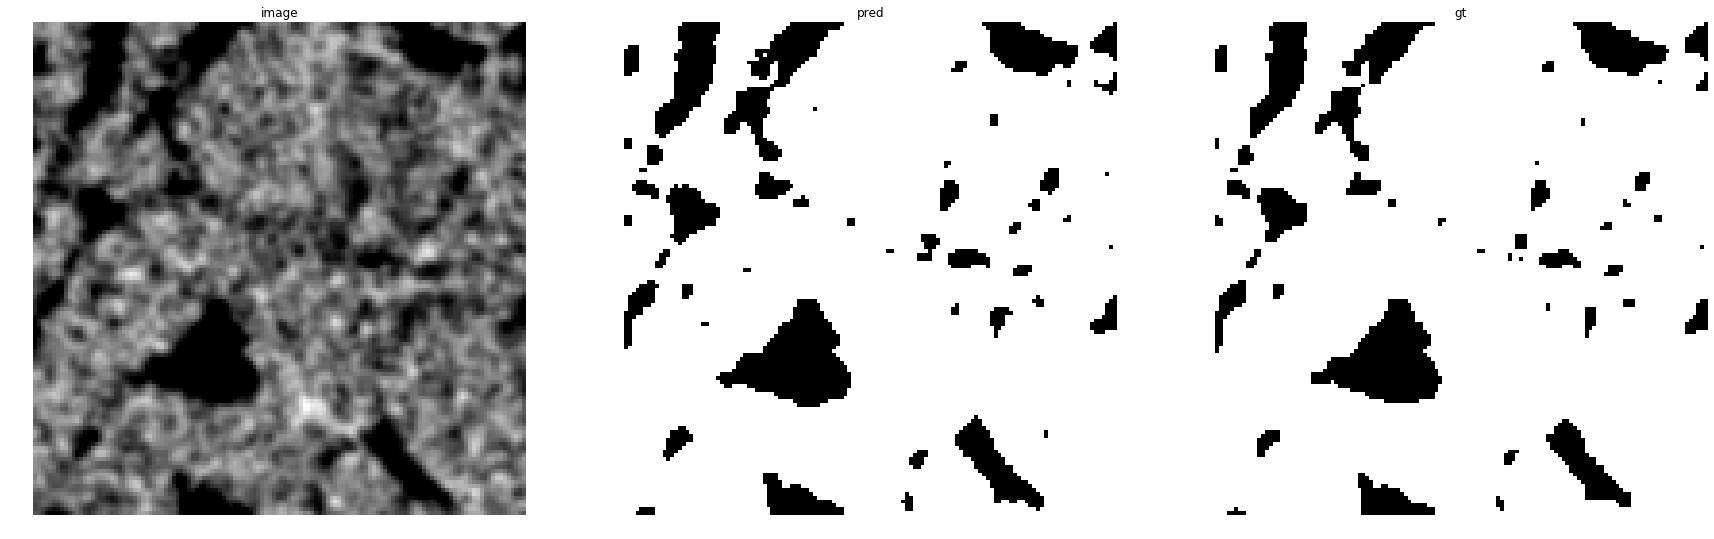

accuracy    : 0.982421875
precision   : 0.9994270982526496
recall      : 0.9803315538072492
f1          : 0.9897872340425532
pr_auc      : 0.9999181426327584
iou         : 0.9797809604043808


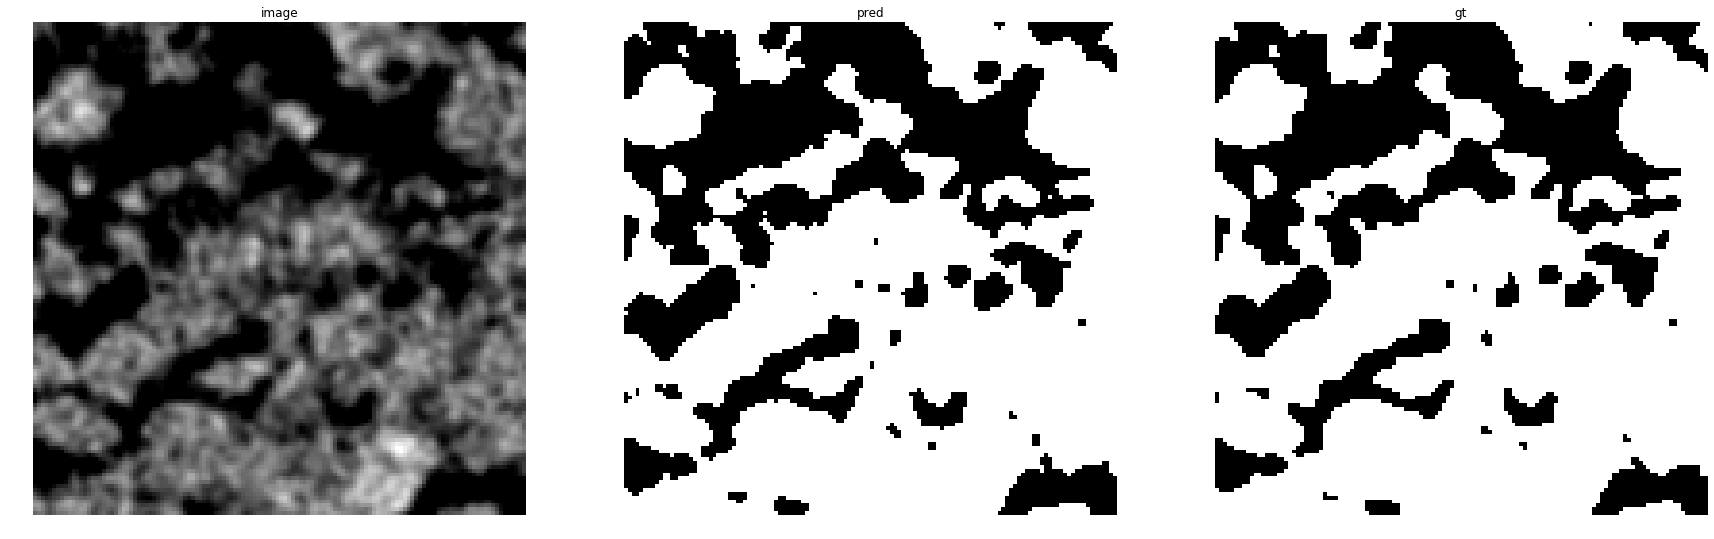

accuracy    : 0.97503662109375
precision   : 0.9969526711741739
recall      : 0.9652406417112299
f1          : 0.9808403991193141
pr_auc      : 0.9995416309291629
iou         : 0.962401176686891


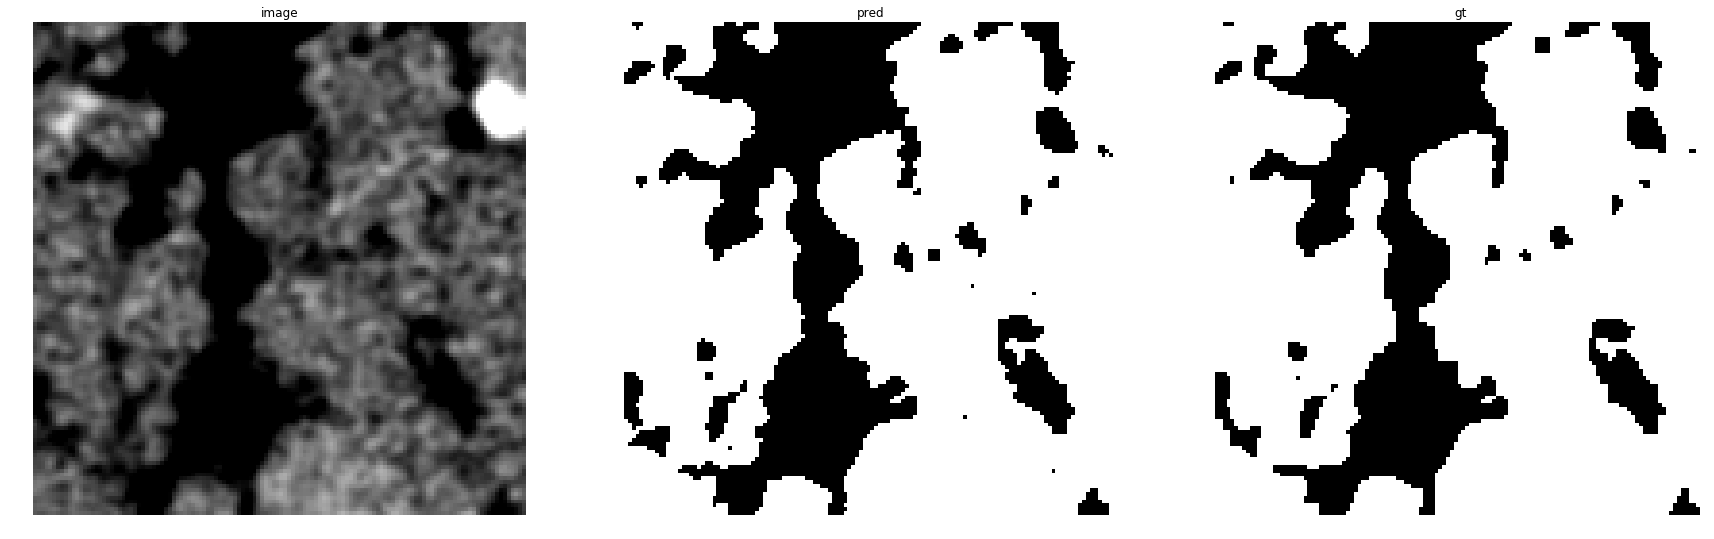

accuracy    : 0.9825439453125
precision   : 0.9980370401980029
recall      : 0.978004516182989
f1          : 0.9879192362929796
pr_auc      : 0.9998076693159047
iou         : 0.976126878130217


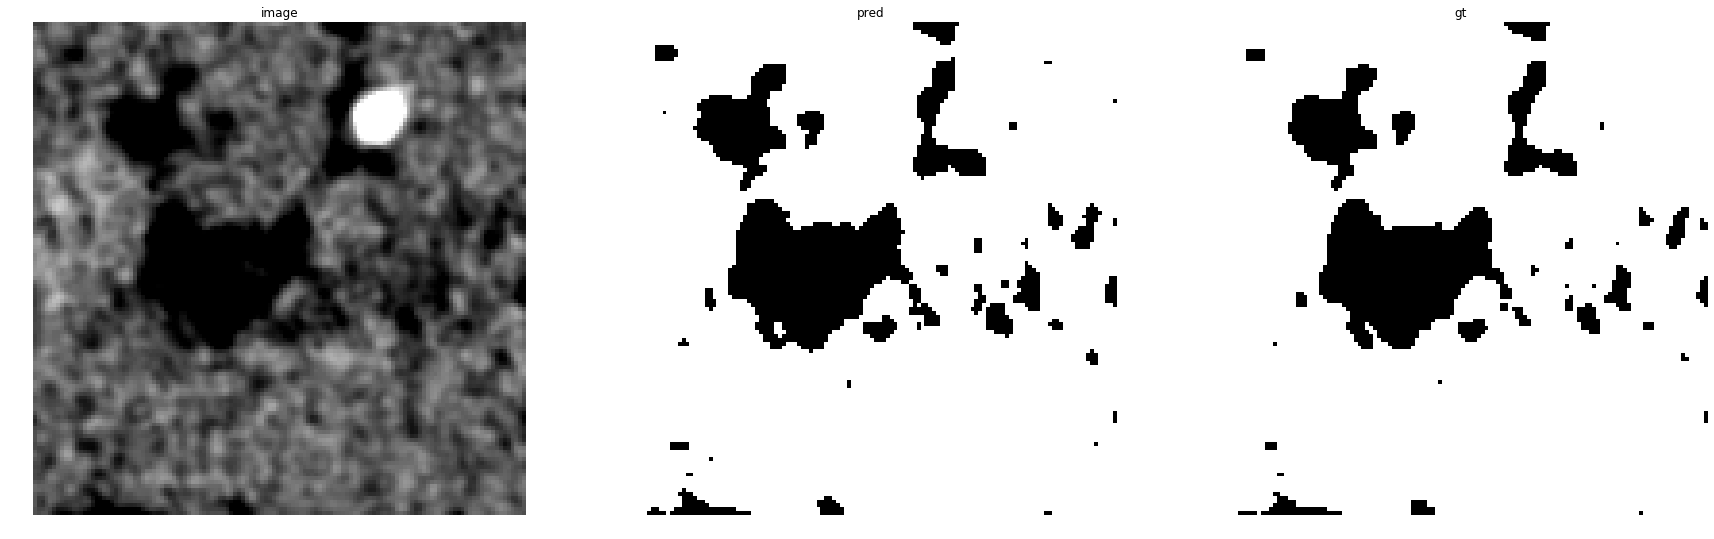

accuracy    : 0.98443603515625
precision   : 0.9985681557846506
recall      : 0.9834308679404922
f1          : 0.9909417072217683
pr_auc      : 0.9999169285464221
iou         : 0.9820460466098712


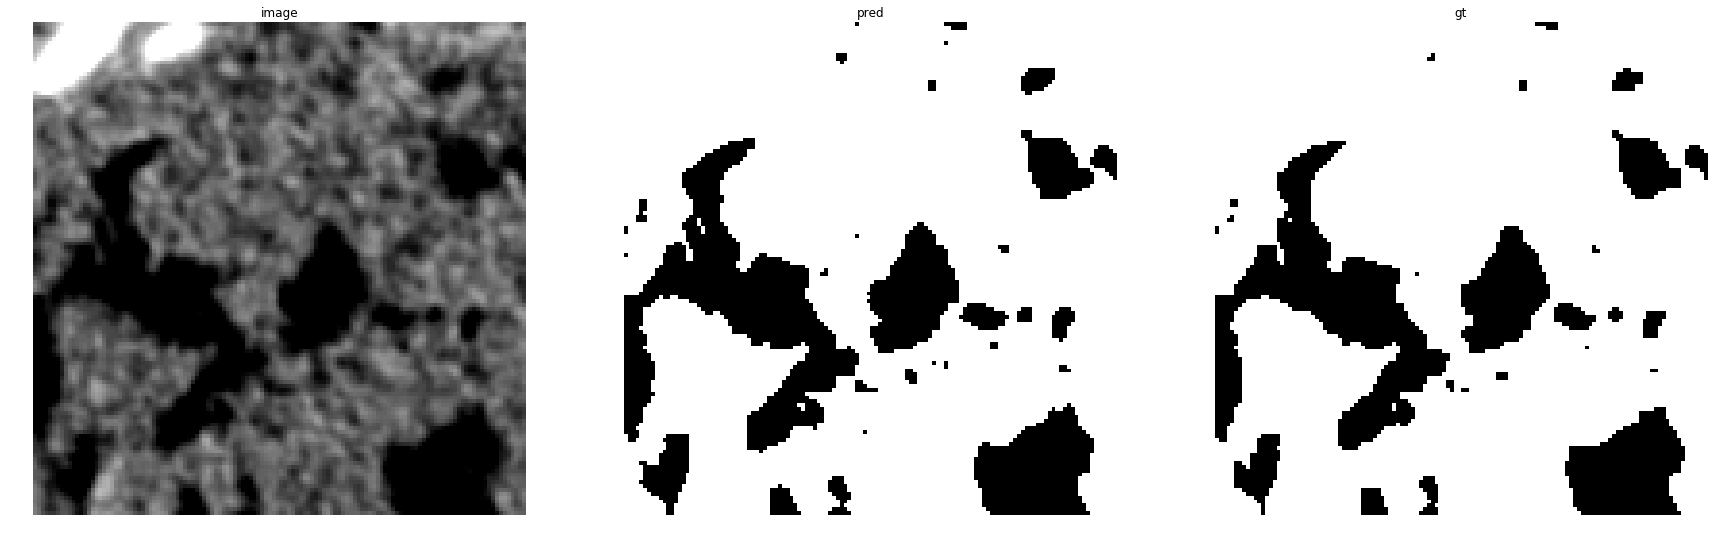

accuracy    : 0.98541259765625
precision   : 0.998991231473578
recall      : 0.9827480916030534
f1          : 0.9908030938546197
pr_auc      : 0.9999165839316527
iou         : 0.9817738122473881


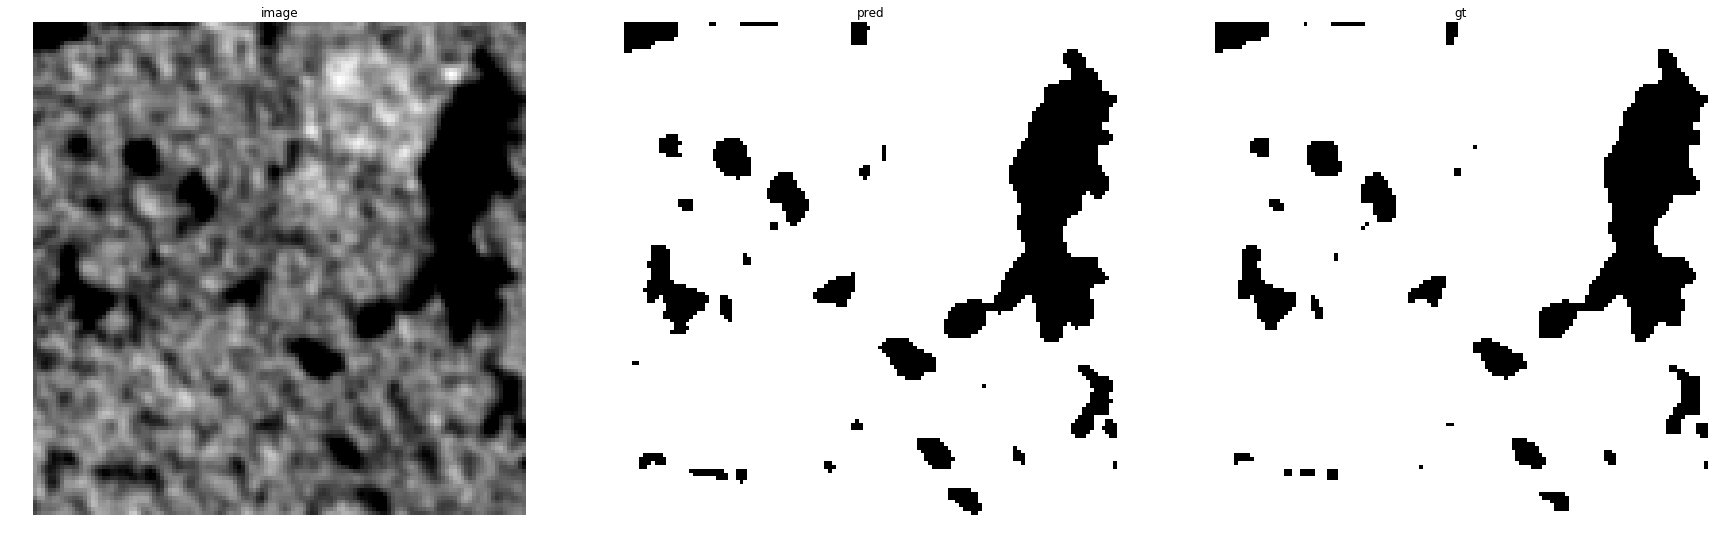

accuracy    : 0.984619140625
precision   : 0.9993572346807599
recall      : 0.9829305984827199
f1          : 0.9910758552305404
pr_auc      : 0.9999366088554159
iou         : 0.9823095823095823


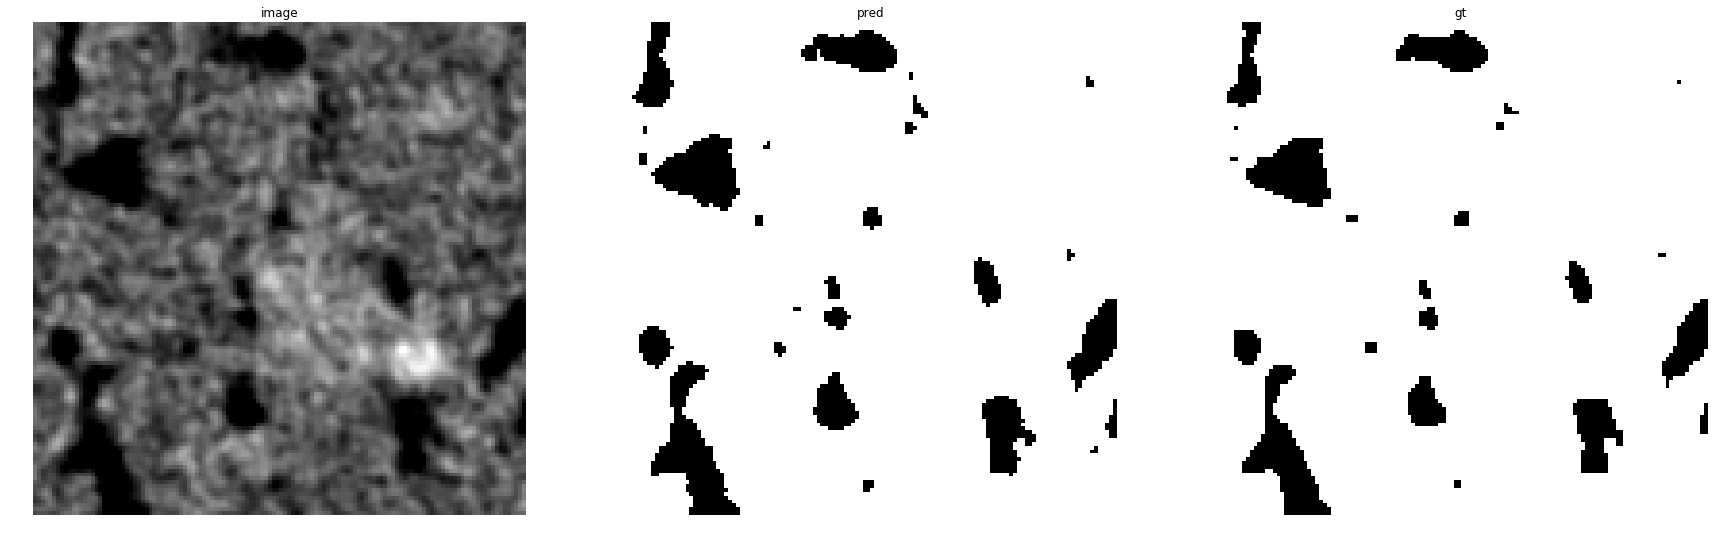

accuracy    : 0.9853515625
precision   : 0.9993200516760726
recall      : 0.9845916795069337
f1          : 0.9919011945738003
pr_auc      : 0.9999594055080369
iou         : 0.9839325165695922


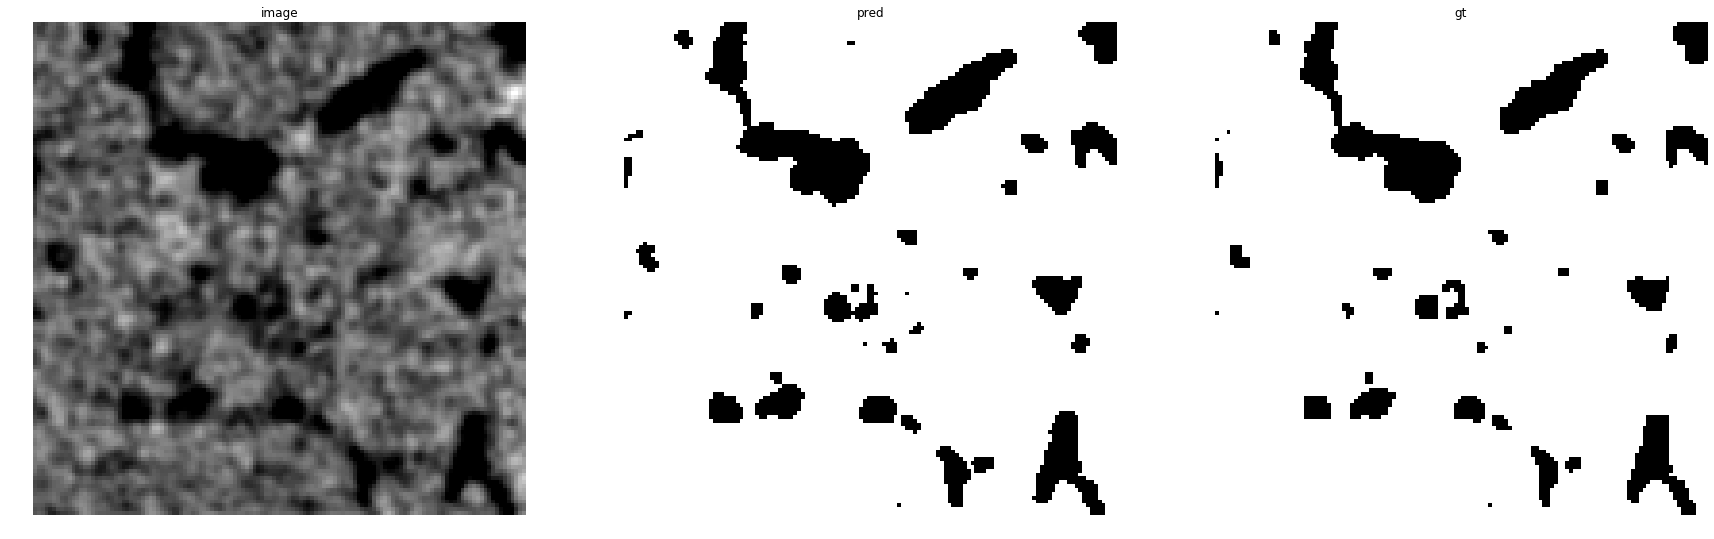

accuracy    : 0.9820556640625
precision   : 0.9990984118177405
recall      : 0.9808674337849799
f1          : 0.98989898989899
pr_auc      : 0.9999155835111053
iou         : 0.98


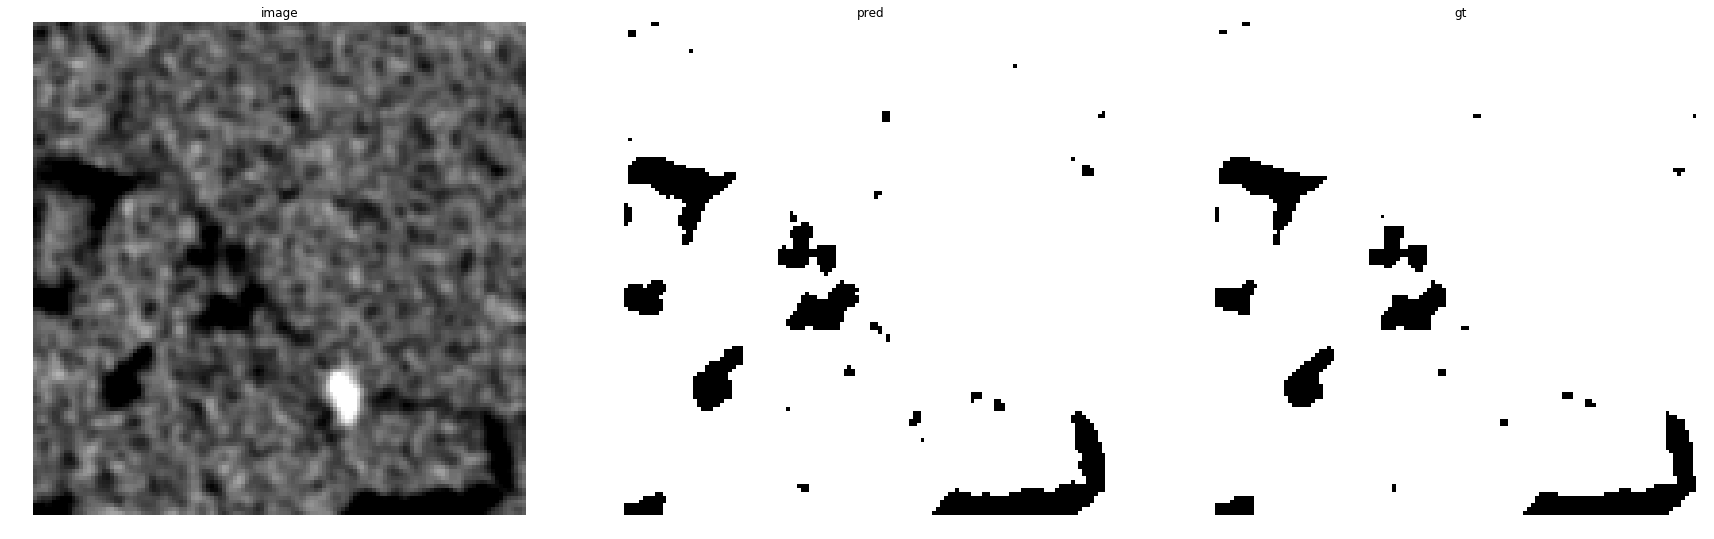

accuracy    : 0.990478515625
precision   : 0.9999341238471673
recall      : 0.9898917438372244
f1          : 0.9948875925804549
pr_auc      : 0.999986791009583
iou         : 0.989827192696446


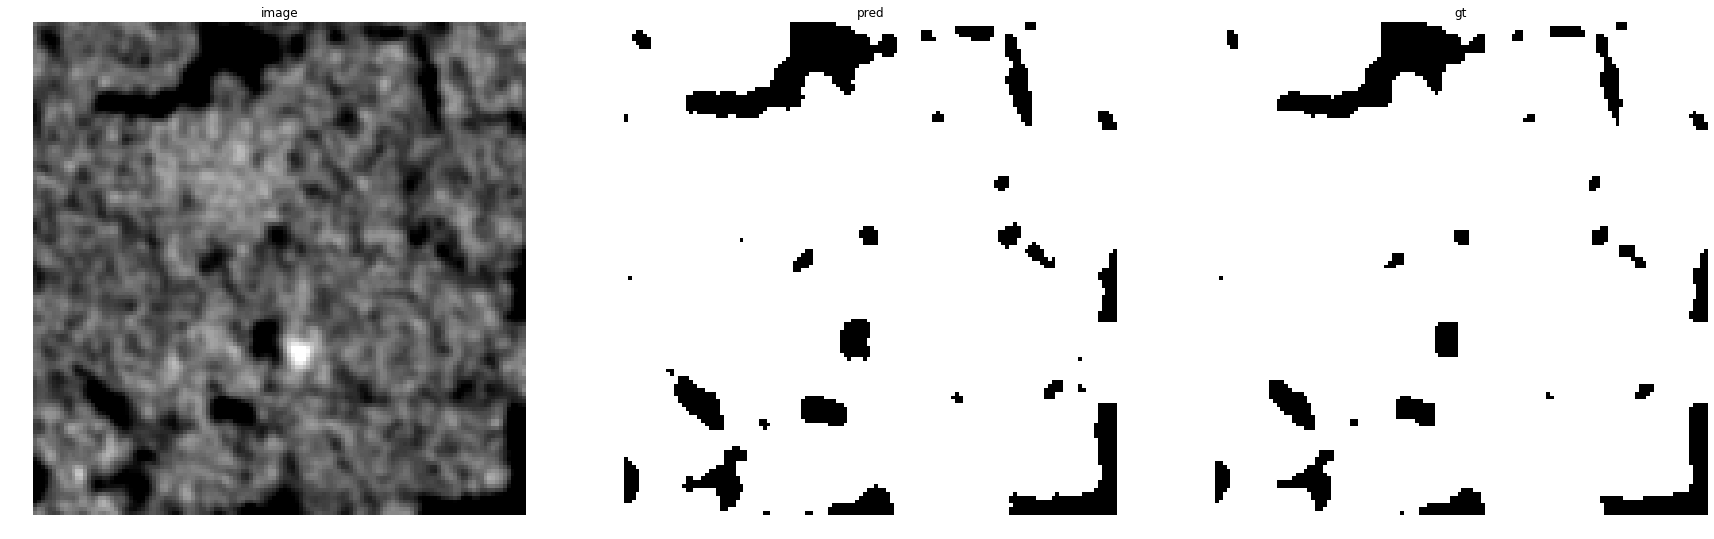

accuracy    : 0.9852294921875
precision   : 0.9997278911564625
recall      : 0.984063211463774
f1          : 0.9918337045285821
pr_auc      : 0.9999602072235186
iou         : 0.9837997054491899


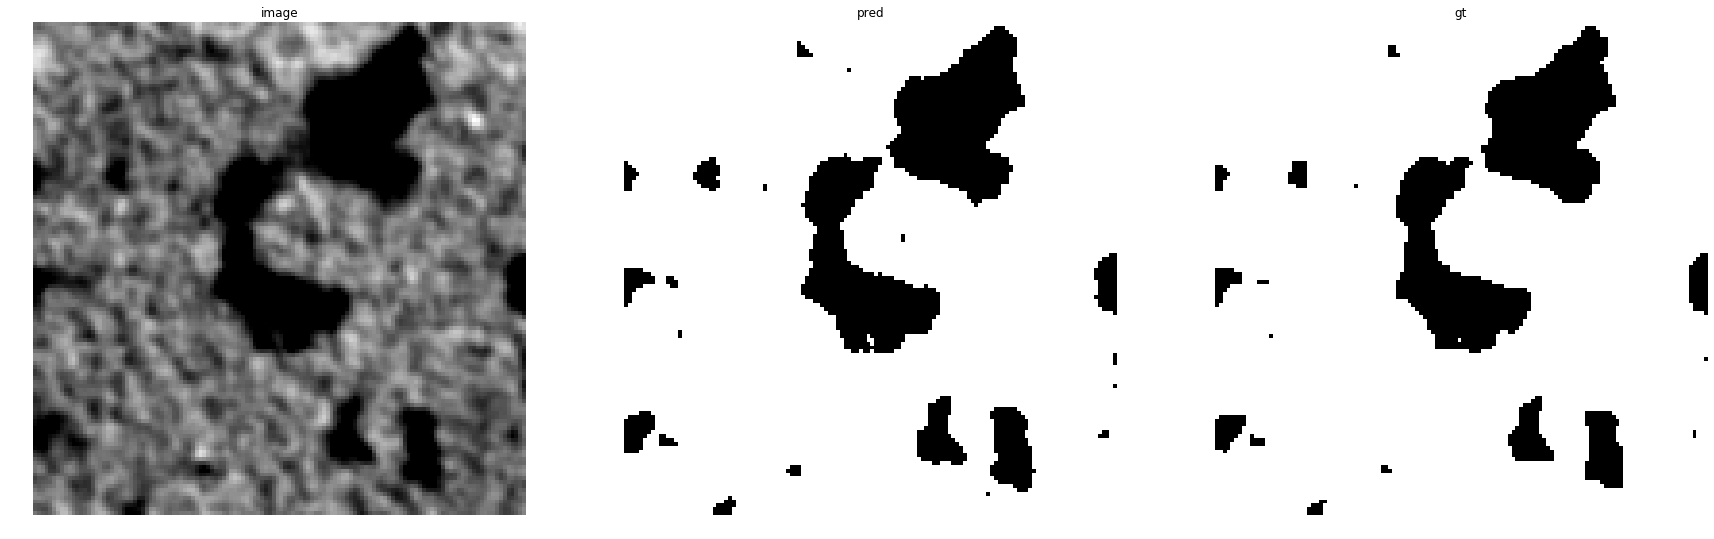

accuracy    : 0.98828125
precision   : 0.9990622520377984
recall      : 0.9872407156604177
f1          : 0.9931163057507529
pr_auc      : 0.9999512754037398
iou         : 0.9863267340834639


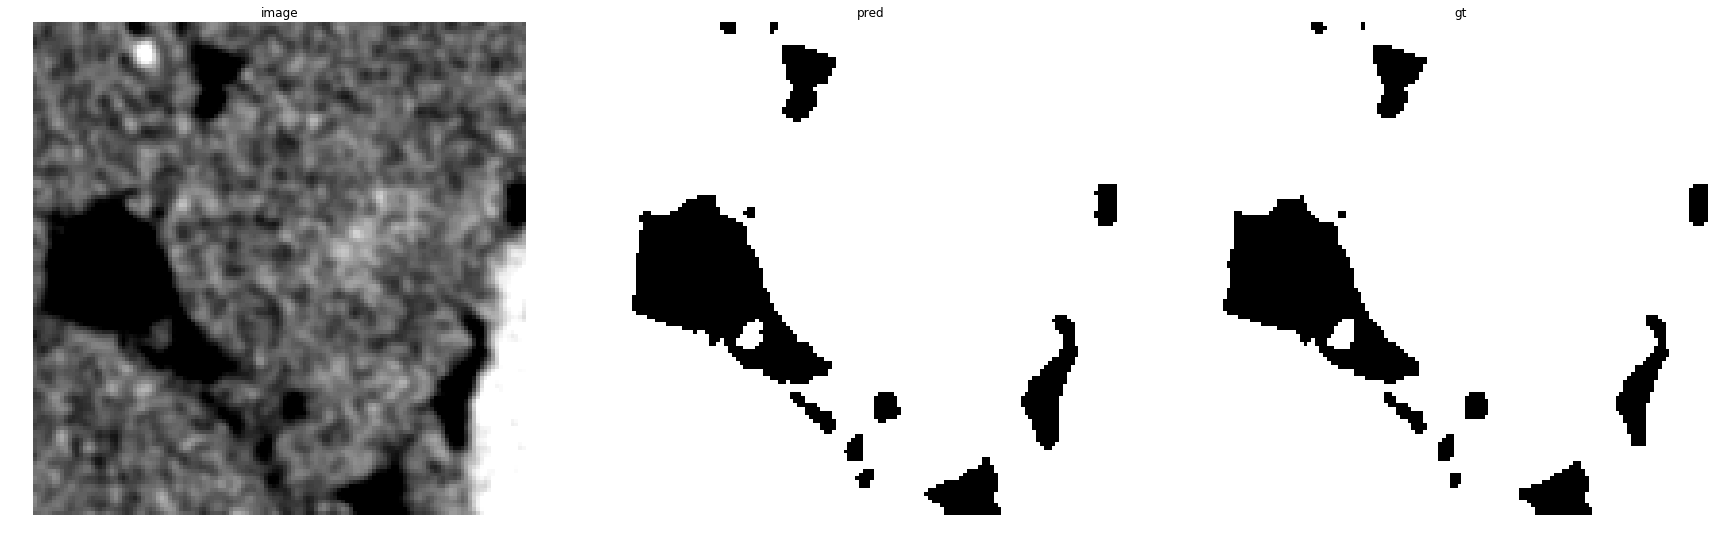

accuracy    : 0.99102783203125
precision   : 1.0
recall      : 0.9898592715231788
f1          : 0.9949037961518461
pr_auc      : 0.9999849853780457
iou         : 0.9898592715231788


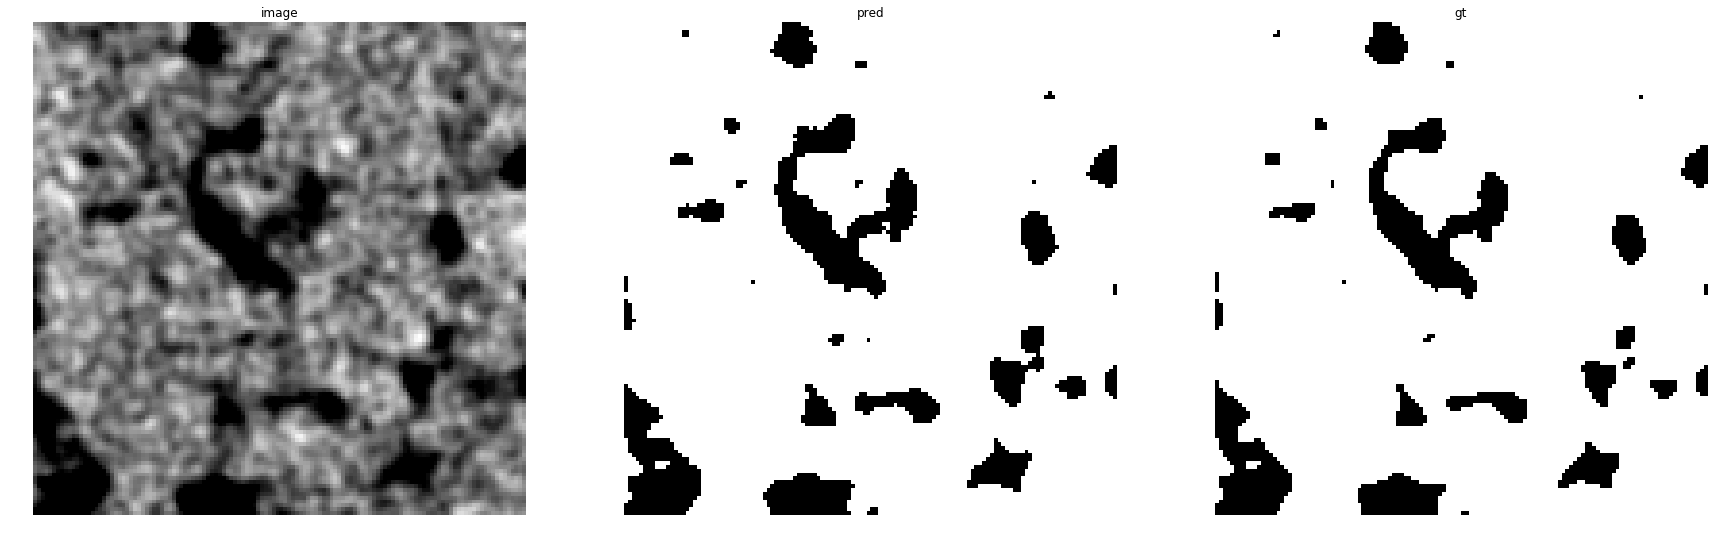

accuracy    : 0.9844970703125
precision   : 0.9990873350182533
recall      : 0.9833471531232725
f1          : 0.9911547569299345
pr_auc      : 0.9999368685563662
iou         : 0.9824646185709355


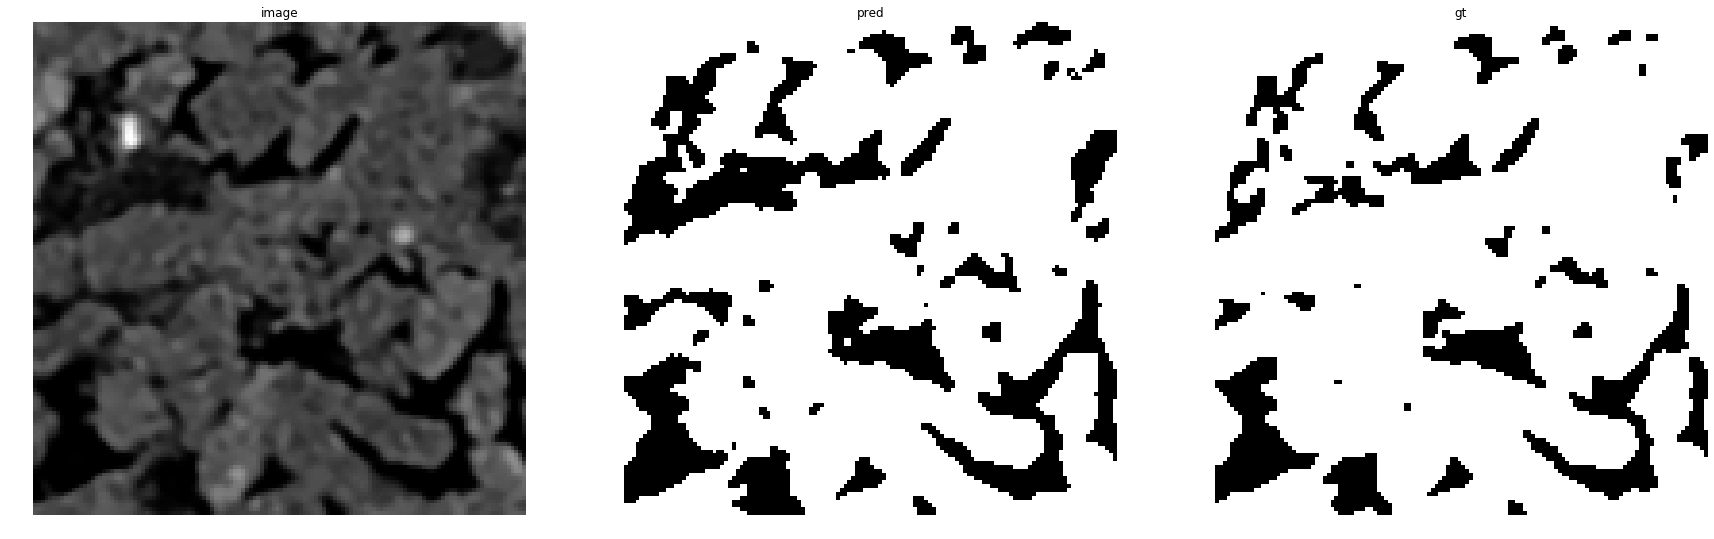

accuracy    : 0.9259033203125
precision   : 1.0
recall      : 0.9110166385692297
f1          : 0.9534366370052164
pr_auc      : 0.9993669255047203
iou         : 0.9110166385692297


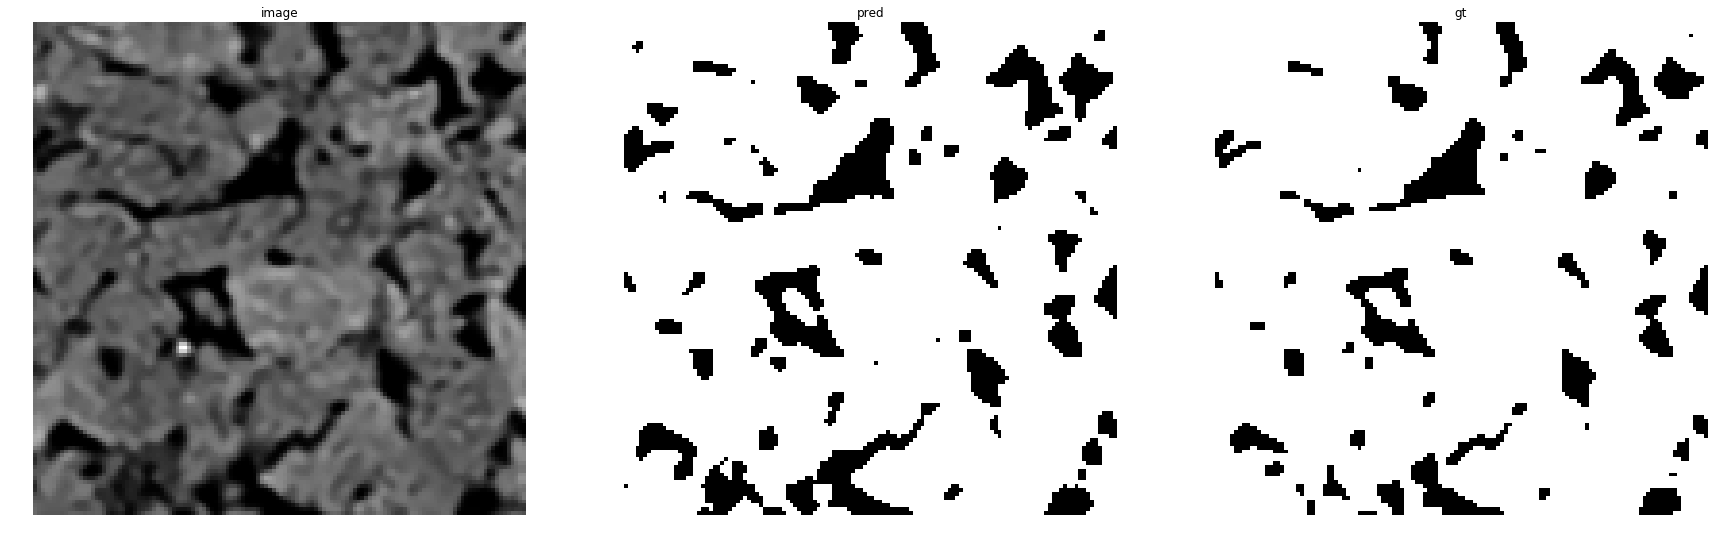

accuracy    : 0.9525146484375
precision   : 1.0
recall      : 0.9461069548351344
f1          : 0.9723072542179825
pr_auc      : 0.999831498819836
iou         : 0.9461069548351344


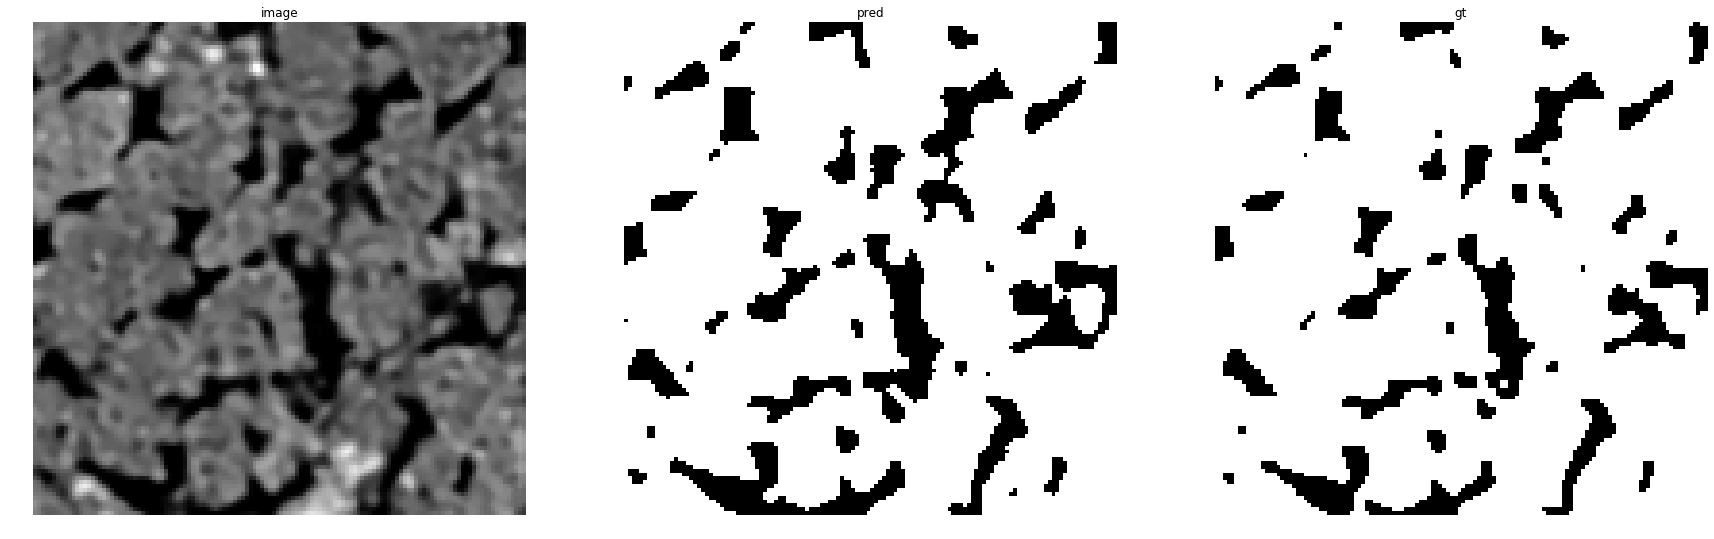

accuracy    : 0.9609375
precision   : 1.0
recall      : 0.9542922439651479
f1          : 0.9766116064902793
pr_auc      : 0.9998801441233762
iou         : 0.9542922439651479


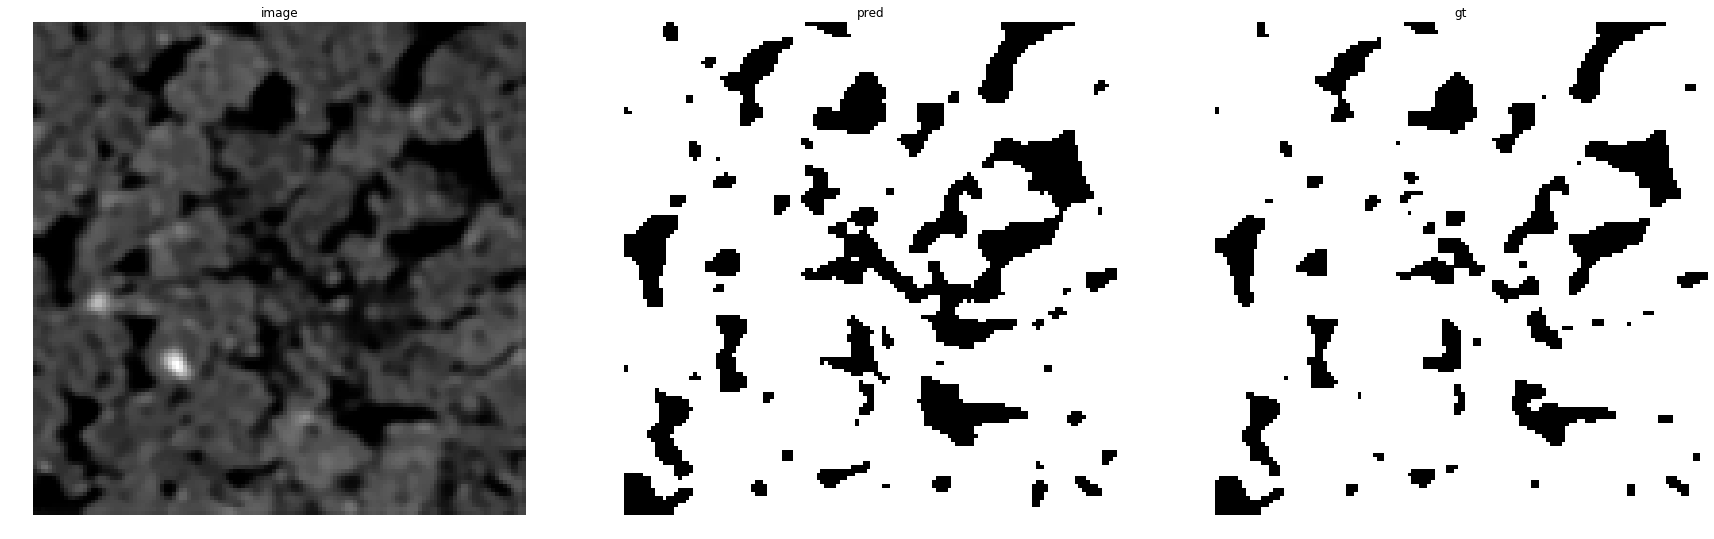

accuracy    : 0.9456787109375
precision   : 1.0
recall      : 0.9368211826506708
f1          : 0.967380149538191
pr_auc      : 0.9996943415222243
iou         : 0.9368211826506708


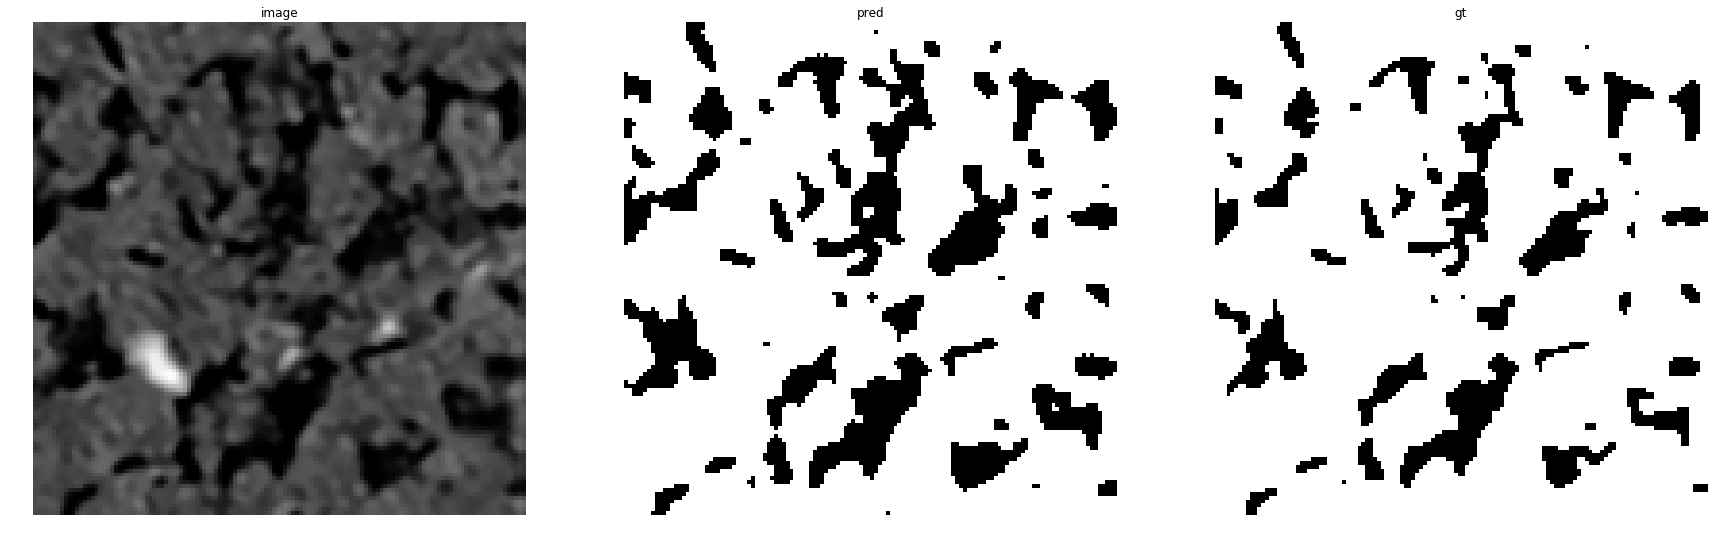

accuracy    : 0.94195556640625
precision   : 1.0
recall      : 0.9312414142144458
f1          : 0.9643966905020404
pr_auc      : 0.9997455680469169
iou         : 0.9312414142144458


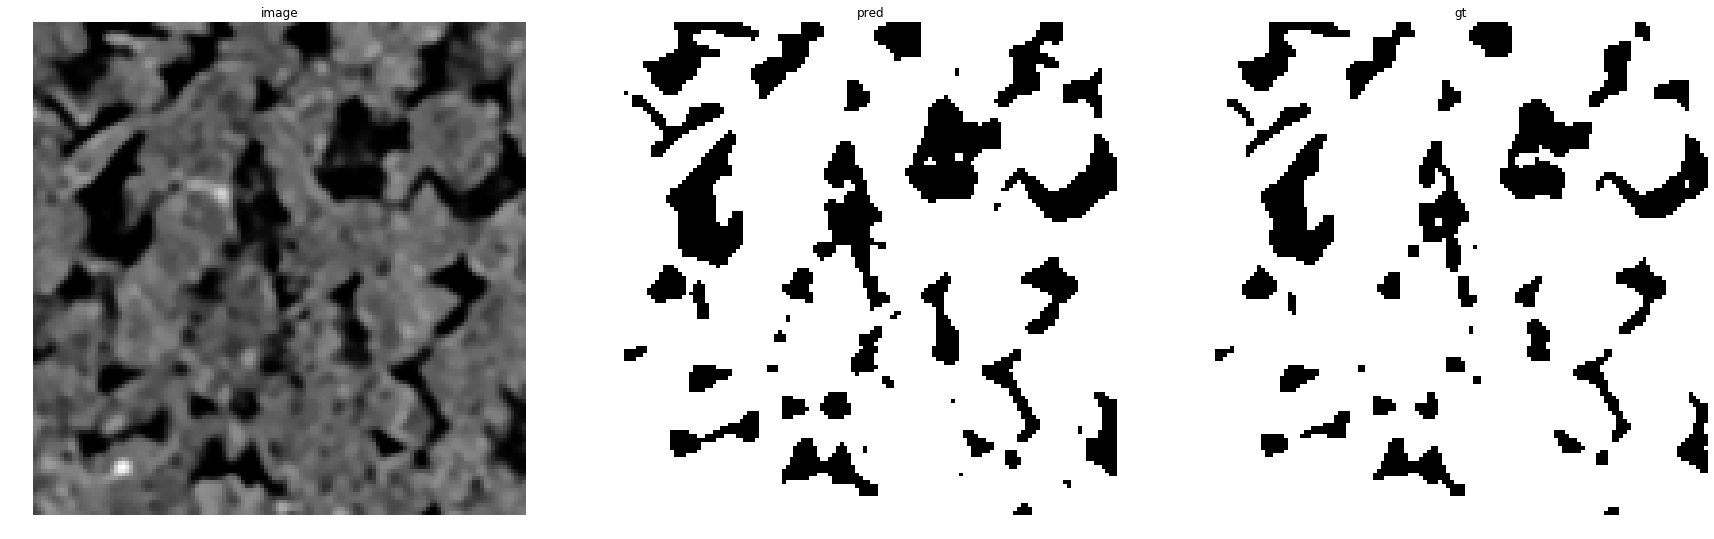

accuracy    : 0.95458984375
precision   : 1.0
recall      : 0.9458120903131828
f1          : 0.9721515196885762
pr_auc      : 0.9997898683205511
iou         : 0.9458120903131828


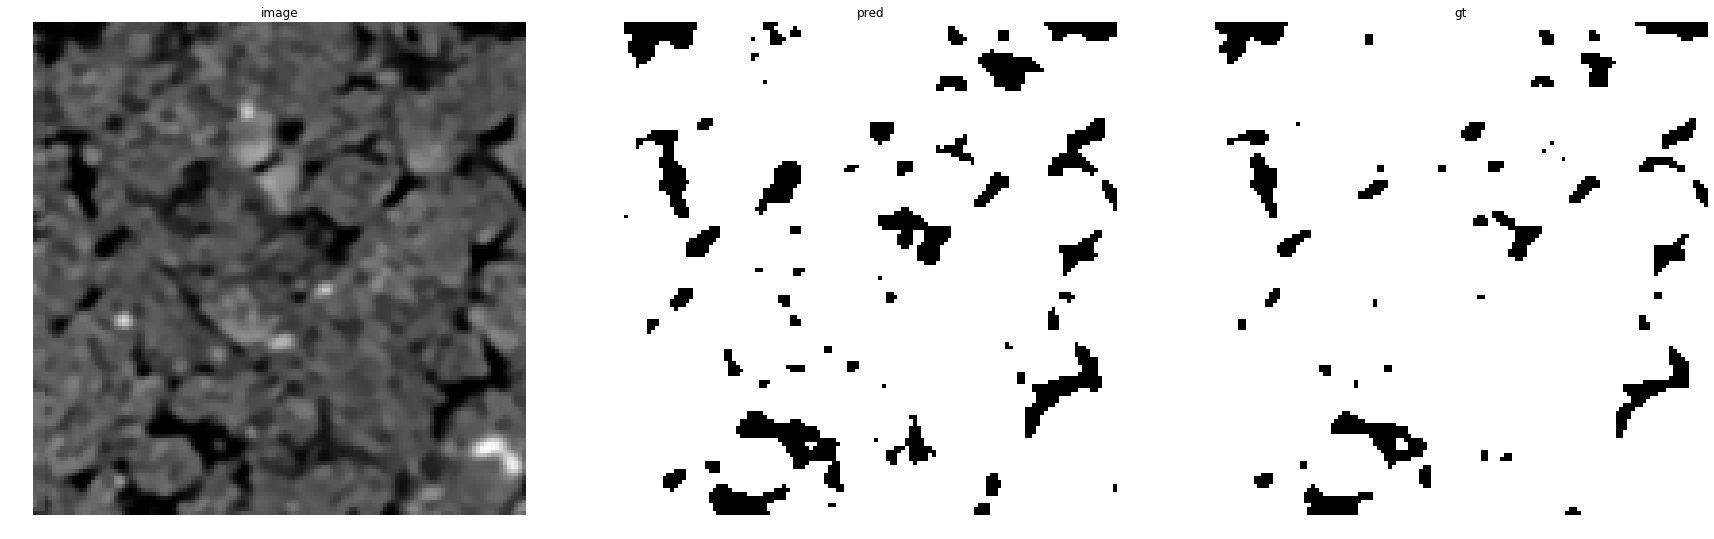

accuracy    : 0.95904541015625
precision   : 1.0
recall      : 0.955921960191815
f1          : 0.9774643157010915
pr_auc      : 0.9999022978080725
iou         : 0.955921960191815


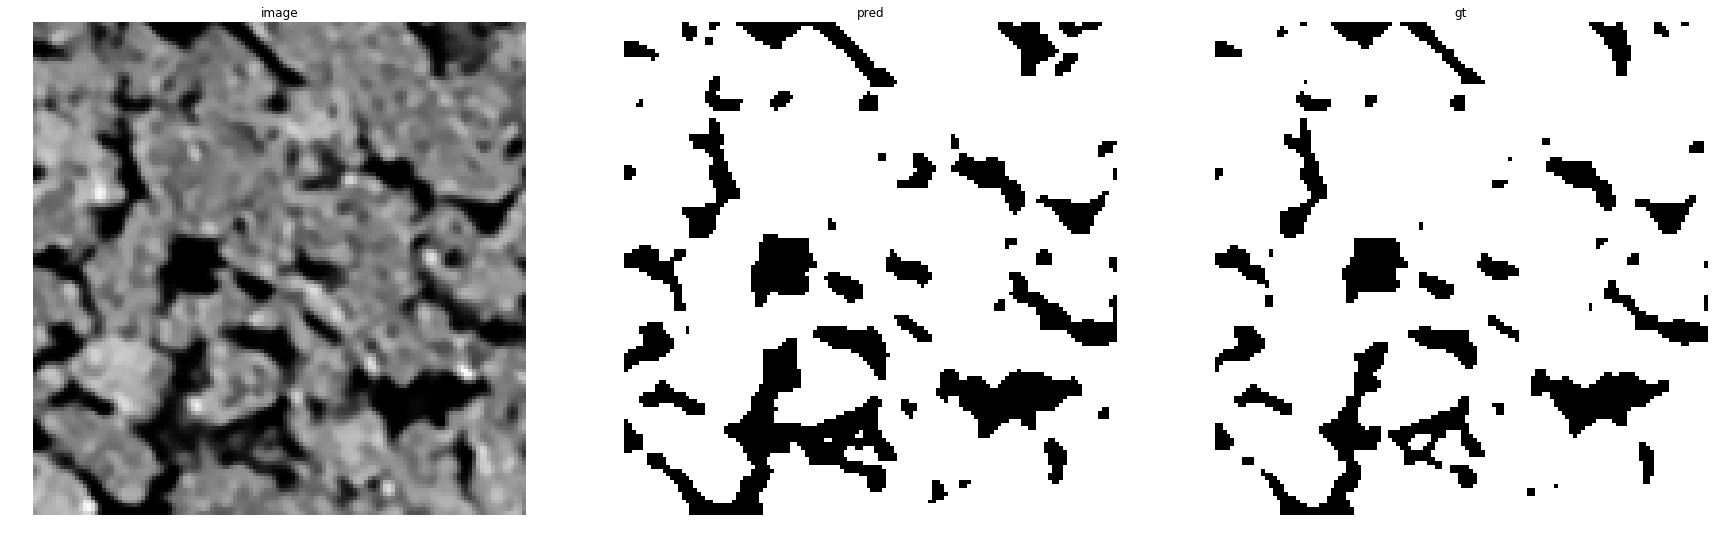

accuracy    : 0.947998046875
precision   : 1.0
recall      : 0.9391645840771153
f1          : 0.9686280285735326
pr_auc      : 0.9998161665653562
iou         : 0.9391645840771153


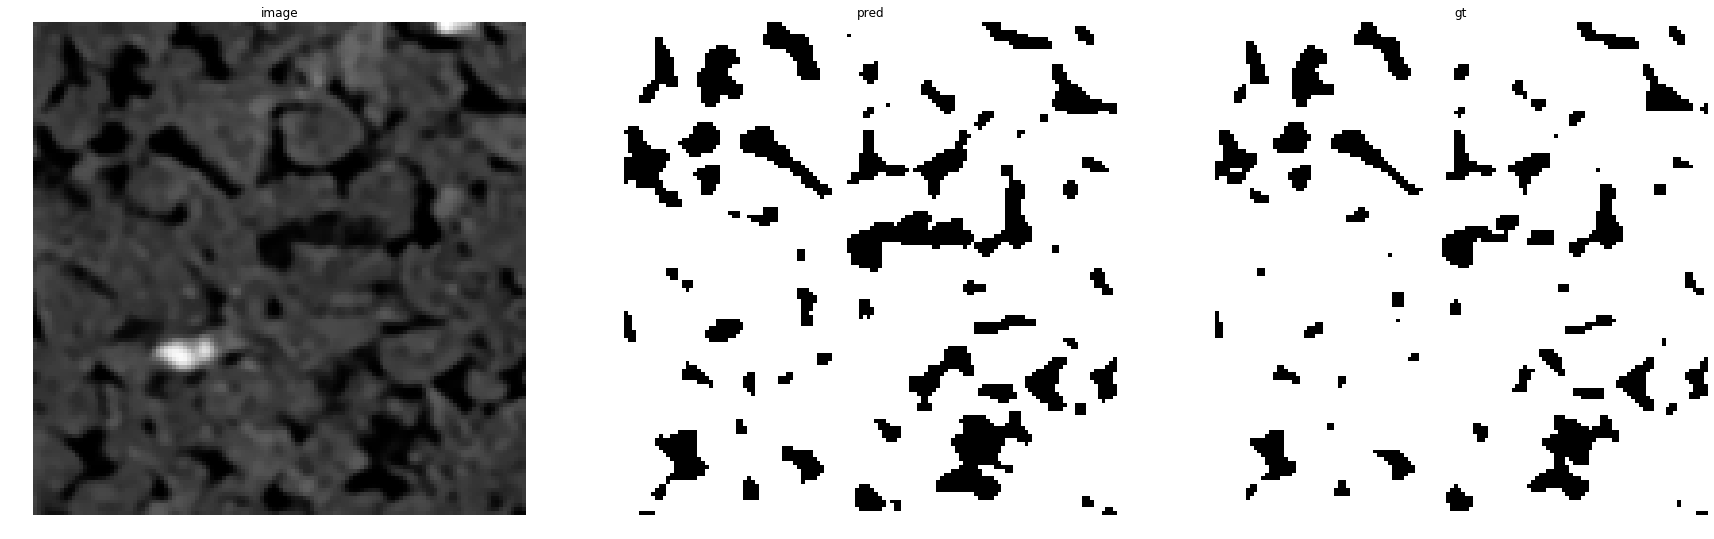

accuracy    : 0.9498291015625
precision   : 1.0
recall      : 0.9432281234891913
f1          : 0.9707847597384134
pr_auc      : 0.9998491522697739
iou         : 0.9432281234891913


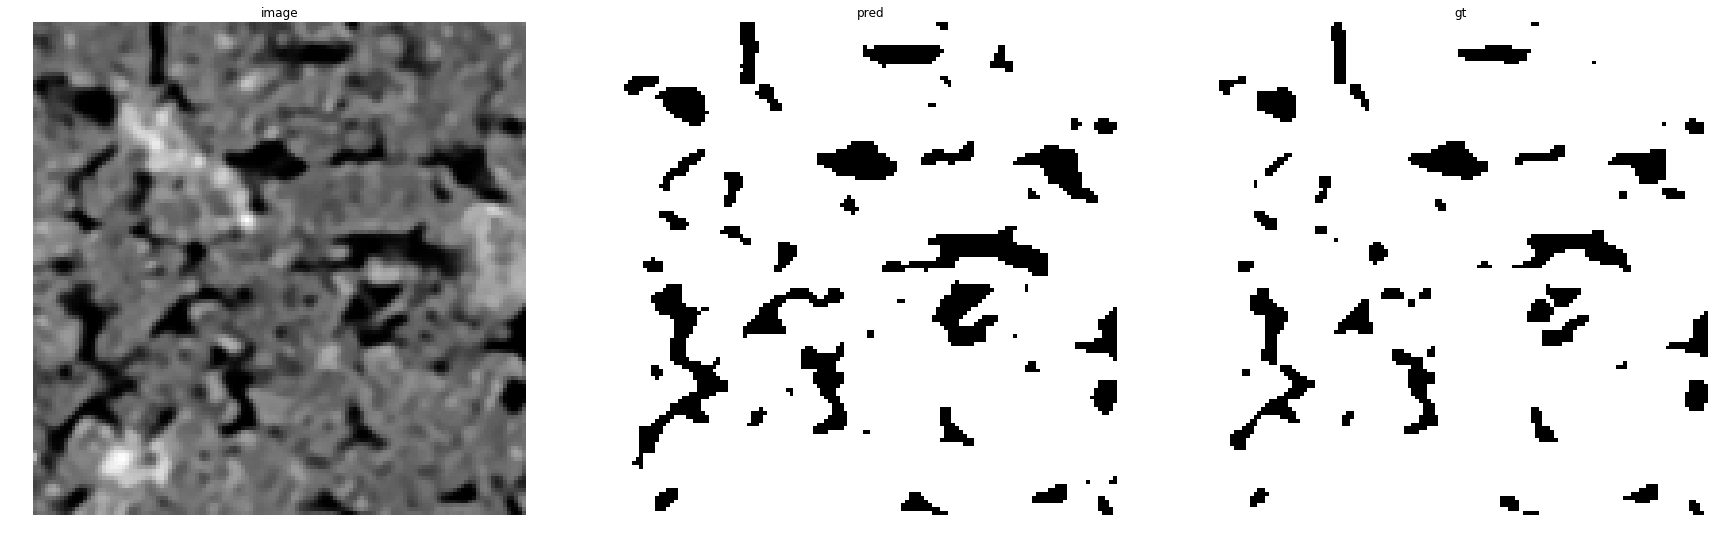

accuracy    : 0.9617919921875
precision   : 1.0
recall      : 0.9579527135948415
f1          : 0.9785248713550599
pr_auc      : 0.9999065738535319
iou         : 0.9579527135948415


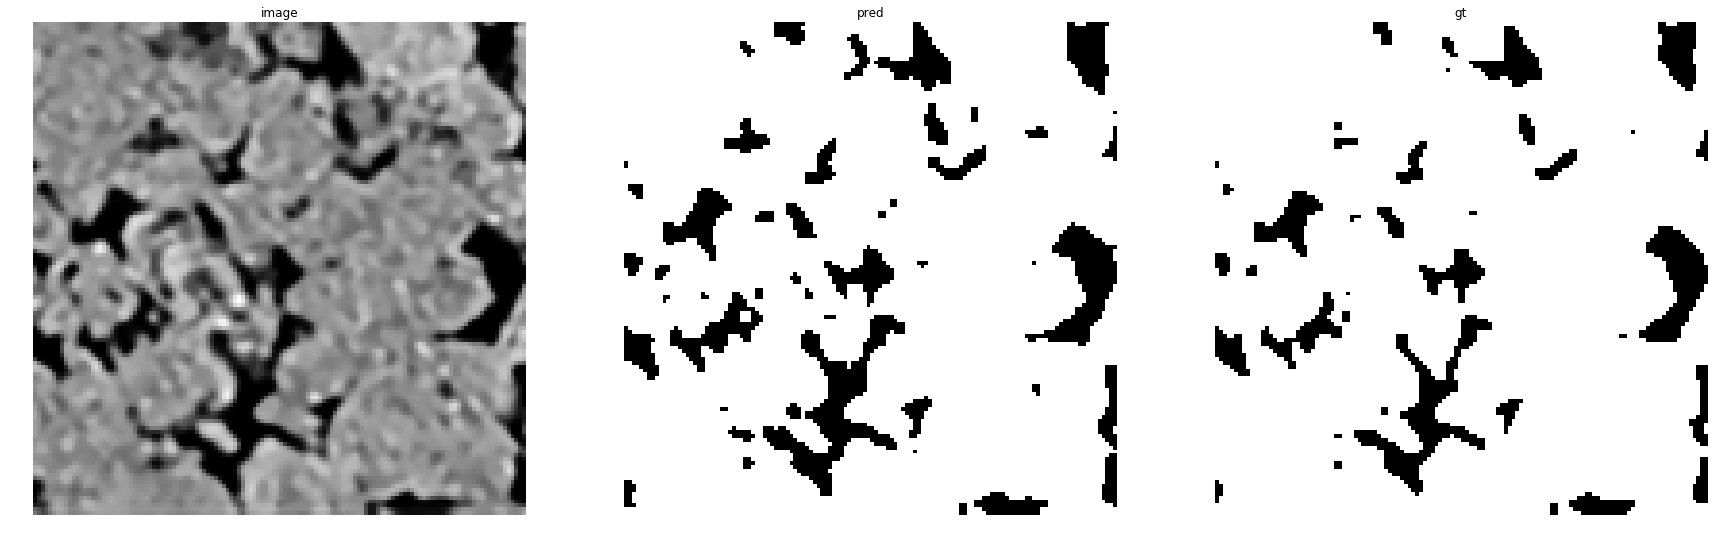

accuracy    : 0.96783447265625
precision   : 1.0
recall      : 0.9637974857456894
f1          : 0.981565047049358
pr_auc      : 0.999918506092198
iou         : 0.9637974857456894


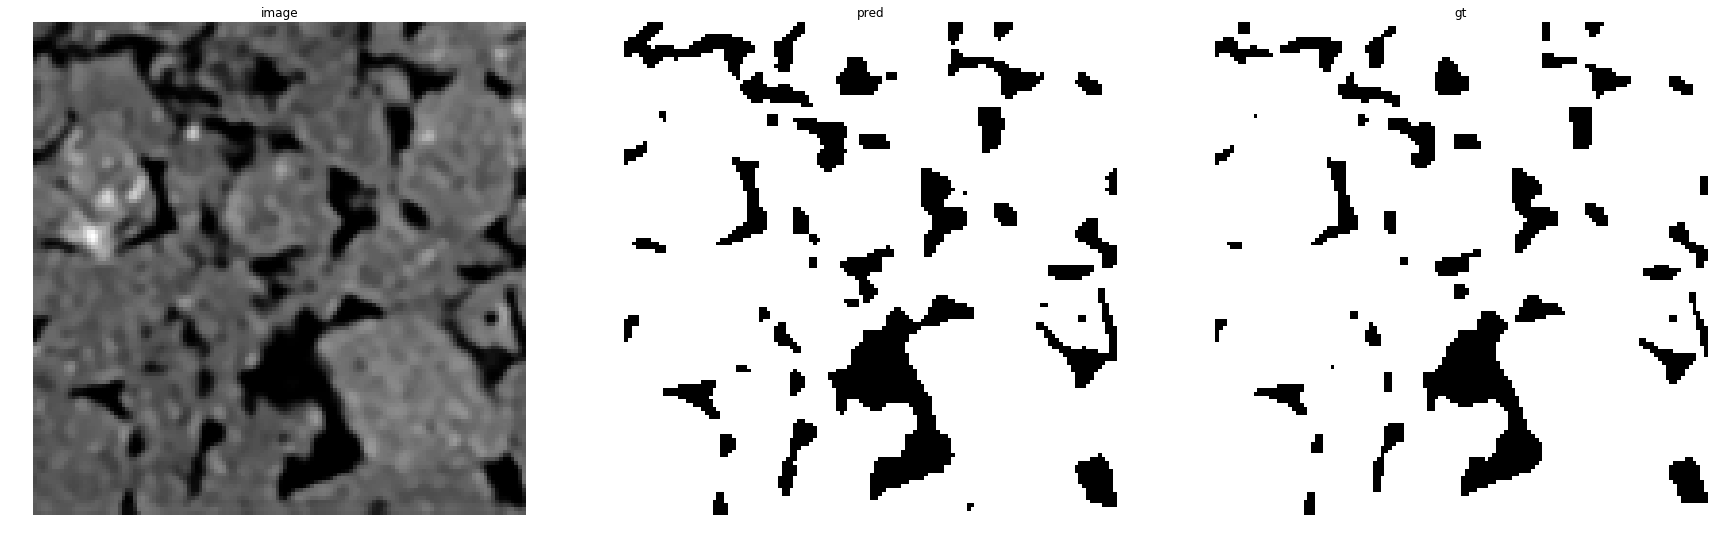

accuracy    : 0.96563720703125
precision   : 1.0
recall      : 0.9607774836282569
f1          : 0.9799964469710428
pr_auc      : 0.999875920190178
iou         : 0.9607774836282569


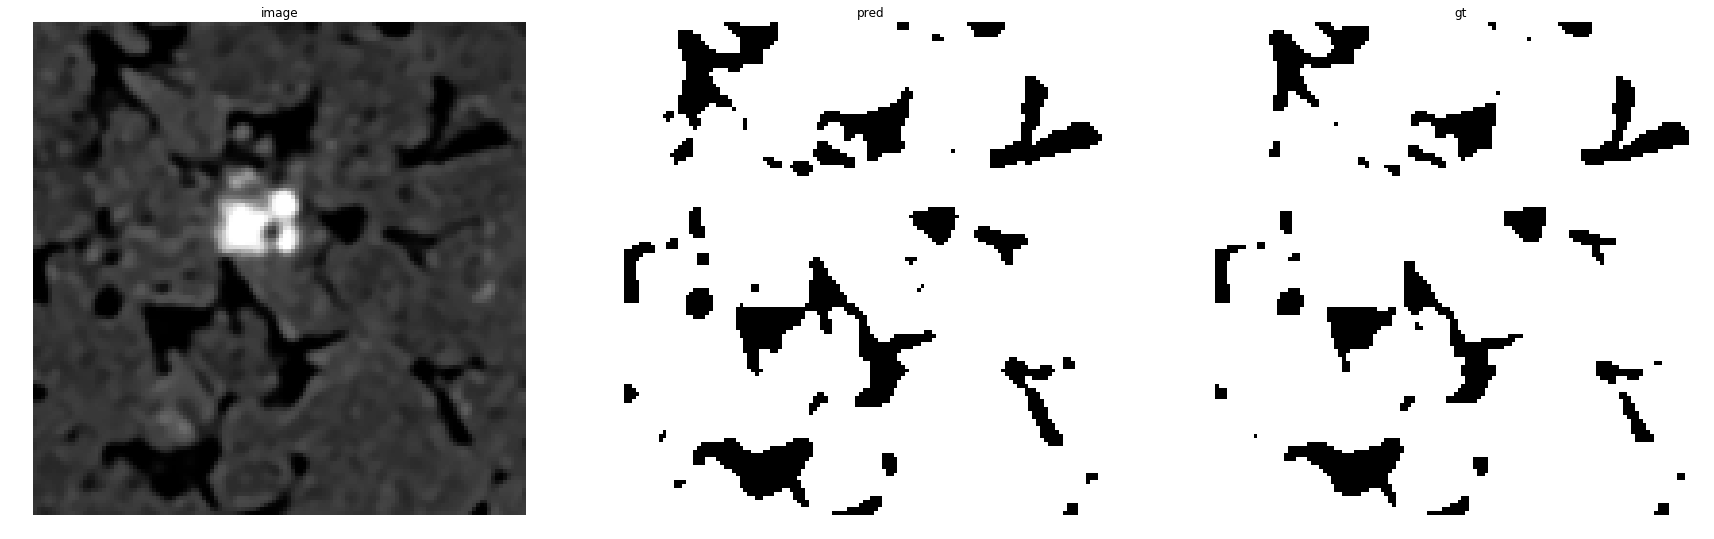

accuracy    : 0.9730224609375
precision   : 1.0
recall      : 0.9696844993141289
f1          : 0.9846089560554356
pr_auc      : 0.9999288461419873
iou         : 0.9696844993141289


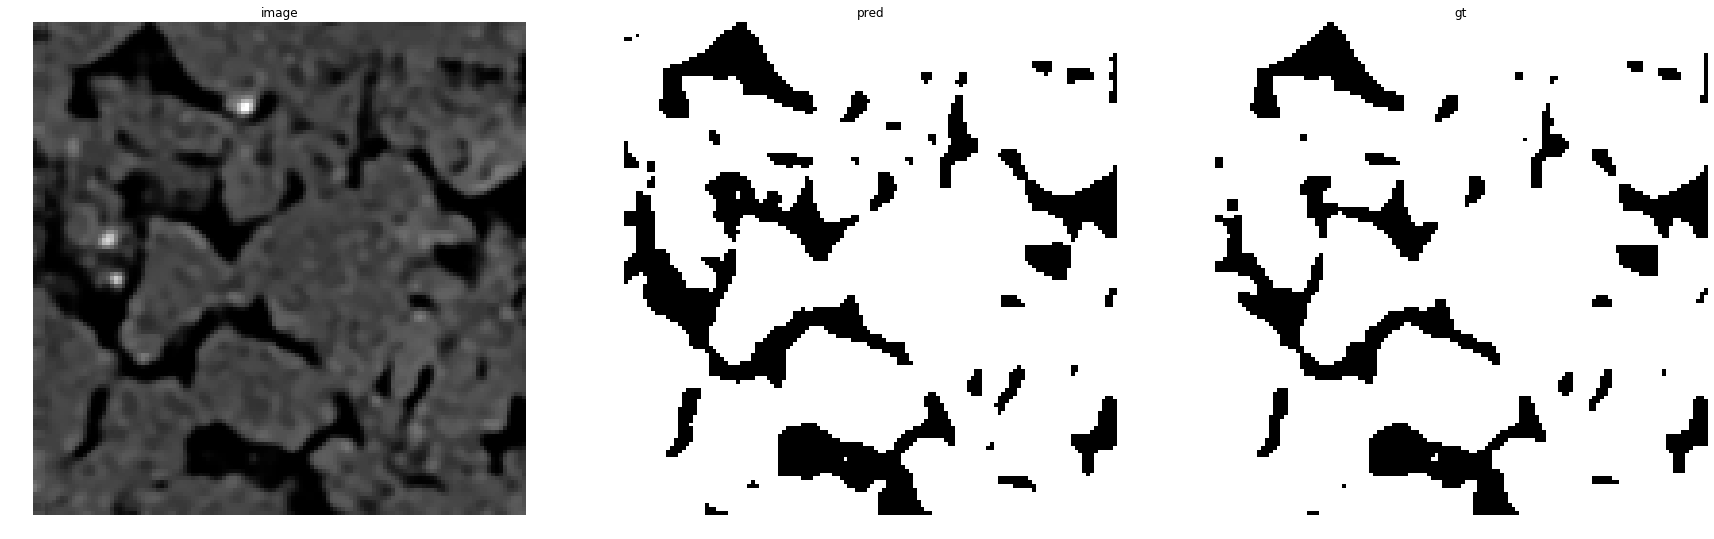

accuracy    : 0.96453857421875
precision   : 1.0
recall      : 0.9579625208016787
f1          : 0.9785299878053287
pr_auc      : 0.9998399212362508
iou         : 0.9579625208016787


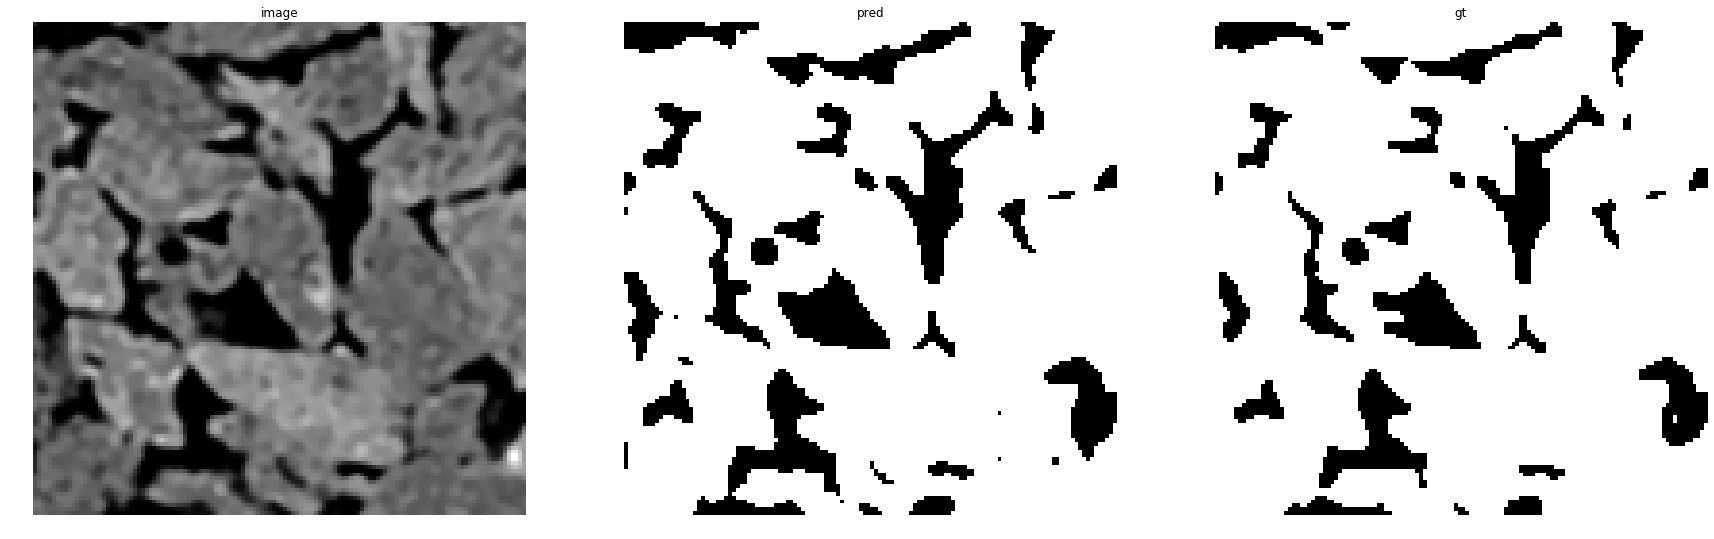

accuracy    : 0.9696044921875
precision   : 1.0
recall      : 0.9638973466724663
f1          : 0.9816168327796235
pr_auc      : 0.9998944220747887
iou         : 0.9638973466724663


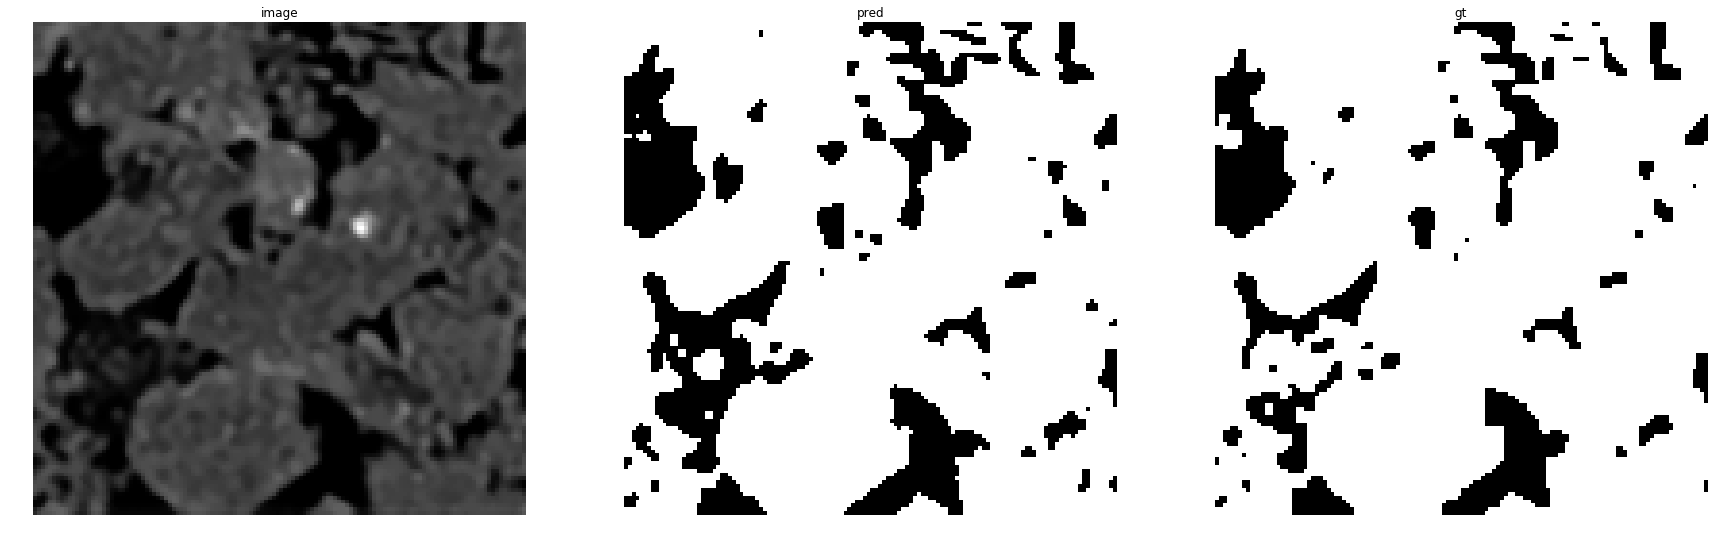

accuracy    : 0.94866943359375
precision   : 1.0
recall      : 0.938532378307265
f1          : 0.9682916713795573
pr_auc      : 0.9995908781867087
iou         : 0.938532378307265


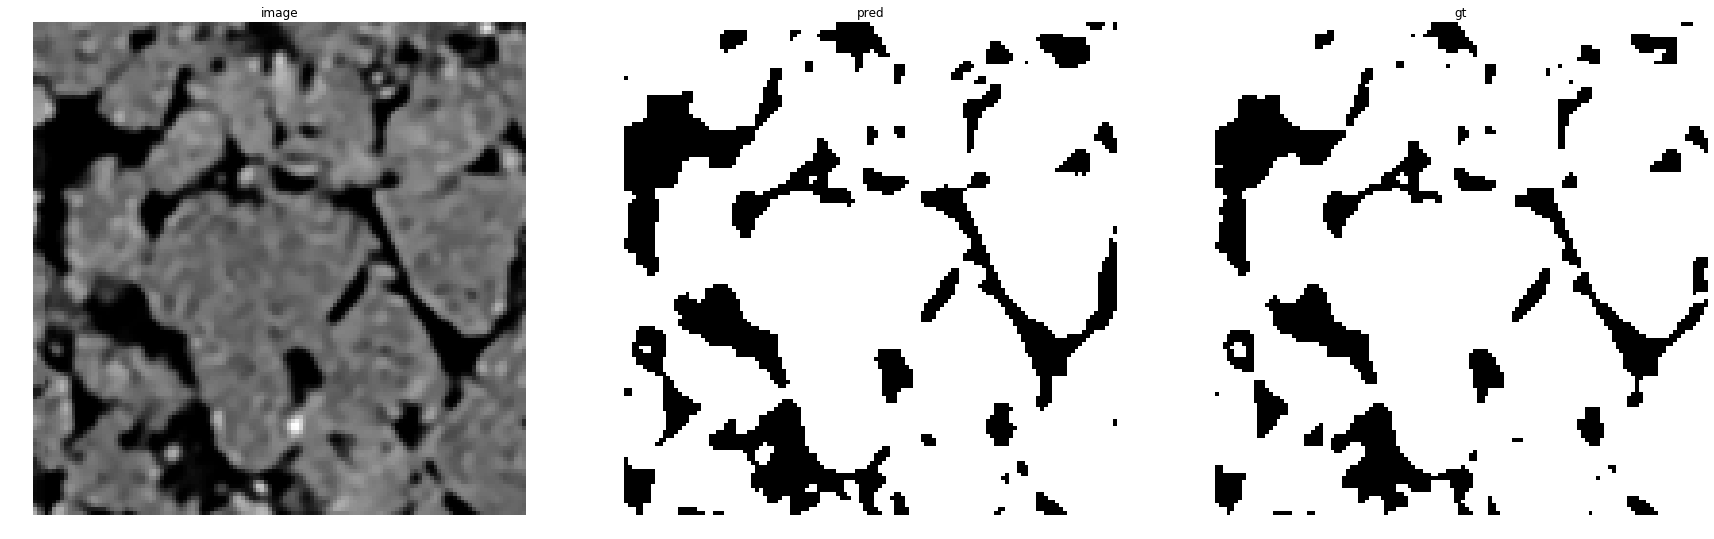

accuracy    : 0.96160888671875
precision   : 1.0
recall      : 0.9538043478260869
f1          : 0.976356050069541
pr_auc      : 0.9997491368541792
iou         : 0.9538043478260869


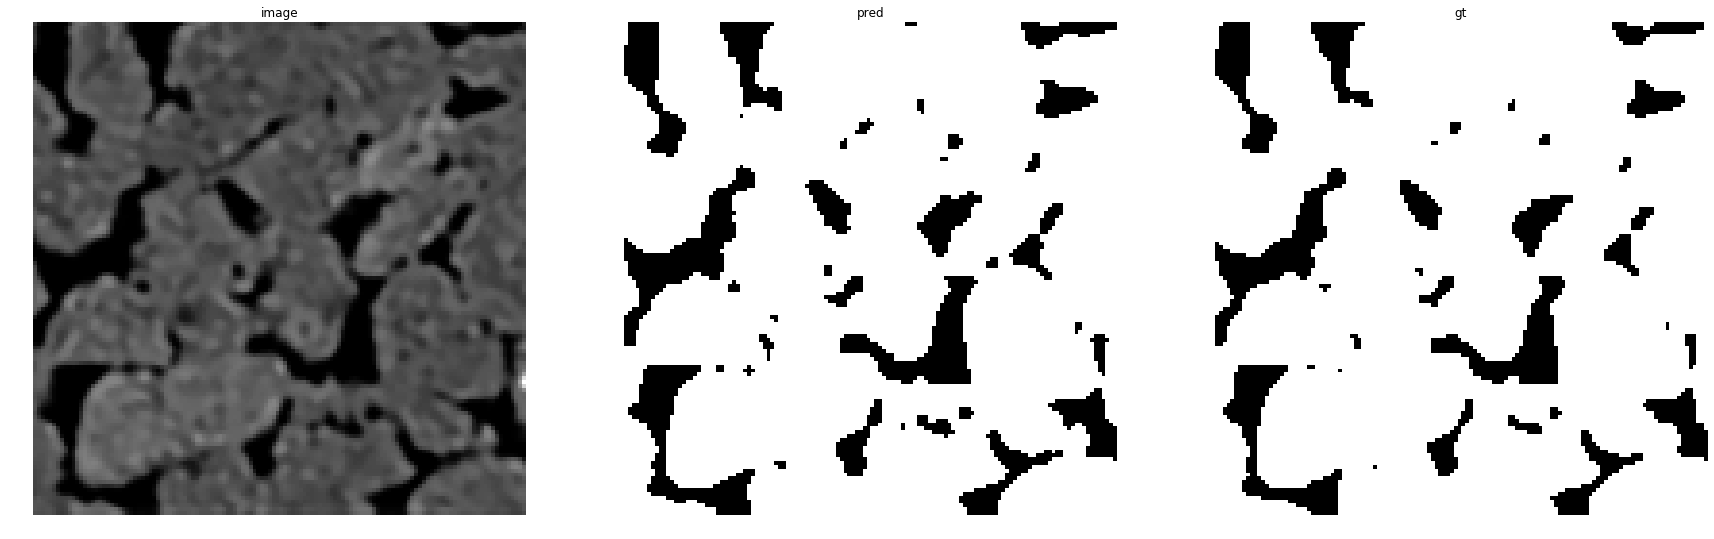

accuracy    : 0.97943115234375
precision   : 1.0
recall      : 0.9758872352604465
f1          : 0.9877964874162594
pr_auc      : 0.9999481509898515
iou         : 0.9758872352604465


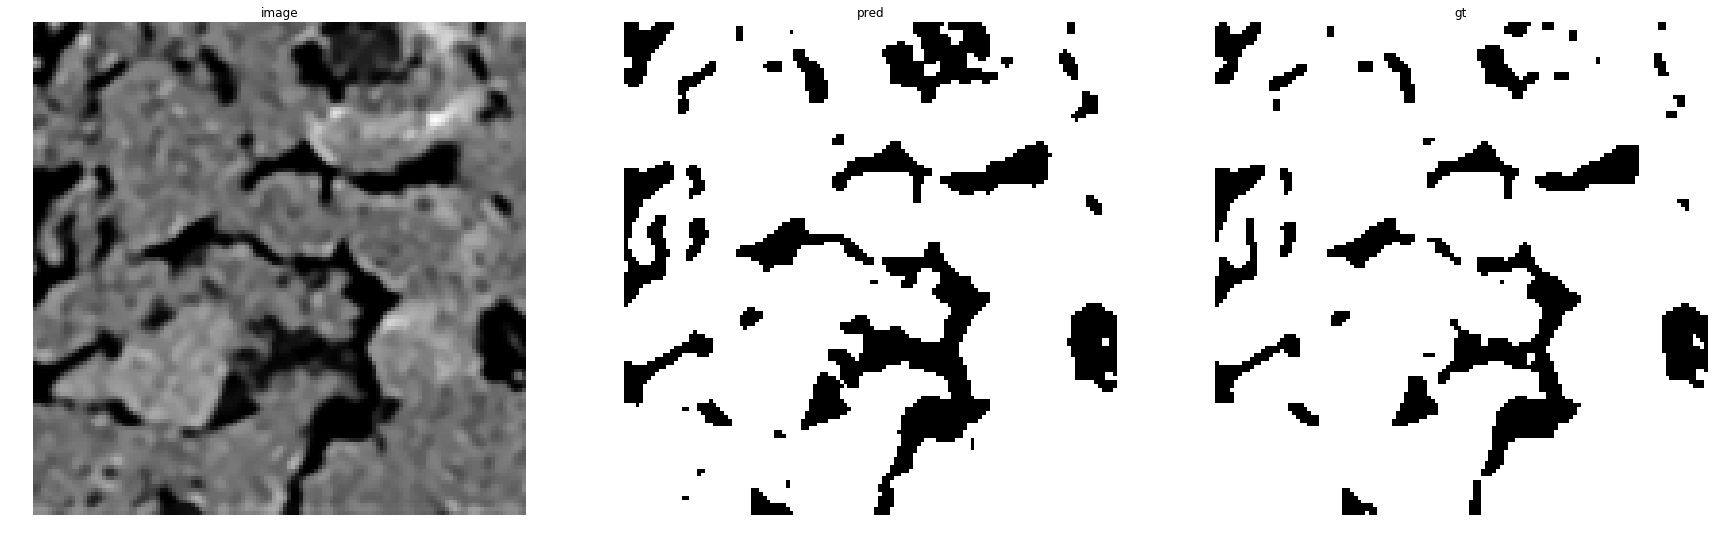

accuracy    : 0.9549560546875
precision   : 1.0
recall      : 0.9476929619391877
f1          : 0.9731441048034933
pr_auc      : 0.9997029778215881
iou         : 0.9476929619391877


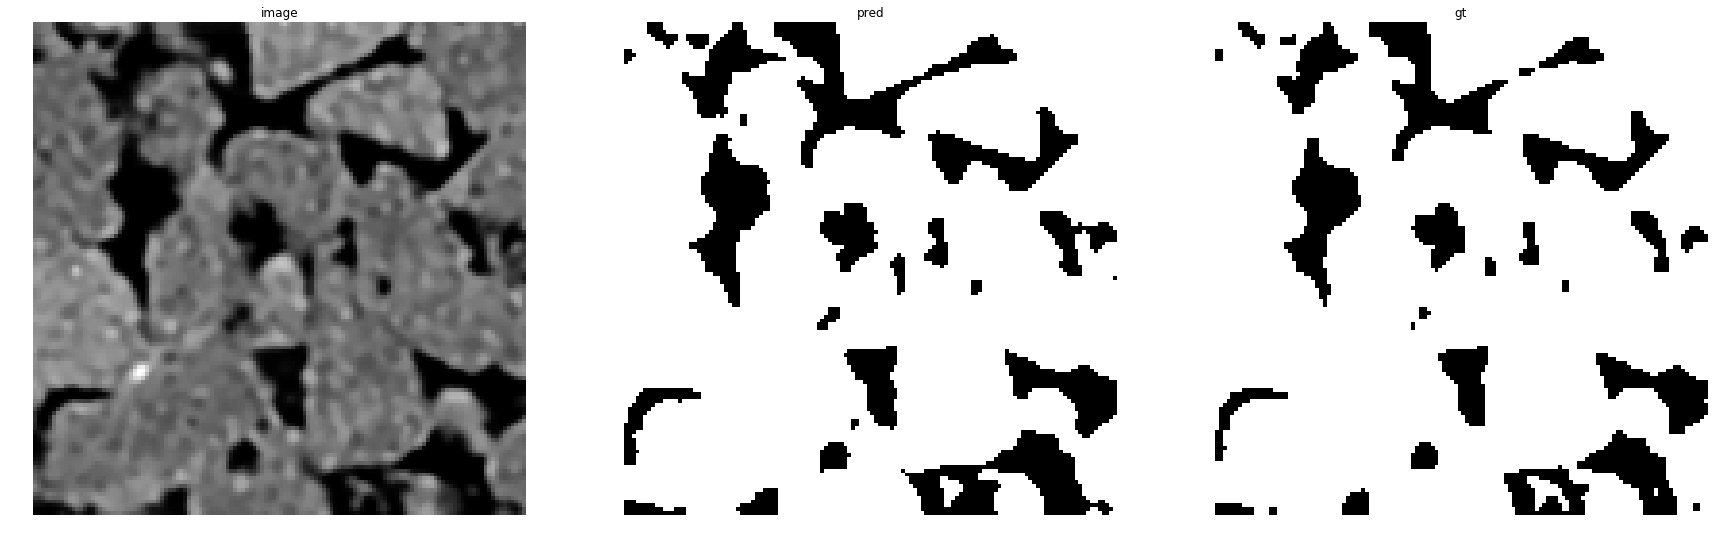

accuracy    : 0.96917724609375
precision   : 1.0
recall      : 0.9628430579059671
f1          : 0.9810698354387675
pr_auc      : 0.9998612198947785
iou         : 0.9628430579059671


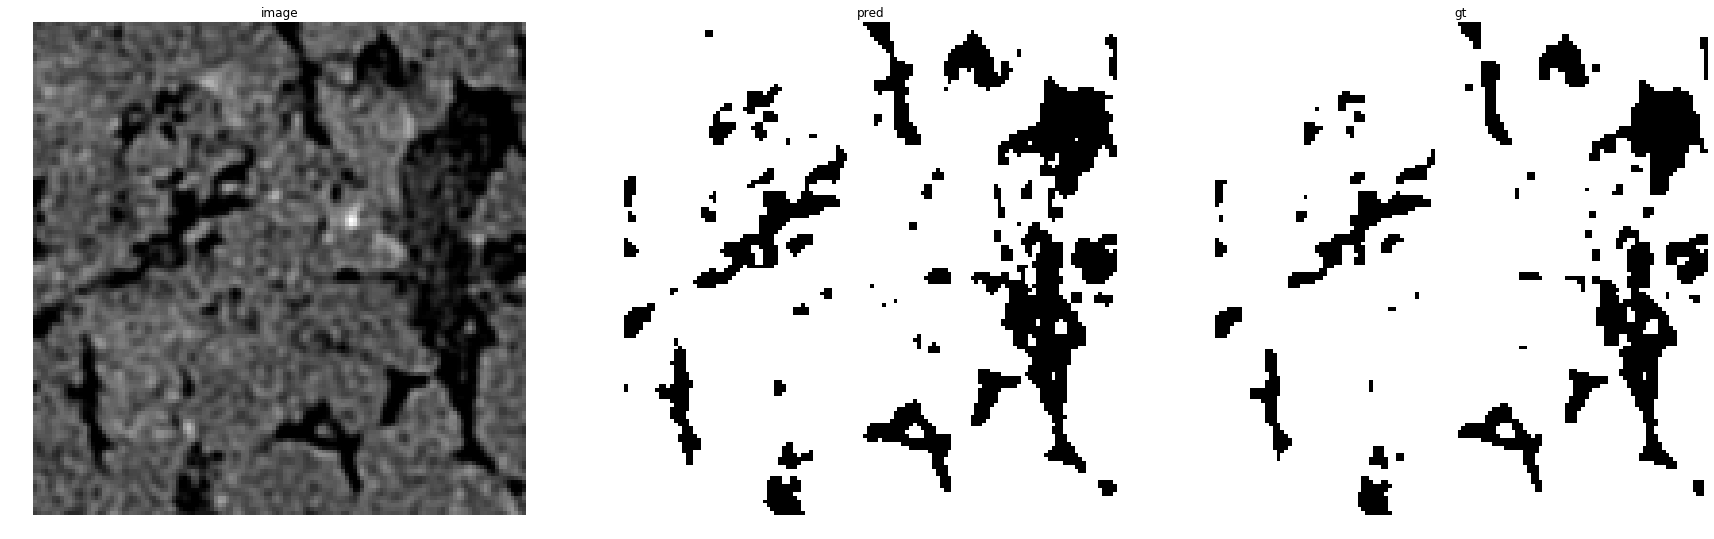

accuracy    : 0.959716796875
precision   : 0.999484270242393
recall      : 0.9540755327378859
f1          : 0.9762521588946459
pr_auc      : 0.9996961235177477
iou         : 0.9536060733867566


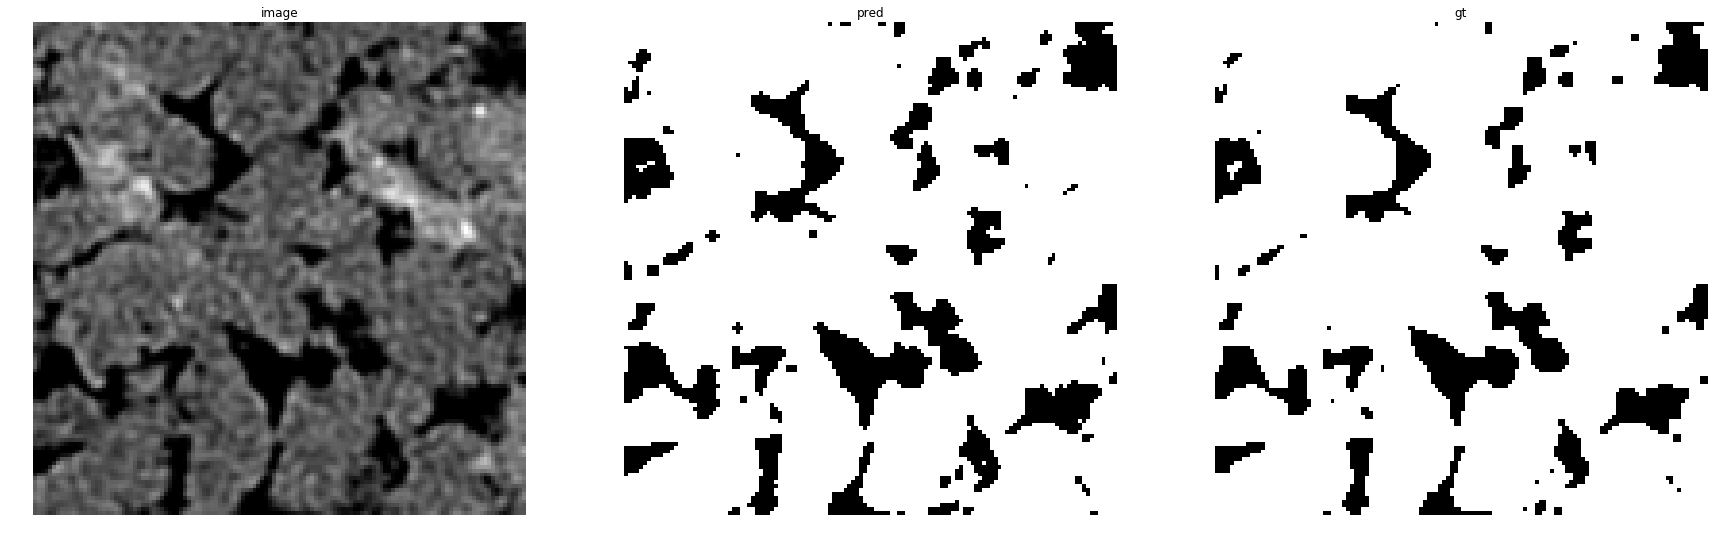

accuracy    : 0.9686279296875
precision   : 0.999187472300192
recall      : 0.9641482537419814
f1          : 0.9813551944283226
pr_auc      : 0.9997785842614978
iou         : 0.9633929207321416


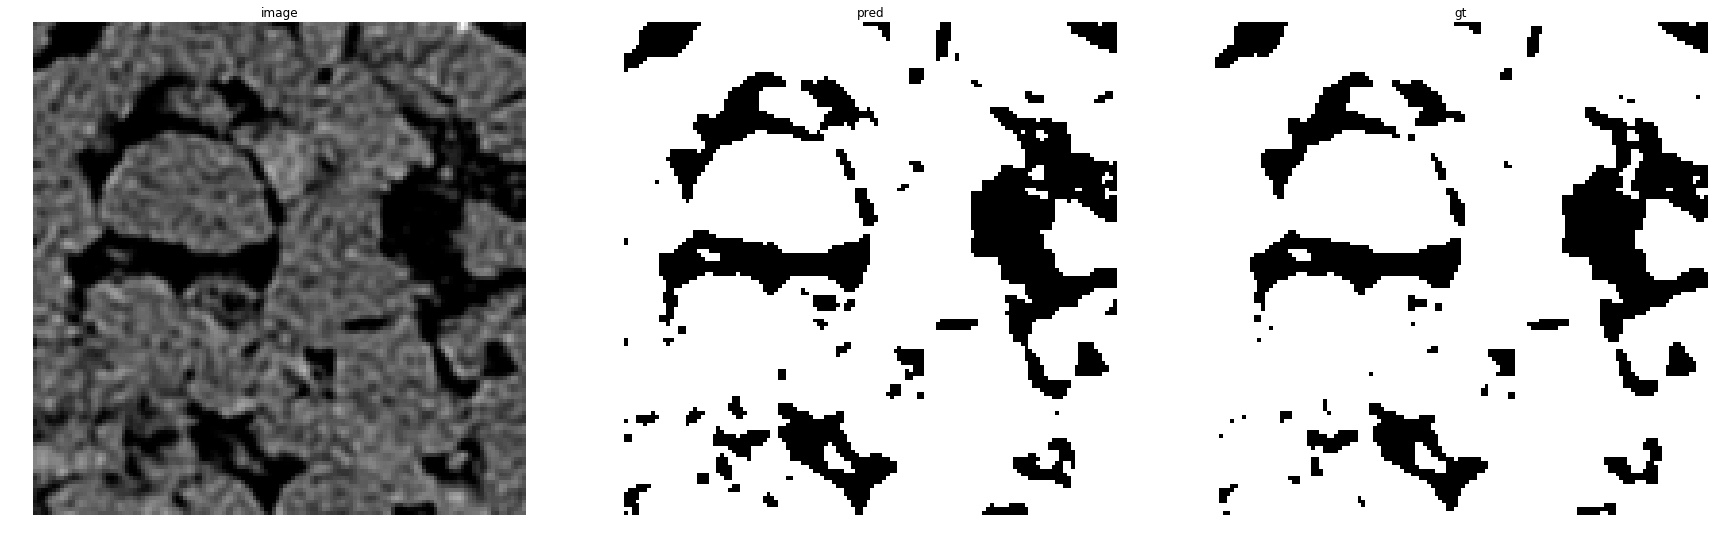

accuracy    : 0.96734619140625
precision   : 0.9980602110490379
recall      : 0.9618634562177522
f1          : 0.979627584631202
pr_auc      : 0.9996318650375597
iou         : 0.9600686669652186


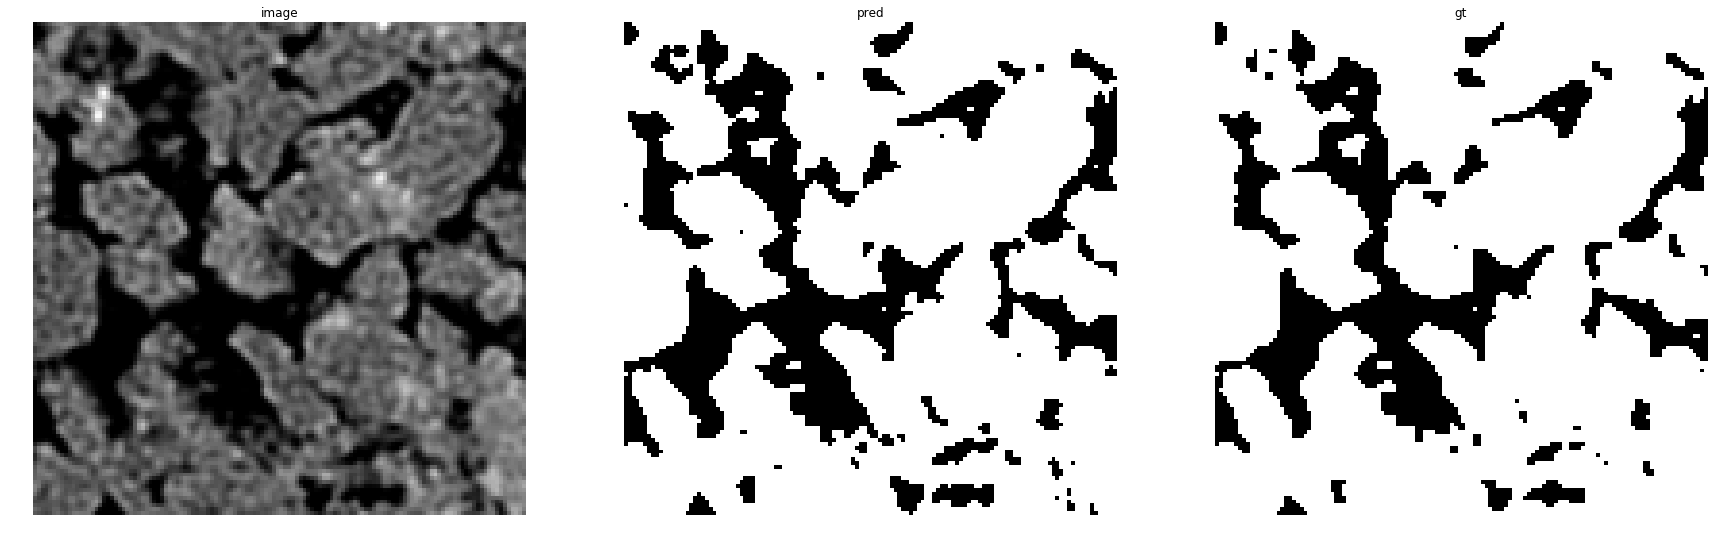

accuracy    : 0.9610595703125
precision   : 0.9990930079155673
recall      : 0.9508003766478342
f1          : 0.9743486651656482
pr_auc      : 0.9995206815656404
iou         : 0.9499803998431987


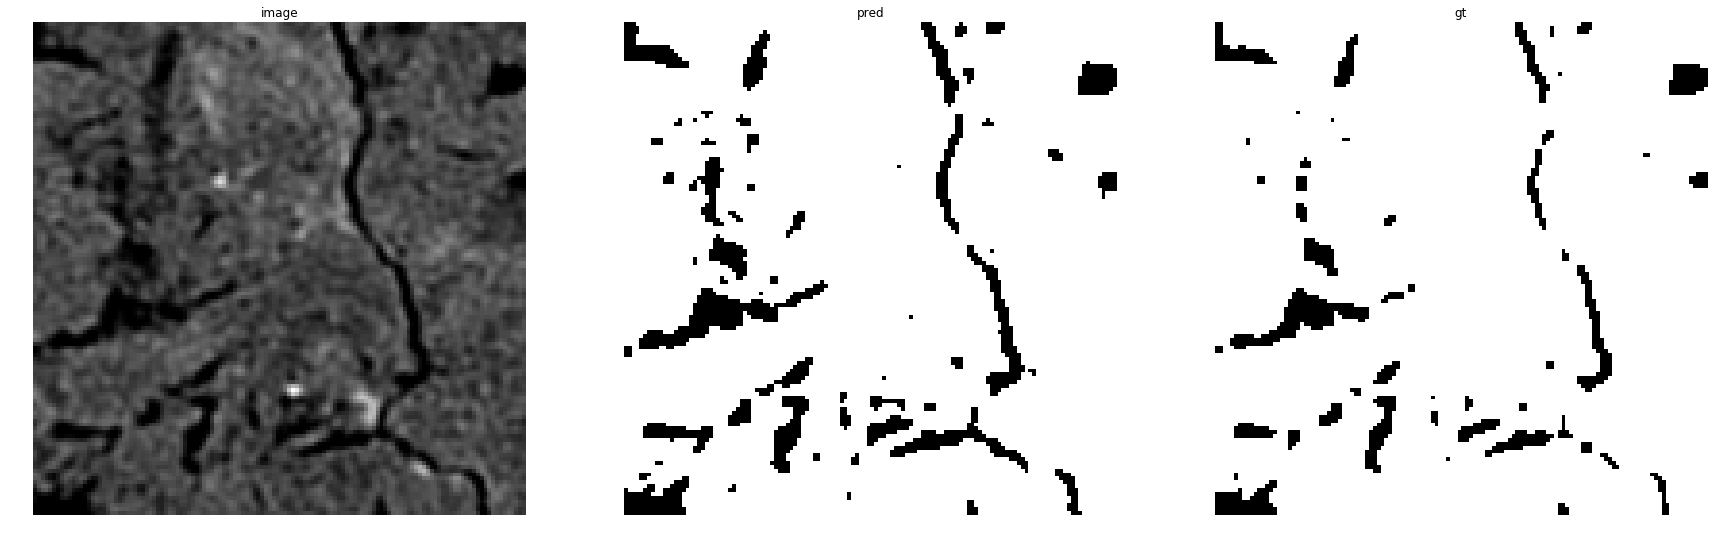

accuracy    : 0.96624755859375
precision   : 1.0
recall      : 0.9636710024963868
f1          : 0.9814994479943796
pr_auc      : 0.9999036557626858
iou         : 0.9636710024963868


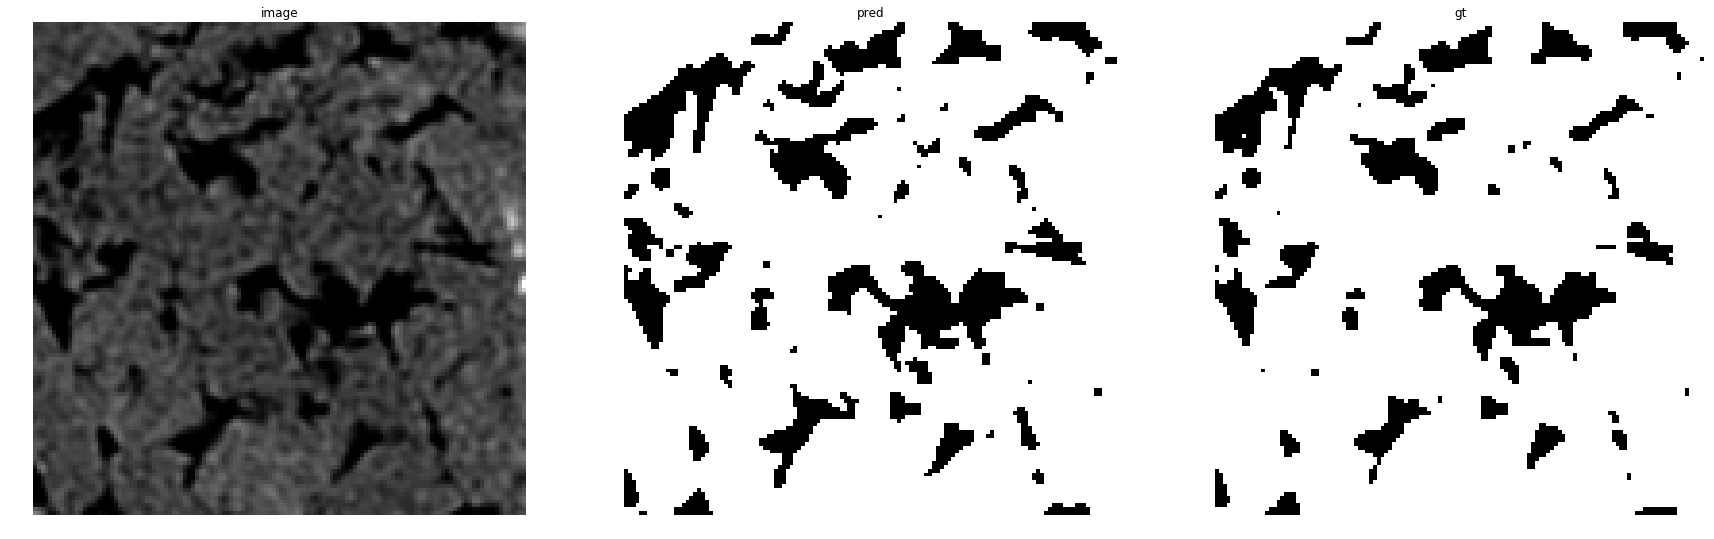

accuracy    : 0.96392822265625
precision   : 0.9995534052847042
recall      : 0.9582560296846011
f1          : 0.9784691609894715
pr_auc      : 0.9997110659893791
iou         : 0.9578459343794579


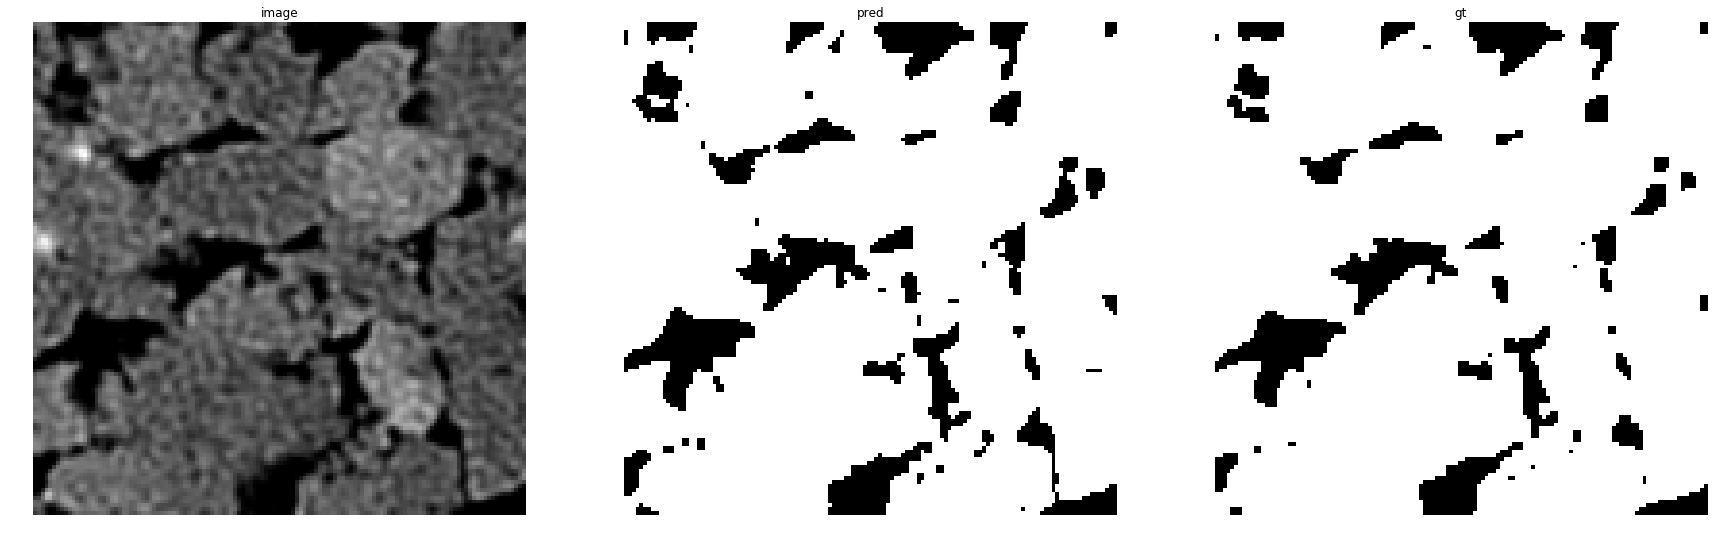

accuracy    : 0.9737548828125
precision   : 0.9992060627932154
recall      : 0.970623291032742
f1          : 0.9847073049292268
pr_auc      : 0.999827000250725
iou         : 0.9698752977441502


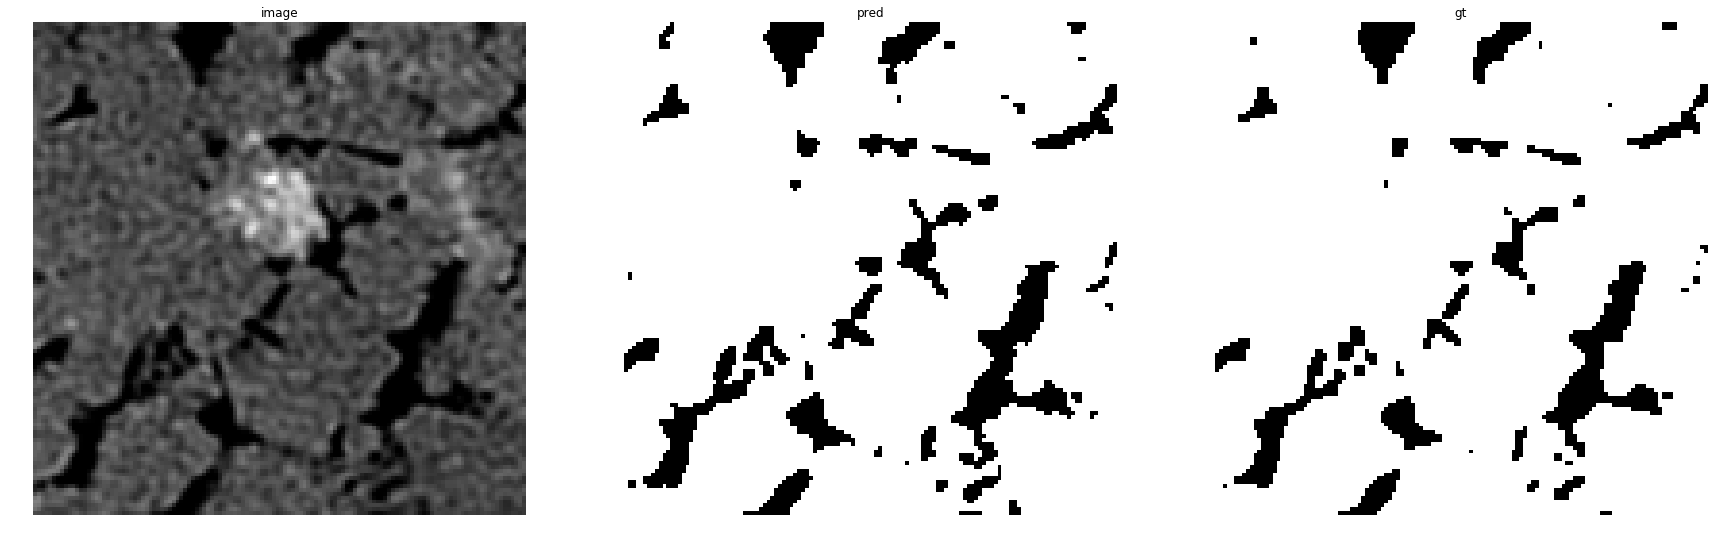

accuracy    : 0.9755859375
precision   : 0.9992978514253616
recall      : 0.9733278621255642
f1          : 0.9861419068736144
pr_auc      : 0.9998341440422138
iou         : 0.9726626571897211


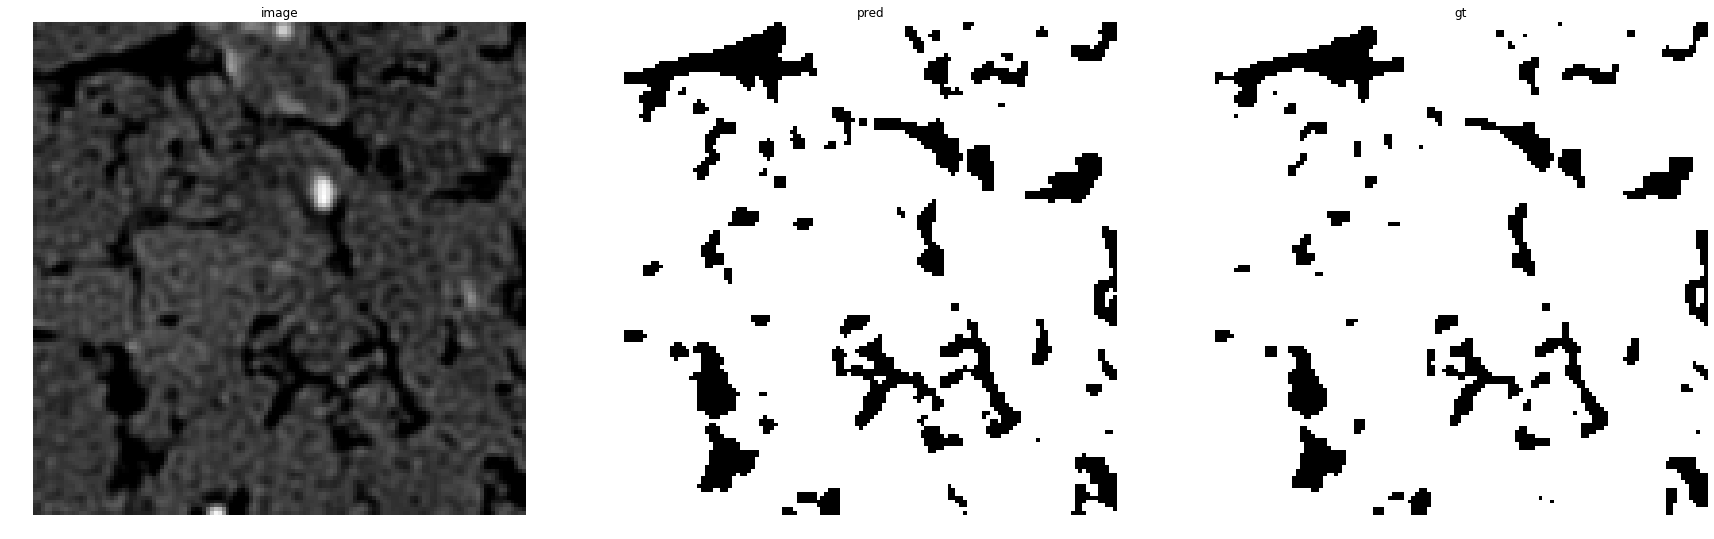

accuracy    : 0.96307373046875
precision   : 0.9997846683893196
recall      : 0.9585713302594453
f1          : 0.9787443347503777
pr_auc      : 0.9998147739850294
iou         : 0.9583734691069217


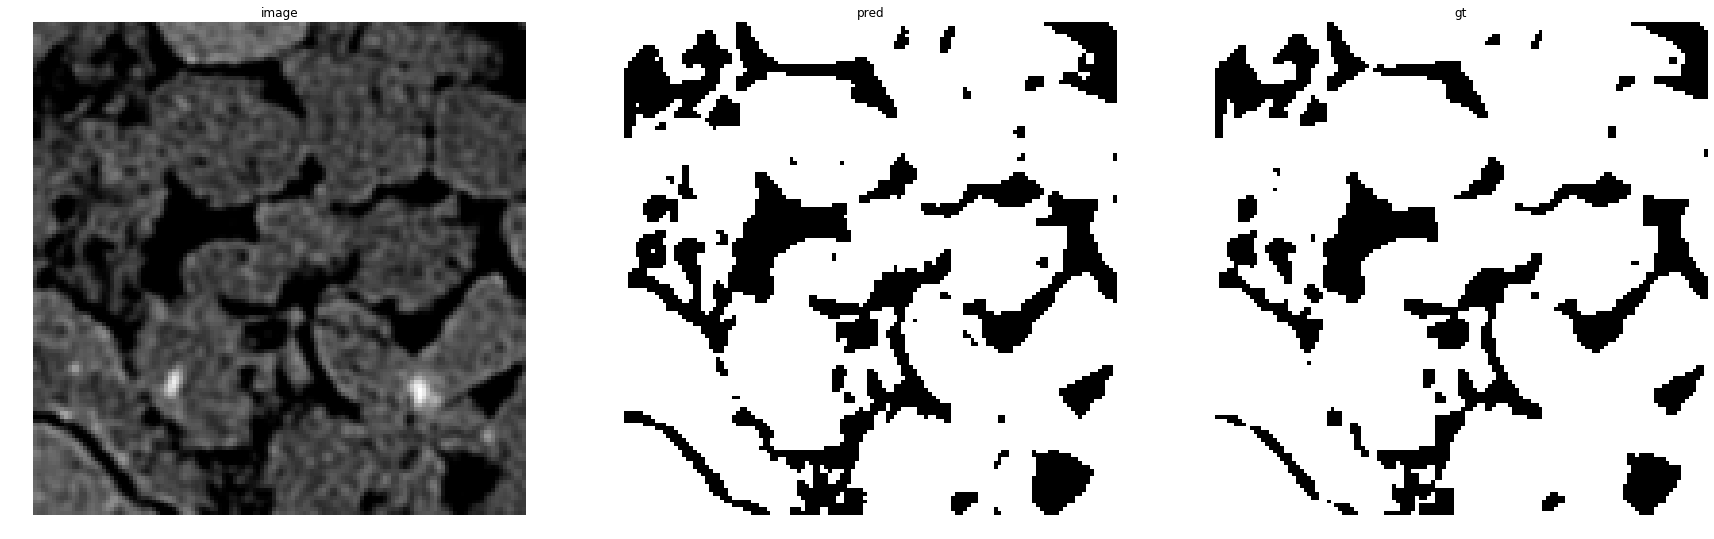

accuracy    : 0.95855712890625
precision   : 0.9989543114543115
recall      : 0.9491020252197172
f1          : 0.9733902888270565
pr_auc      : 0.9995626522680043
iou         : 0.9481600244312108


In [38]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [12]:
stack = Stack.read_from_source('../../data/Urna_34')

700it [00:03, 213.58it/s]
100%|██████████| 700/700 [00:07<00:00, 94.67it/s] 


In [13]:
predicted_stack = stack.apply(model, 
                              patch_sizes=(128, 128, 1), 
                              bs=32, num_workers=8, device='cuda:0',
                              threshold=None)

25200it [00:00, 227834.36it/s]
25200it [02:03, 203.23it/s]
100%|██████████| 25200/25200 [00:08<00:00, 2994.77it/s]


In [14]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                              v((predicted_stack.targets / 255).astype(np.uint8), 
                                predicted_stack.preds, 
                                mode='stack')))

accuracy    : 0.966874
precision   : 0.999301
recall      : 0.961528
f1          : 0.980050
pr_auc      : 0.999742
iou         : 0.960881


In [15]:
predicted_stack.dump('./Urna_34_{}'.format(data_conf['conf_name']), features=False, targets=False, preds=True)

100%|██████████| 700/700 [00:03<00:00, 176.05it/s]
